# Analysis Notebook

In this notebook, we'll analyze both the original judgement data as well as the human annotation data.

This will initially be written for the Creative Writing dataset, but we should be able to fork this completed notebook to another file and run it for QA with minimal changes.


⚠️ NOTE: Please add any additional questions/figures to the end of the lists, or at least reorder the notebook so that it's clear where things are, if you insert a question midway into the list.

⚠️ NOTE: The actions in this notebook SHOULD NOT be mutative; we should be able to run any cell in any order, and run the notebook multiple times without changing persisted data or figures.


## Questions we want to answer:
1. Which models give high scores? - Done: ❌
2. Which models give low scores? - Done: ❌
3. Which models receive high scores? - Done: ❌
4. Which models receive low scores? - Done: ❌
5. Which models rate themselves highly? - Done: ❌
6. Which models rate themselves poorly? - Done: ❌
7. Which models are most consistent in their given ratings? - Done: ❌
8. Which models are most consistent in their received ratings? - Done: ❌
9. Which models are most similar in their given ratings? - Done: ❌
10. Which models are most dissimilar in their given ratings? - Done: ❌
11. Which models are most similar in their received ratings? - Done: ❌
12. Which models are most dissimilar in their received ratings? - Done: ❌
13. Which models are most similar to human judgements? - Done: ❌
14. Which model are most dissimilar to human judgements? - Done: ❌
15. Which models did humans like the most? - Done: ❌
16. Which models did humans like the least? - Done: ❌




## Figures/Tables/Plots we want to produce:
(Note that the "Tables" don't need to be made here; we just need the aggregagted data to be available to slot into a LaTeX table).
1. Table of average received ratings for each model for each criteria (with average score on each dimension) - Done: ❌
2. Table of average given ratings for each model for each criteria (with average score on each dimension) - Done: ❌
3. Violin-esque plot of received ratings for each model for each criteria. (With average/SD for each criteria) - Done: ❌
4. Above plots, but on the subset of data that also has human judgements. - Done: ❌






In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections
import utils
import seaborn as sns

Load dataframes that we'll need for analysis.

In [4]:
cr_lm_df = pd.read_csv("../judgements/judgements_writing_prompts_HQ_20250312_113801.csv") # OG
cr_human_df = pd.read_csv("../annotation/HumanAnnotationCreativeWriting_corrected.csv") # Annotations
cr_combo_filtered_df = pd.read_csv("../judgements/judgements_writing_prompts_combined_with_humans.csv") # Combo

print(f"Length of cr_lm_df: {len(cr_lm_df)}")
print(f"Length of cr_human_df: {len(cr_human_df)}")
print(f"Length of cr_combo_filtered_df: {len(cr_combo_filtered_df)}\n")

Length of cr_lm_df: 24300
Length of cr_human_df: 1080
Length of cr_combo_filtered_df: 10800



In [3]:
cr_lm_df.columns

Index(['question_id', 'question', 'response_id', 'response_model', 'response',
       'judgement_id', 'judge_model', 'judgement_criteria_id', 'criteria',
       'judge_reasoning', 'judge_rating'],
      dtype='object')

# Questions

Question 1: Which models give high scores? 

Question 2: Which models give low scores?

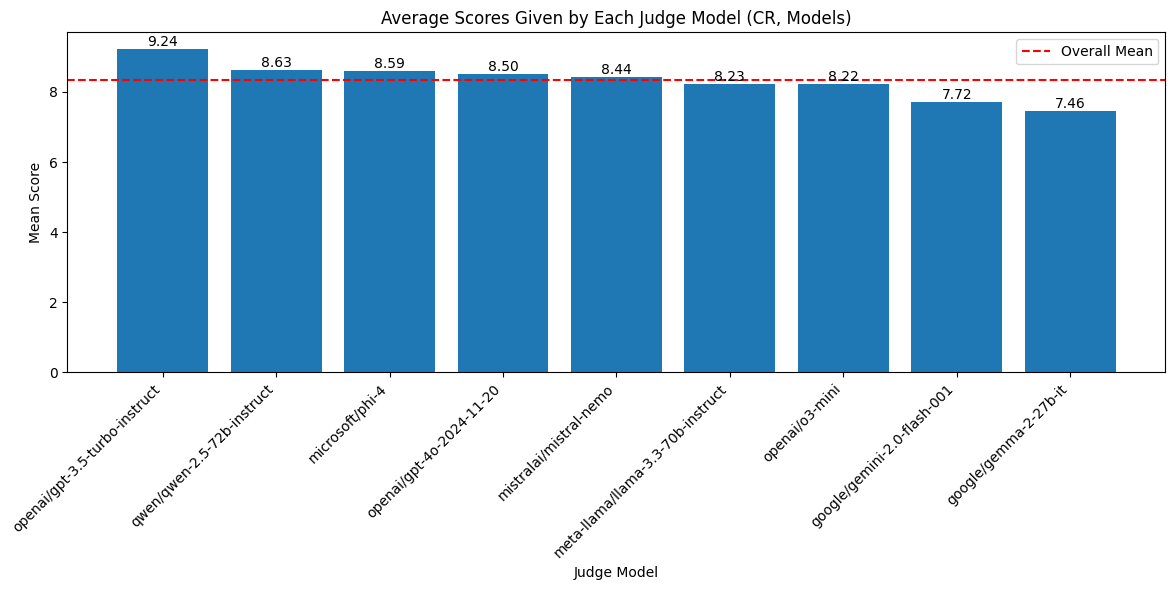


Mean scores by judge model:
judge_model
openai/gpt-3.5-turbo-instruct        9.24
qwen/qwen-2.5-72b-instruct           8.63
microsoft/phi-4                      8.59
openai/gpt-4o-2024-11-20             8.50
mistralai/mistral-nemo               8.44
meta-llama/llama-3.3-70b-instruct    8.23
openai/o3-mini                       8.22
google/gemini-2.0-flash-001          7.72
google/gemma-2-27b-it                7.46
Name: judge_rating, dtype: float64


In [14]:
# First, let's consider the LM judge dataframe (GIVEN scores)

# Calculate mean scores by judge model
judge_scores = cr_lm_df.groupby('judge_model')['judge_rating'].mean().round(2)
judge_scores = judge_scores.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(judge_scores)), judge_scores)
plt.xticks(range(len(judge_scores)), judge_scores.index, rotation=45, ha='right')
plt.axhline(y=cr_lm_df['judge_rating'].mean(), color='r', linestyle='--', label='Overall Mean')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.title('Average Scores Given by Each Judge Model (CR, Models)')
plt.ylabel('Mean Score')
plt.xlabel('Judge Model')
plt.legend()
plt.tight_layout()
plt.show()

print("\nMean scores by judge model:")
print(judge_scores)



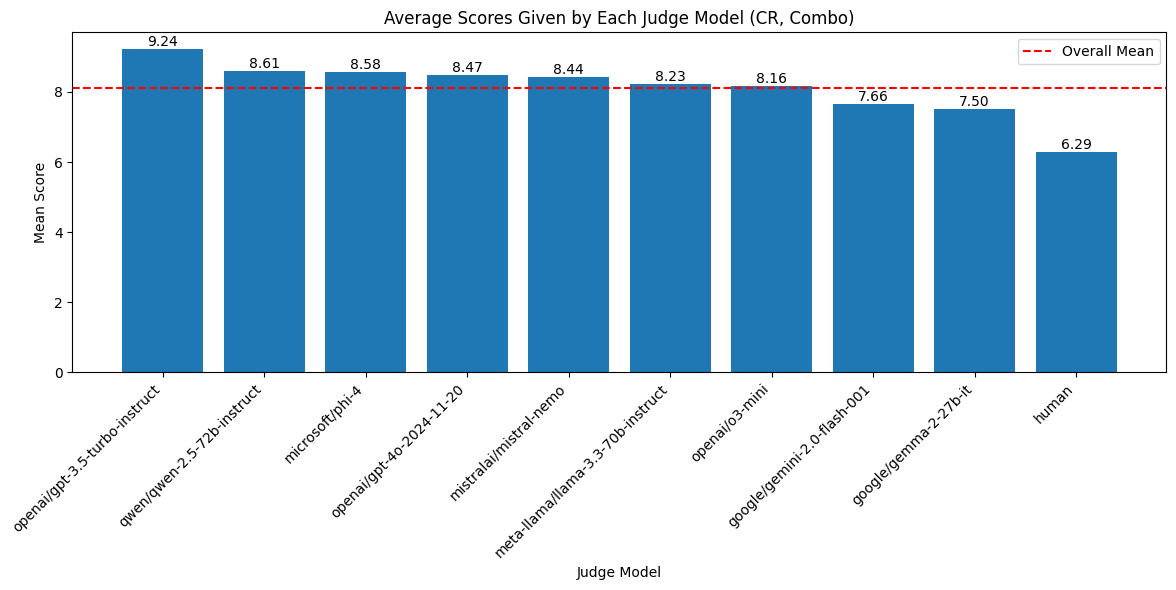


Mean scores by judge model:
judge_model
openai/gpt-3.5-turbo-instruct        9.24
qwen/qwen-2.5-72b-instruct           8.61
microsoft/phi-4                      8.58
openai/gpt-4o-2024-11-20             8.47
mistralai/mistral-nemo               8.44
meta-llama/llama-3.3-70b-instruct    8.23
openai/o3-mini                       8.16
google/gemini-2.0-flash-001          7.66
google/gemma-2-27b-it                7.50
human                                6.29
Name: judge_rating, dtype: float64


In [ ]:
# Now, let's consider the combo subset with human judgements (GIVEN scores)

# Calculate mean scores by judge model
judge_scores = cr_combo_filtered_df.groupby('judge_model')['judge_rating'].mean().round(2)
judge_scores = judge_scores.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(judge_scores)), judge_scores)
plt.xticks(range(len(judge_scores)), judge_scores.index, rotation=45, ha='right')
plt.axhline(y=cr_combo_filtered_df['judge_rating'].mean(), color='r', linestyle='--', label='Overall Mean')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.title('Average Scores Given by Each Judge Model (CR, Combo)')
plt.ylabel('Mean Score')
plt.xlabel('Judge Model')
plt.legend()
plt.tight_layout()
plt.show()

print("\nMean scores by judge model:")
print(judge_scores)


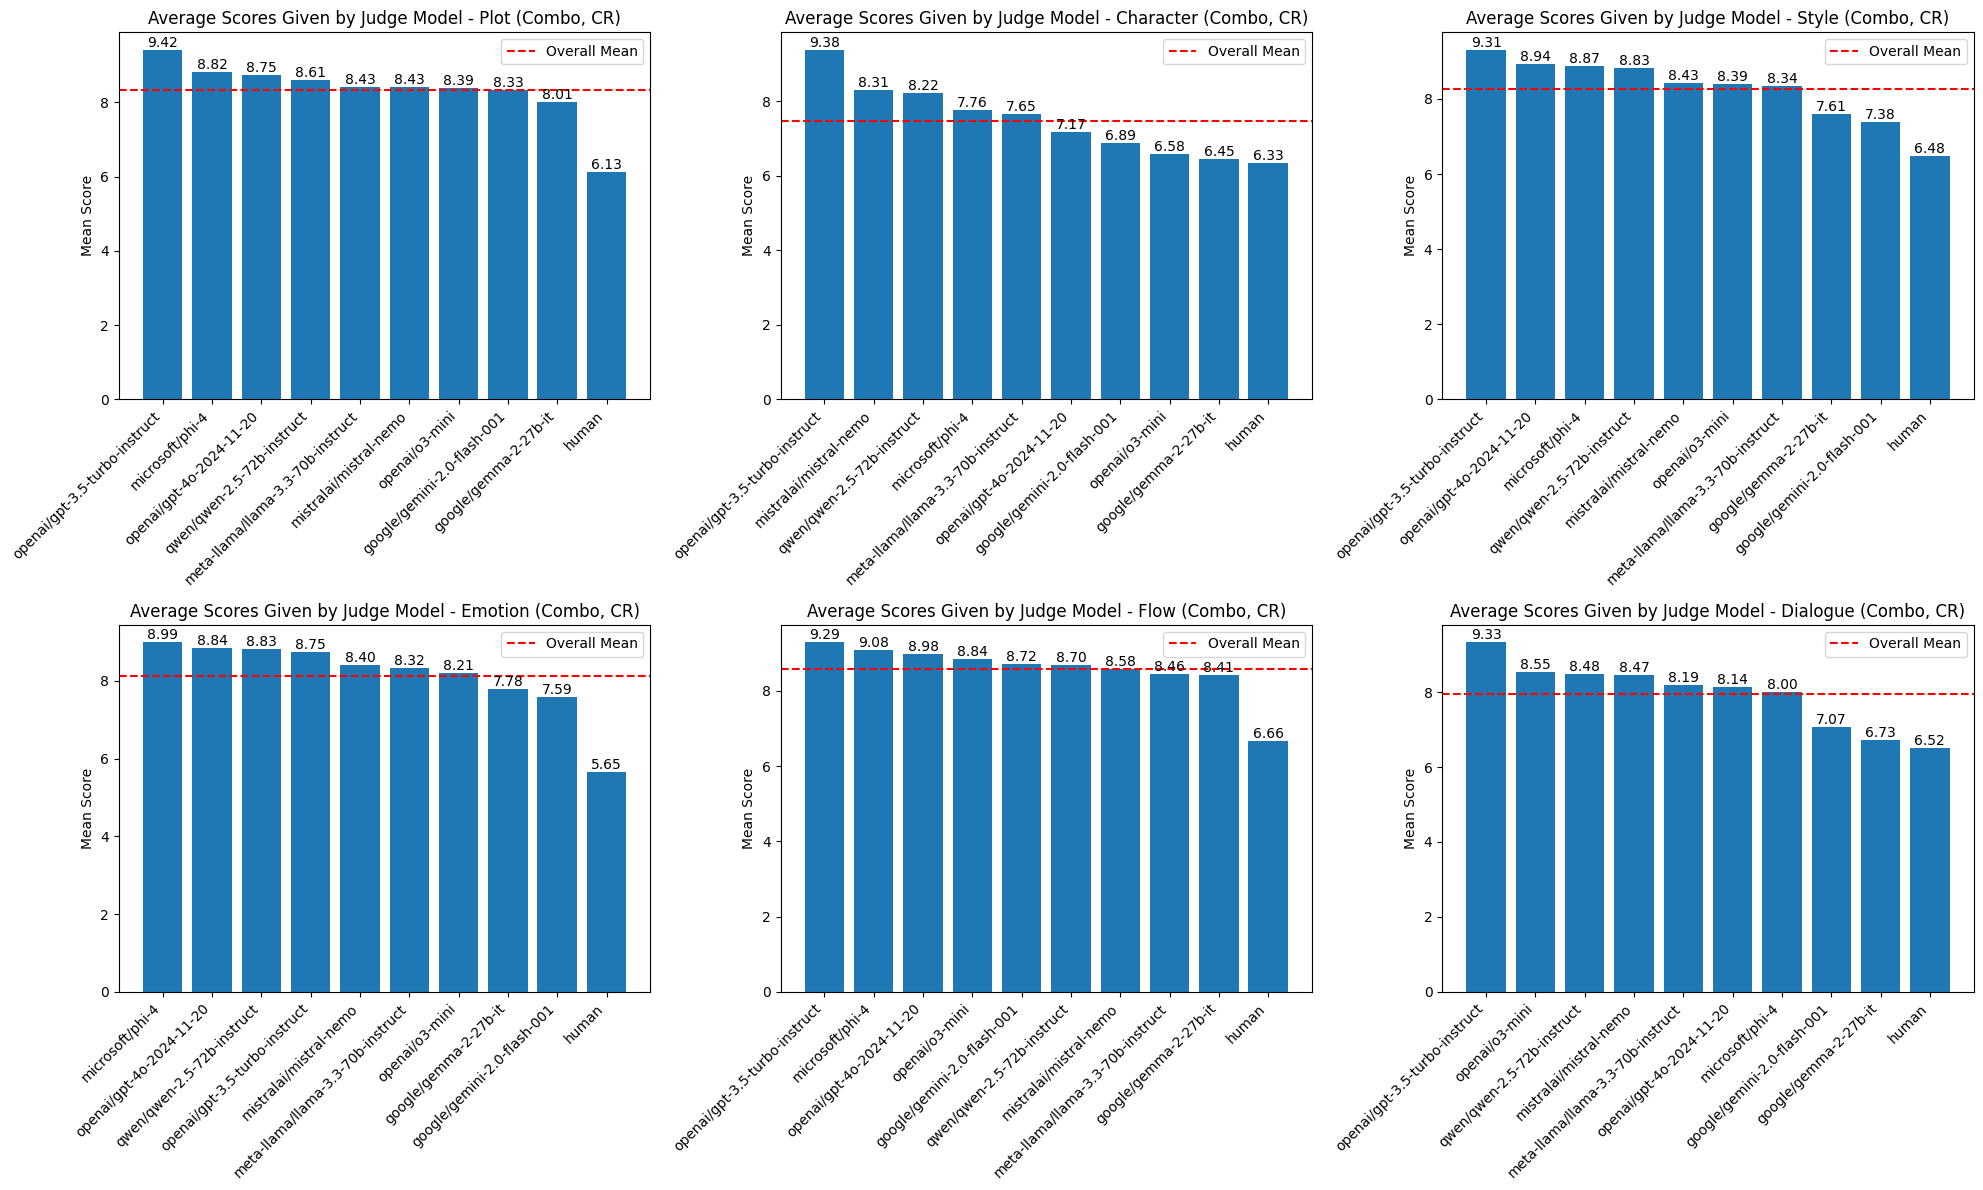


Mean scores by judge model for Plot:
judge_model
google/gemini-2.0-flash-001          8.33
google/gemma-2-27b-it                8.01
human                                6.13
meta-llama/llama-3.3-70b-instruct    8.43
microsoft/phi-4                      8.82
mistralai/mistral-nemo               8.43
openai/gpt-3.5-turbo-instruct        9.42
openai/gpt-4o-2024-11-20             8.75
openai/o3-mini                       8.39
qwen/qwen-2.5-72b-instruct           8.61
Name: judge_rating, dtype: float64

Mean scores by judge model for Character:
judge_model
google/gemini-2.0-flash-001          6.89
google/gemma-2-27b-it                6.45
human                                6.33
meta-llama/llama-3.3-70b-instruct    7.65
microsoft/phi-4                      7.76
mistralai/mistral-nemo               8.31
openai/gpt-3.5-turbo-instruct        9.38
openai/gpt-4o-2024-11-20             7.17
openai/o3-mini                       6.58
qwen/qwen-2.5-72b-instruct           8.22
Name: judge_rating, 

In [15]:
# And now let's do it for every criteria
# This is on the combo DF

# Create subplots for each criteria
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Get unique criteria
criteria_list = cr_combo_filtered_df['criteria'].unique()

for idx, criteria in enumerate(criteria_list):
    # Filter data for this criteria
    criteria_df = cr_combo_filtered_df[cr_combo_filtered_df['criteria'] == criteria]
    
    # Calculate mean scores by judge model for this criteria
    judge_scores = criteria_df.groupby('judge_model')['judge_rating'].mean().round(2)
    judge_scores = judge_scores.sort_values(ascending=False)
    
    # Create bar plot
    bars = axes[idx].bar(range(len(judge_scores)), judge_scores)
    axes[idx].set_xticks(range(len(judge_scores)))
    axes[idx].set_xticklabels(judge_scores.index, rotation=45, ha='right')
    
    # Add horizontal line for mean
    axes[idx].axhline(y=criteria_df['judge_rating'].mean(), 
                      color='r', linestyle='--', label='Overall Mean')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.2f}',
                      ha='center', va='bottom')
    
    # Add titles and labels
    axes[idx].set_title(f'Average Scores Given by Judge Model - {criteria} (Combo, CR)')
    axes[idx].set_ylabel('Mean Score')
    # axes[idx].set_xlabel('Judge Model')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Print mean scores by criteria and judge model
for criteria in criteria_list:
    criteria_df = cr_combo_filtered_df[cr_combo_filtered_df['criteria'] == criteria]
    judge_scores = criteria_df.groupby('judge_model')['judge_rating'].mean().round(2)
    print(f"\nMean scores by judge model for {criteria}:")
    print(judge_scores)


Question 3: Which models receive high scores?

Question 4: Which models receive low scores?

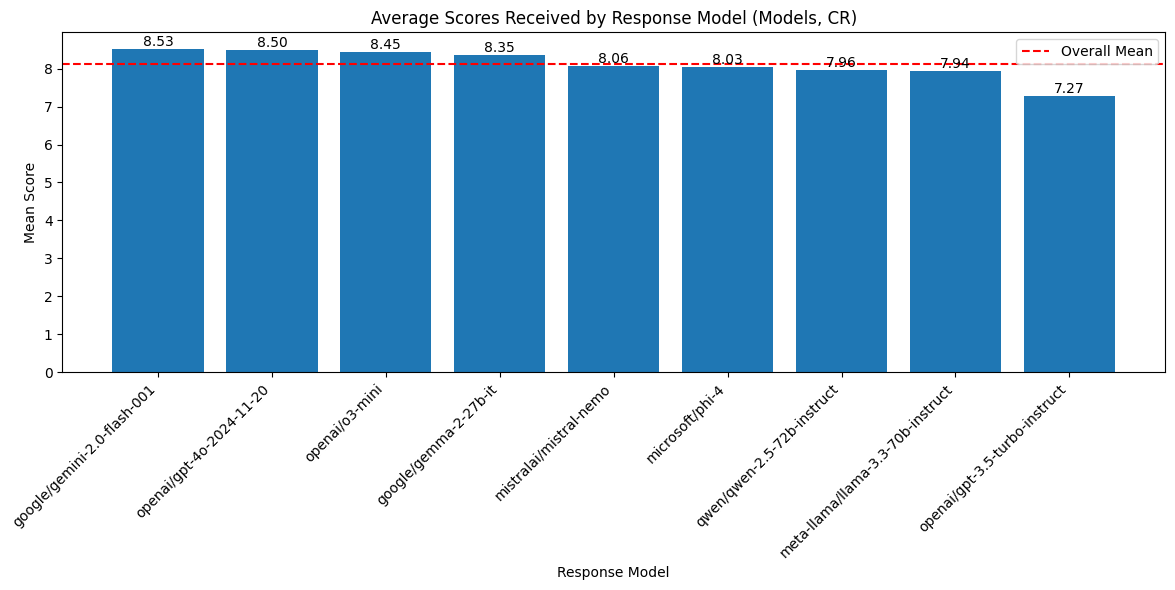


Mean scores received by response model:
response_model
google/gemini-2.0-flash-001          8.53
openai/gpt-4o-2024-11-20             8.50
openai/o3-mini                       8.45
google/gemma-2-27b-it                8.35
mistralai/mistral-nemo               8.06
microsoft/phi-4                      8.03
qwen/qwen-2.5-72b-instruct           7.96
meta-llama/llama-3.3-70b-instruct    7.94
openai/gpt-3.5-turbo-instruct        7.27
Name: judge_rating, dtype: float64


In [35]:
# Calculate mean scores received by each response model
model_scores = cr_combo_filtered_df.groupby('response_model')['judge_rating'].mean().round(2)
model_scores = model_scores.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12,6))
bars = plt.bar(range(len(model_scores)), model_scores)
plt.xticks(range(len(model_scores)), model_scores.index, rotation=45, ha='right')

# Add horizontal line for mean
plt.axhline(y=model_scores.mean(), color='r', linestyle='--', label='Overall Mean')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.title('Average Scores Received by Response Model (Models, CR)')
plt.ylabel('Mean Score')
plt.xlabel('Response Model')
plt.legend()

plt.tight_layout()
plt.show()

# Print mean scores
print("\nMean scores received by response model:")
print(model_scores)


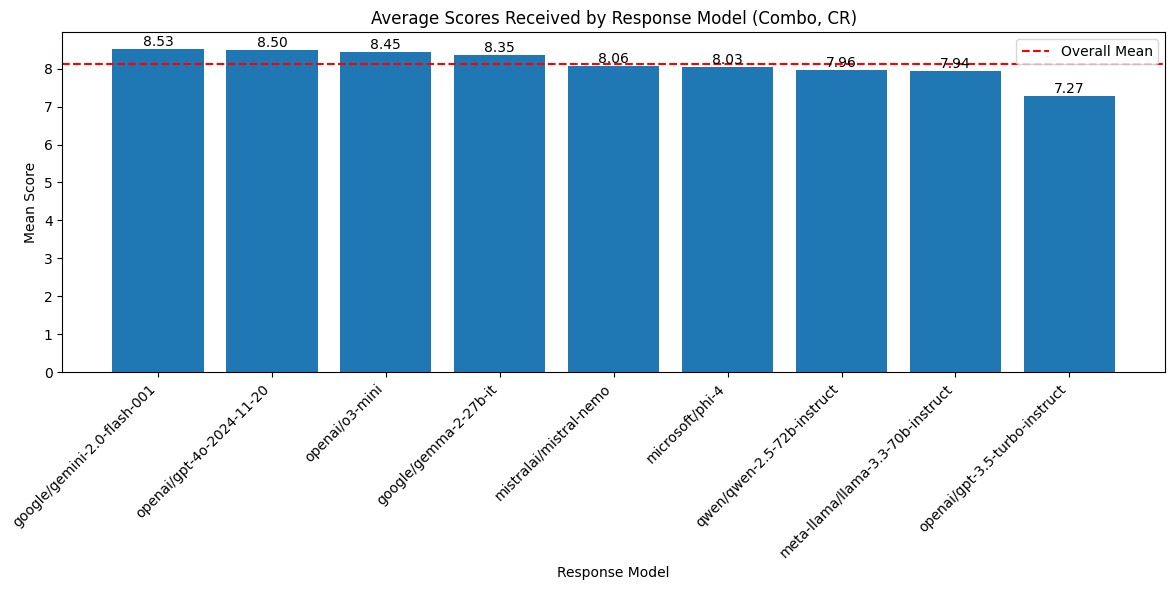


Mean scores received by response model (all data):
response_model
google/gemini-2.0-flash-001          8.53
openai/gpt-4o-2024-11-20             8.50
openai/o3-mini                       8.45
google/gemma-2-27b-it                8.35
mistralai/mistral-nemo               8.06
microsoft/phi-4                      8.03
qwen/qwen-2.5-72b-instruct           7.96
meta-llama/llama-3.3-70b-instruct    7.94
openai/gpt-3.5-turbo-instruct        7.27
Name: judge_rating, dtype: float64


In [34]:
# Calculate mean scores received by each response model in combo df
combo_model_scores = cr_combo_filtered_df.groupby('response_model')['judge_rating'].mean().round(2)
combo_model_scores = combo_model_scores.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12,6))
bars = plt.bar(range(len(combo_model_scores)), combo_model_scores)
plt.xticks(range(len(combo_model_scores)), combo_model_scores.index, rotation=45, ha='right')

# Add horizontal line for mean
plt.axhline(y=combo_model_scores.mean(), color='r', linestyle='--', label='Overall Mean')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.title('Average Scores Received by Response Model (Combo, CR)')
plt.ylabel('Mean Score')
plt.xlabel('Response Model')
plt.legend()

plt.tight_layout()
plt.show()

# Print mean scores
print("\nMean scores received by response model (all data):")
print(combo_model_scores)


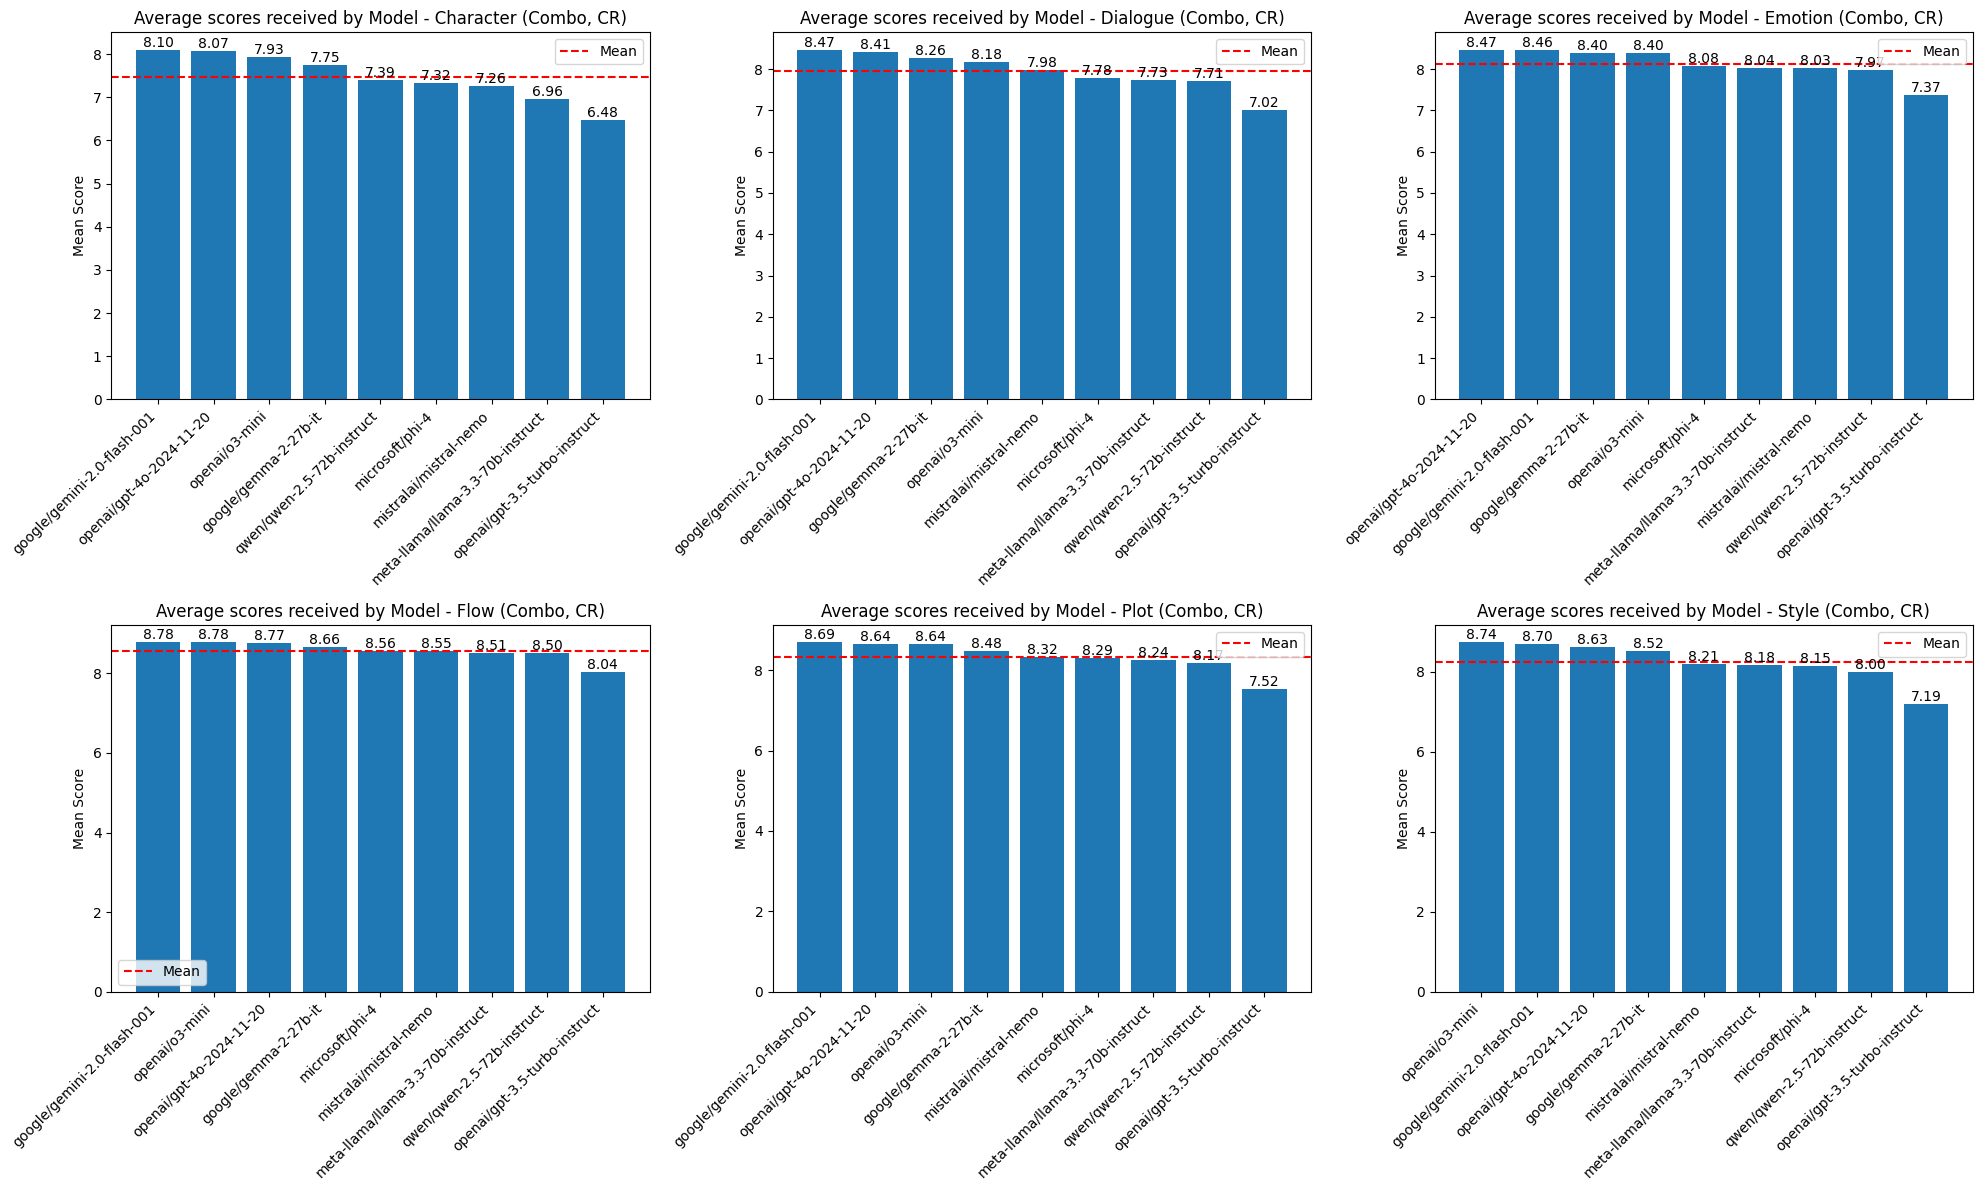


Mean scores by response model and criteria:
criteria                           Character  Dialogue  Emotion  Flow  Plot  \
response_model                                                                
google/gemini-2.0-flash-001             8.10      8.47     8.46  8.78  8.69   
google/gemma-2-27b-it                   7.75      8.26     8.40  8.66  8.48   
meta-llama/llama-3.3-70b-instruct       6.96      7.73     8.04  8.51  8.24   
microsoft/phi-4                         7.32      7.78     8.08  8.56  8.29   
mistralai/mistral-nemo                  7.26      7.98     8.03  8.55  8.32   
openai/gpt-3.5-turbo-instruct           6.48      7.02     7.37  8.04  7.52   
openai/gpt-4o-2024-11-20                8.07      8.41     8.47  8.77  8.64   
openai/o3-mini                          7.93      8.18     8.40  8.78  8.64   
qwen/qwen-2.5-72b-instruct              7.39      7.71     7.97  8.50  8.17   

criteria                           Style  
response_model                            

In [20]:
# Calculate mean scores by response model and criteria
criteria_scores = cr_combo_filtered_df.groupby(['response_model', 'criteria'])['judge_rating'].mean().round(2)
criteria_scores = criteria_scores.unstack()

# Create 6 subplots, one for each criteria
fig, axes = plt.subplots(2, 3, figsize=(20,12))
axes = axes.flatten()

for i, criteria in enumerate(criteria_scores.columns):
    ax = axes[i]
    scores = criteria_scores[criteria].sort_values(ascending=False)
    
    # Create bar plot
    bars = ax.bar(range(len(scores)), scores)
    ax.set_xticks(range(len(scores)))
    ax.set_xticklabels(scores.index, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    # Add mean line
    ax.axhline(y=scores.mean(), color='r', linestyle='--', label='Mean')
    
    ax.set_title(f'Average scores received by Model - {criteria} (Combo, CR)')
    ax.set_ylabel('Mean Score')
    # ax.set_xlabel('Response Model')
    ax.legend()

plt.tight_layout()
plt.show()

# Print mean scores by criteria
print("\nMean scores by response model and criteria:")
print(criteria_scores)


Question 5: Which models rate themselves highly?

Question 6: Which models rate themselves poorly?

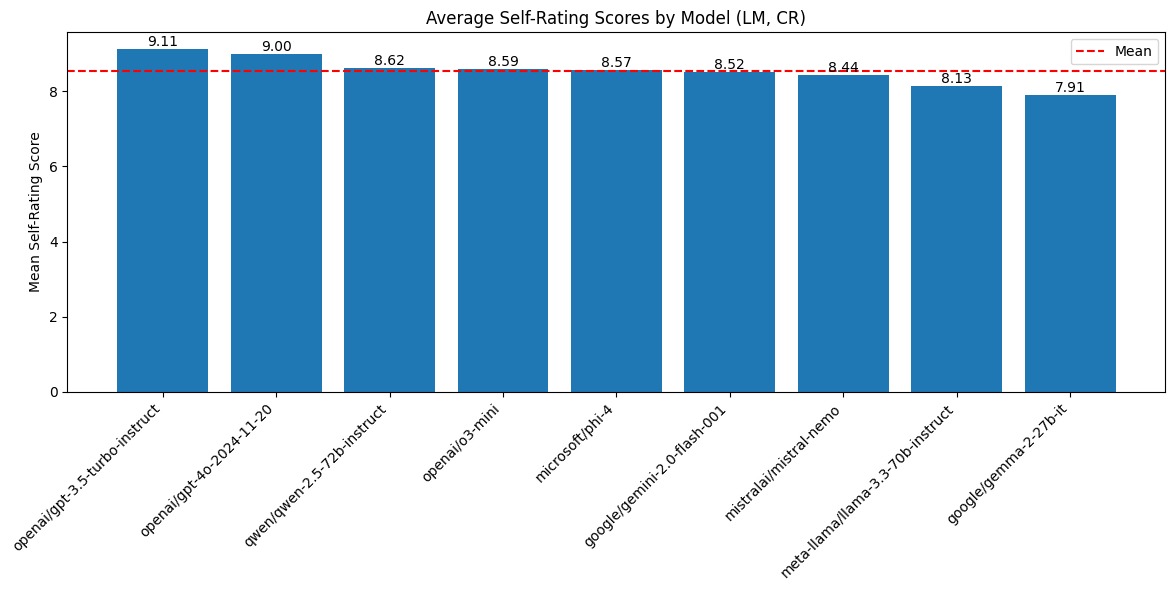


Mean self-rating scores by model:
judge_model
openai/gpt-3.5-turbo-instruct        9.11
openai/gpt-4o-2024-11-20             9.00
qwen/qwen-2.5-72b-instruct           8.62
openai/o3-mini                       8.59
microsoft/phi-4                      8.57
google/gemini-2.0-flash-001          8.52
mistralai/mistral-nemo               8.44
meta-llama/llama-3.3-70b-instruct    8.13
google/gemma-2-27b-it                7.91
Name: judge_rating, dtype: float64


In [36]:
# Get rows where judge_model matches response_model
self_ratings = cr_lm_df[cr_lm_df['judge_model'] == cr_lm_df['response_model']]

# Calculate mean self-rating scores for each model
self_rating_scores = self_ratings.groupby('judge_model')['judge_rating'].mean().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12,6))
bars = plt.bar(range(len(self_rating_scores)), self_rating_scores)
plt.xticks(range(len(self_rating_scores)), self_rating_scores.index, rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom')

# Add mean line
plt.axhline(y=self_rating_scores.mean(), color='r', linestyle='--', label='Mean')

plt.title('Average Self-Rating Scores by Model (LM, CR)')
plt.ylabel('Mean Self-Rating Score') 
plt.legend()
plt.tight_layout()
plt.show()

print("\nMean self-rating scores by model:")
print(self_rating_scores.round(2))


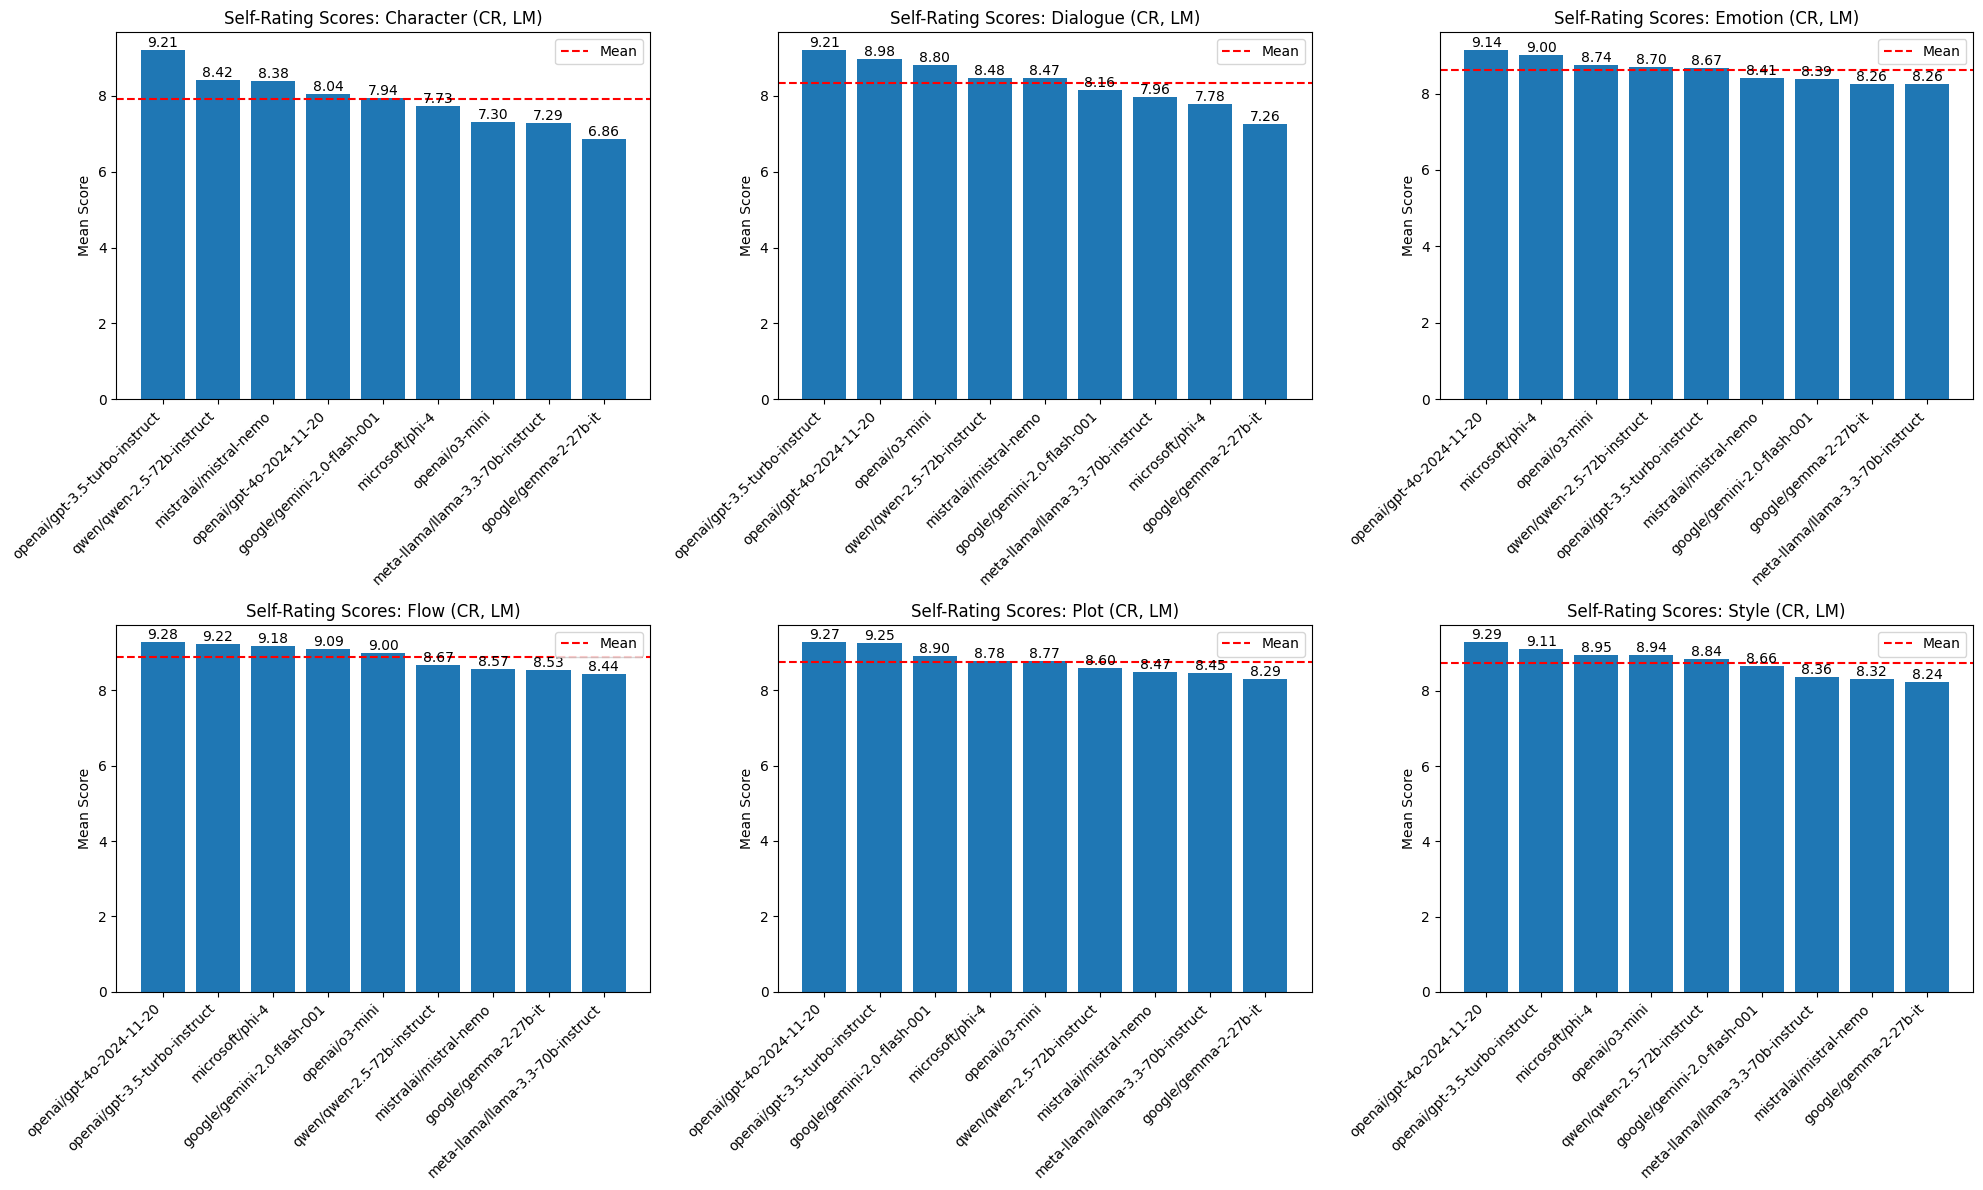


Mean self-rating scores by model and criteria:
criteria                           Character  Dialogue  Emotion  Flow  Plot  \
judge_model                                                                   
google/gemini-2.0-flash-001             7.94      8.16     8.39  9.09  8.90   
google/gemma-2-27b-it                   6.86      7.26     8.26  8.53  8.29   
meta-llama/llama-3.3-70b-instruct       7.29      7.96     8.26  8.44  8.45   
microsoft/phi-4                         7.73      7.78     9.00  9.18  8.78   
mistralai/mistral-nemo                  8.38      8.47     8.41  8.57  8.47   
openai/gpt-3.5-turbo-instruct           9.21      9.21     8.67  9.22  9.25   
openai/gpt-4o-2024-11-20                8.04      8.98     9.14  9.28  9.27   
openai/o3-mini                          7.30      8.80     8.74  9.00  8.77   
qwen/qwen-2.5-72b-instruct              8.42      8.48     8.70  8.67  8.60   

criteria                           Style  
judge_model                            

In [4]:
# Get self-ratings where judge_model matches response_model
self_ratings = cr_lm_df[cr_lm_df['judge_model'] == cr_lm_df['response_model']]

# Break down self-ratings by criteria
self_ratings_by_criteria = self_ratings.groupby(['judge_model', 'criteria'])['judge_rating'].mean().unstack()

# Create subplots for each criteria
fig, axes = plt.subplots(2, 3, figsize=(20,12))
axes = axes.flatten()

# Plot bar chart for each criteria
for i, criteria in enumerate(self_ratings_by_criteria.columns):
    ax = axes[i]
    scores = self_ratings_by_criteria[criteria].sort_values(ascending=False)
    
    bars = ax.bar(range(len(scores)), scores)
    ax.set_xticks(range(len(scores)))
    ax.set_xticklabels(scores.index, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    # Add mean line
    ax.axhline(y=scores.mean(), color='r', linestyle='--', label='Mean')
    
    ax.set_title(f'Self-Rating Scores: {criteria} (CR, LM)')
    ax.set_ylabel('Mean Score')
    ax.legend()

plt.tight_layout()
plt.show()

print("\nMean self-rating scores by model and criteria:")
print(self_ratings_by_criteria.round(2))


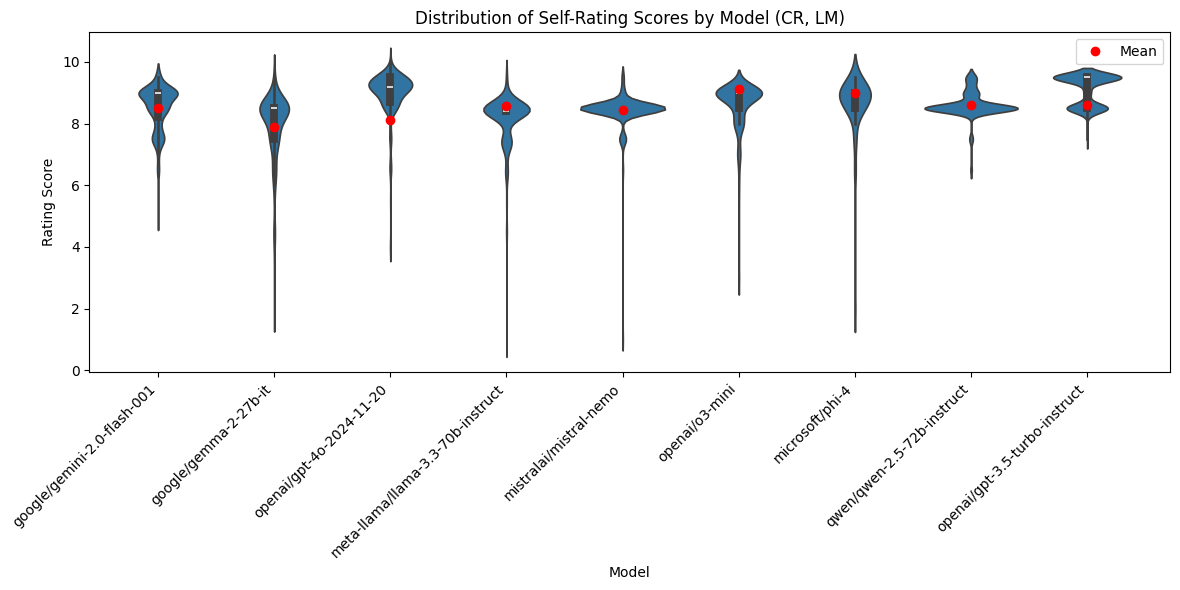


Summary statistics of self-rating scores by model:
                                   count  mean   std  min  25%  50%  75%   max
judge_model                                                                   
google/gemini-2.0-flash-001        300.0  8.52  0.71  5.0  8.2  9.0  9.0   9.5
google/gemma-2-27b-it              300.0  7.91  1.17  2.0  7.5  8.5  8.5   9.5
meta-llama/llama-3.3-70b-instruct  300.0  8.13  0.88  1.0  8.4  8.4  8.5   9.5
microsoft/phi-4                    300.0  8.57  1.18  2.0  8.5  9.0  9.0   9.5
mistralai/mistral-nemo             300.0  8.44  0.56  1.0  8.5  8.5  8.5   9.5
openai/gpt-3.5-turbo-instruct      300.0  9.11  0.48  7.5  8.5  9.5  9.5   9.5
openai/gpt-4o-2024-11-20           300.0  9.00  0.72  4.0  8.7  9.2  9.5  10.0
openai/o3-mini                     300.0  8.59  0.85  3.0  8.5  9.0  9.0   9.2
qwen/qwen-2.5-72b-instruct         300.0  8.62  0.42  6.5  8.5  8.5  8.5   9.5


In [5]:
# Get self-ratings where judge_model matches response_model
self_ratings = cr_lm_df[cr_lm_df['judge_model'] == cr_lm_df['response_model']]

# Plot distribution of self-rating scores by model
plt.figure(figsize=(12,6))

# Create violin plot
sns.violinplot(data=self_ratings, x='judge_model', y='judge_rating')

plt.title('Distribution of Self-Rating Scores by Model (CR, LM)')
plt.xlabel('Model')
plt.ylabel('Rating Score')
plt.xticks(rotation=45, ha='right')

# Add mean points
means = self_ratings.groupby('judge_model')['judge_rating'].mean()
plt.plot(range(len(means)), means, 'ro', label='Mean')

plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary statistics of self-rating scores by model:")
print(self_ratings.groupby('judge_model')['judge_rating'].describe().round(2))


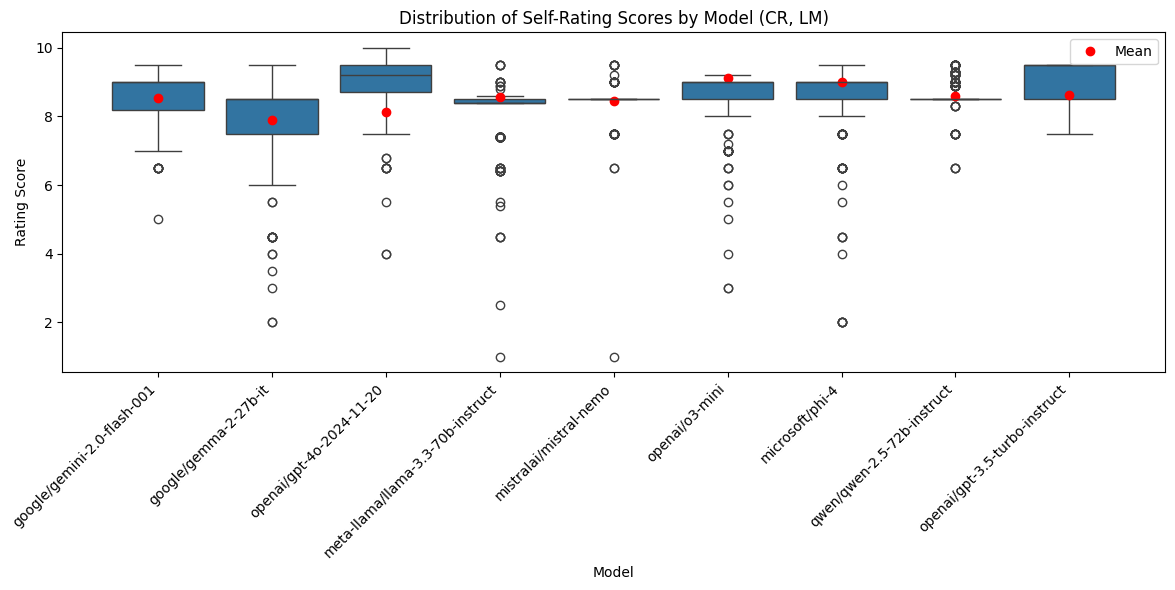


Summary statistics of self-rating scores by model:
                                   count  mean   std  min  25%  50%  75%   max
judge_model                                                                   
google/gemini-2.0-flash-001        300.0  8.52  0.71  5.0  8.2  9.0  9.0   9.5
google/gemma-2-27b-it              300.0  7.91  1.17  2.0  7.5  8.5  8.5   9.5
meta-llama/llama-3.3-70b-instruct  300.0  8.13  0.88  1.0  8.4  8.4  8.5   9.5
microsoft/phi-4                    300.0  8.57  1.18  2.0  8.5  9.0  9.0   9.5
mistralai/mistral-nemo             300.0  8.44  0.56  1.0  8.5  8.5  8.5   9.5
openai/gpt-3.5-turbo-instruct      300.0  9.11  0.48  7.5  8.5  9.5  9.5   9.5
openai/gpt-4o-2024-11-20           300.0  9.00  0.72  4.0  8.7  9.2  9.5  10.0
openai/o3-mini                     300.0  8.59  0.85  3.0  8.5  9.0  9.0   9.2
qwen/qwen-2.5-72b-instruct         300.0  8.62  0.42  6.5  8.5  8.5  8.5   9.5


In [6]:
# Get self-ratings where judge_model matches response_model
self_ratings = cr_lm_df[cr_lm_df['judge_model'] == cr_lm_df['response_model']]

# Plot distribution of self-rating scores by model
plt.figure(figsize=(12,6))

# Create violin plot
sns.boxplot(data=self_ratings, x='judge_model', y='judge_rating')

plt.title('Distribution of Self-Rating Scores by Model (CR, LM)')
plt.xlabel('Model')
plt.ylabel('Rating Score')
plt.xticks(rotation=45, ha='right')

# Add mean points
means = self_ratings.groupby('judge_model')['judge_rating'].mean()
plt.plot(range(len(means)), means, 'ro', label='Mean')

plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary statistics of self-rating scores by model:")
print(self_ratings.groupby('judge_model')['judge_rating'].describe().round(2))


Question 7: Which models are most consistent in their given ratings?

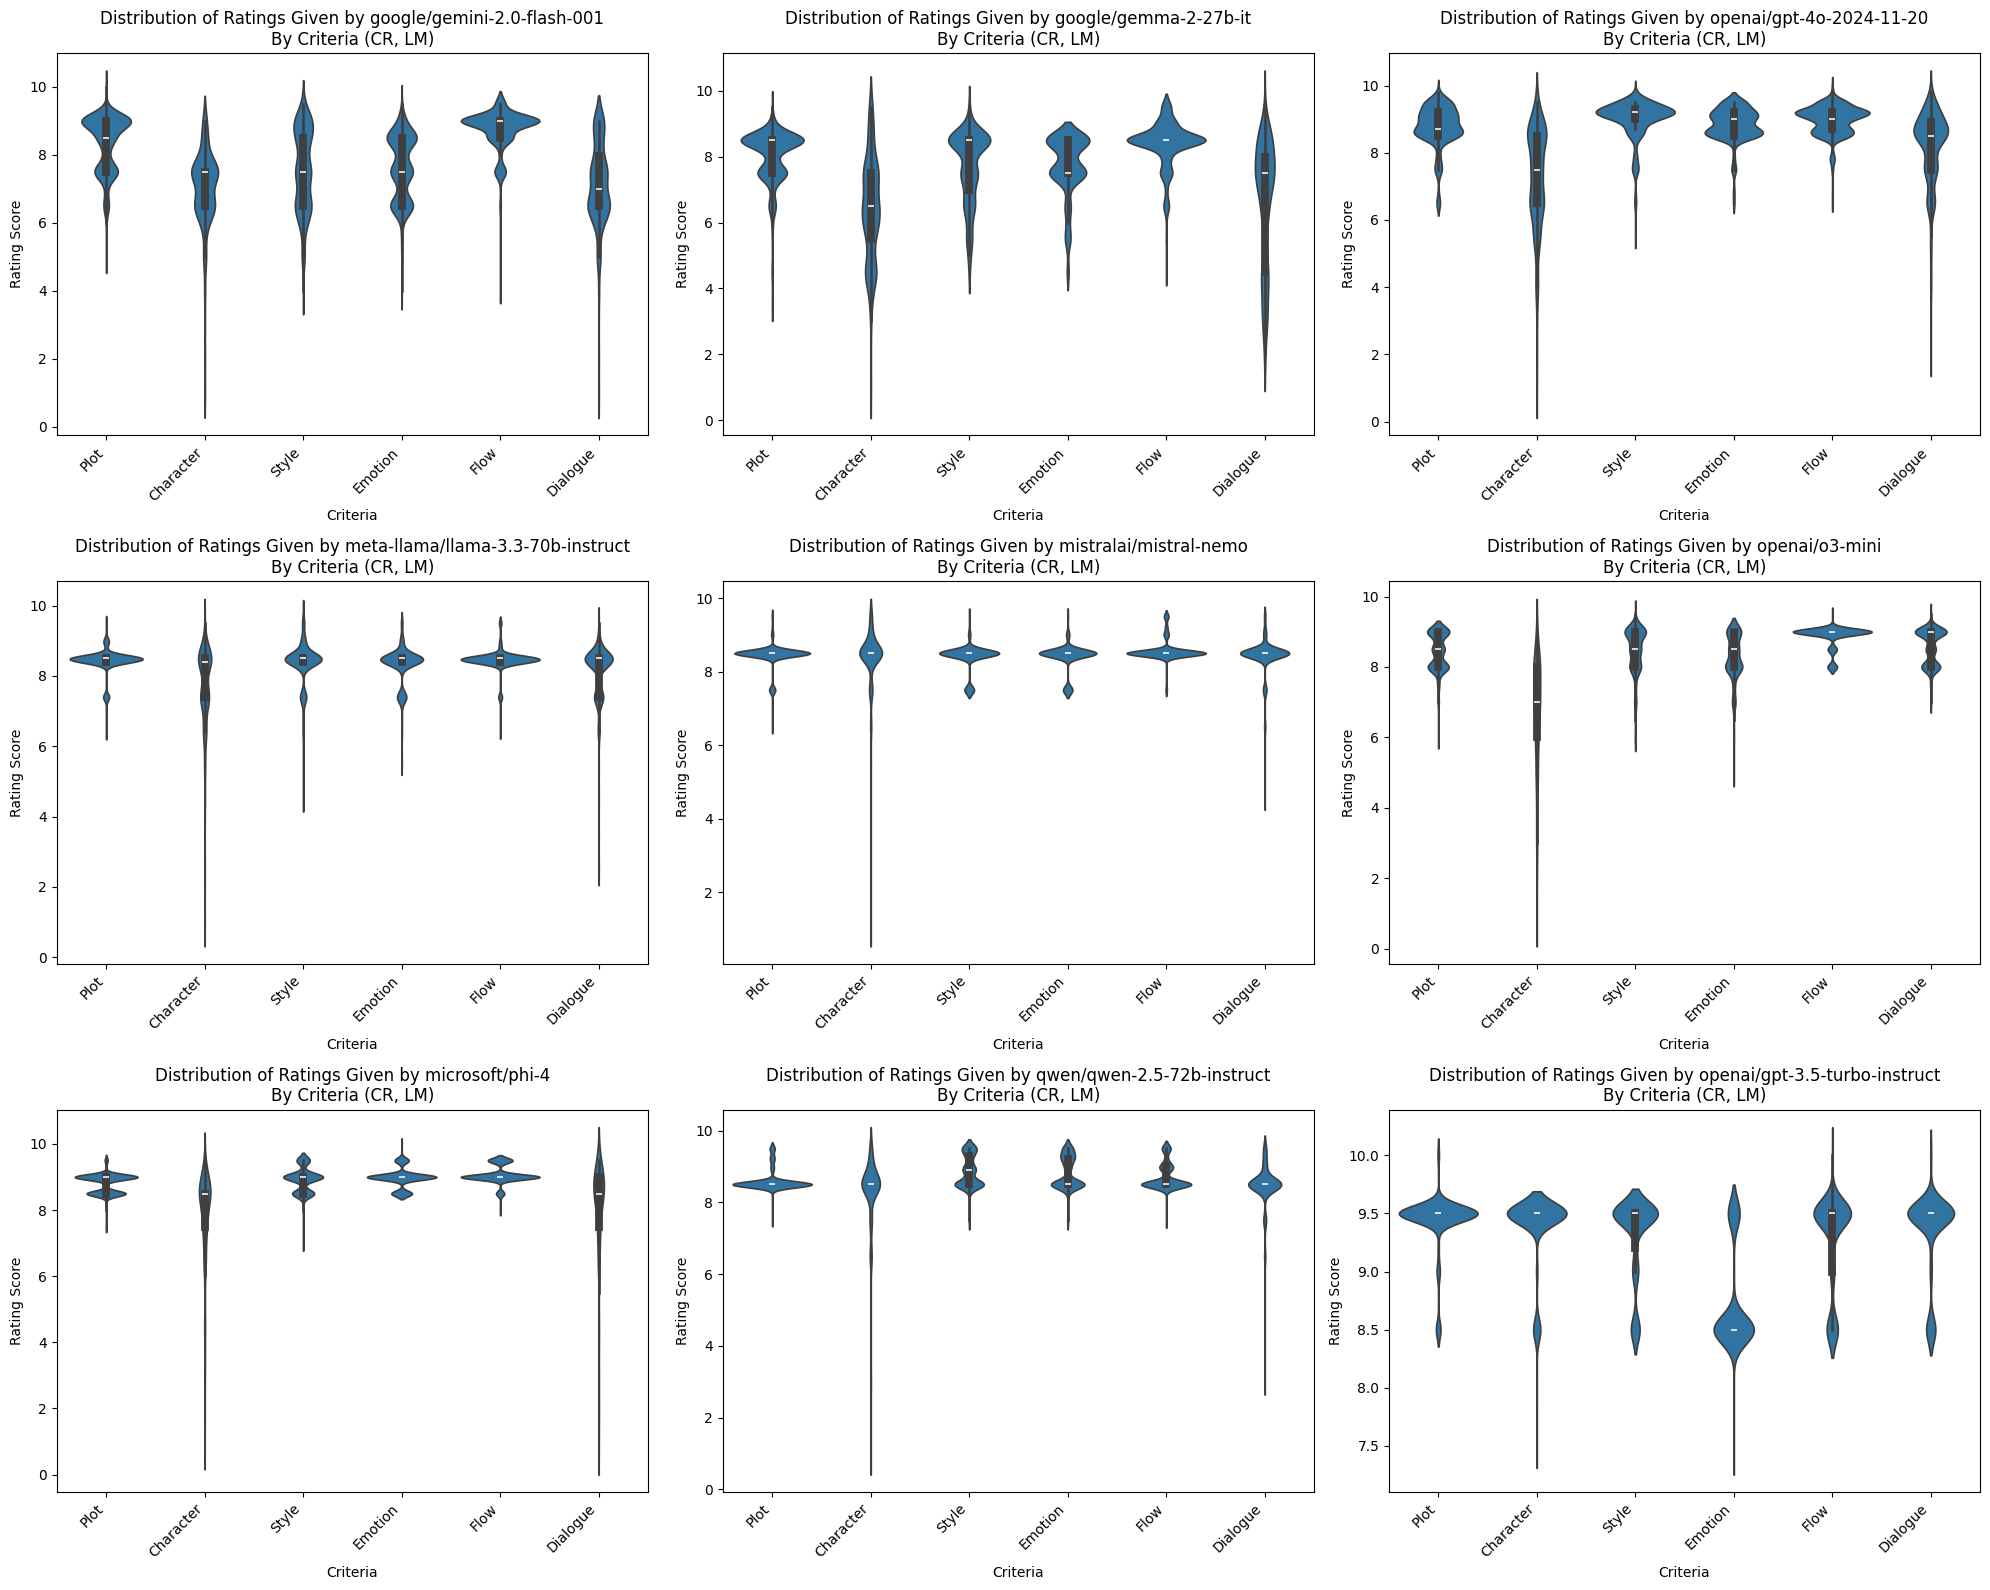


Summary statistics of ratings given by each model per criteria:
                                             count  mean   std  min  25%  50%  \
judge_model                       criteria                                      
google/gemini-2.0-flash-001       Character  450.0  6.96  1.24  1.0  6.5  7.5   
                                  Dialogue   450.0  7.11  1.26  1.0  6.5  7.0   
                                  Emotion    450.0  7.63  0.93  4.0  6.5  7.5   
                                  Flow       450.0  8.74  0.62  4.0  8.5  9.0   
                                  Plot       450.0  8.34  0.81  5.0  7.5  8.5   
                                  Style      450.0  7.56  1.17  4.0  6.5  7.5   
google/gemma-2-27b-it             Character  450.0  6.41  1.58  1.0  5.5  6.5   
                                  Dialogue   450.0  6.60  1.88  2.0  4.5  7.5   
                                  Emotion    450.0  7.70  0.94  4.5  7.5  7.5   
                                  Flow      

In [7]:
# Create figure with subplots for each model's given ratings per criteria
plt.figure(figsize=(20,16))

# Get unique models and criteria
models = cr_lm_df['judge_model'].unique()
criteria_list = cr_lm_df['criteria'].unique()

# Create subplot for each model-criteria combination
for i, model in enumerate(models):
    model_ratings = cr_lm_df[cr_lm_df['judge_model'] == model]
    
    plt.subplot(3, 3, i+1)
    
    # Create violin plot with criteria on x-axis
    sns.violinplot(data=model_ratings, x='criteria', y='judge_rating')
    
    plt.title(f'Distribution of Ratings Given by {model}\nBy Criteria (CR, LM)')
    plt.ylabel('Rating Score')
    plt.xlabel('Criteria')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print summary statistics grouped by model and criteria
print("\nSummary statistics of ratings given by each model per criteria:")
print(cr_lm_df.groupby(['judge_model', 'criteria'])['judge_rating'].describe().round(2))



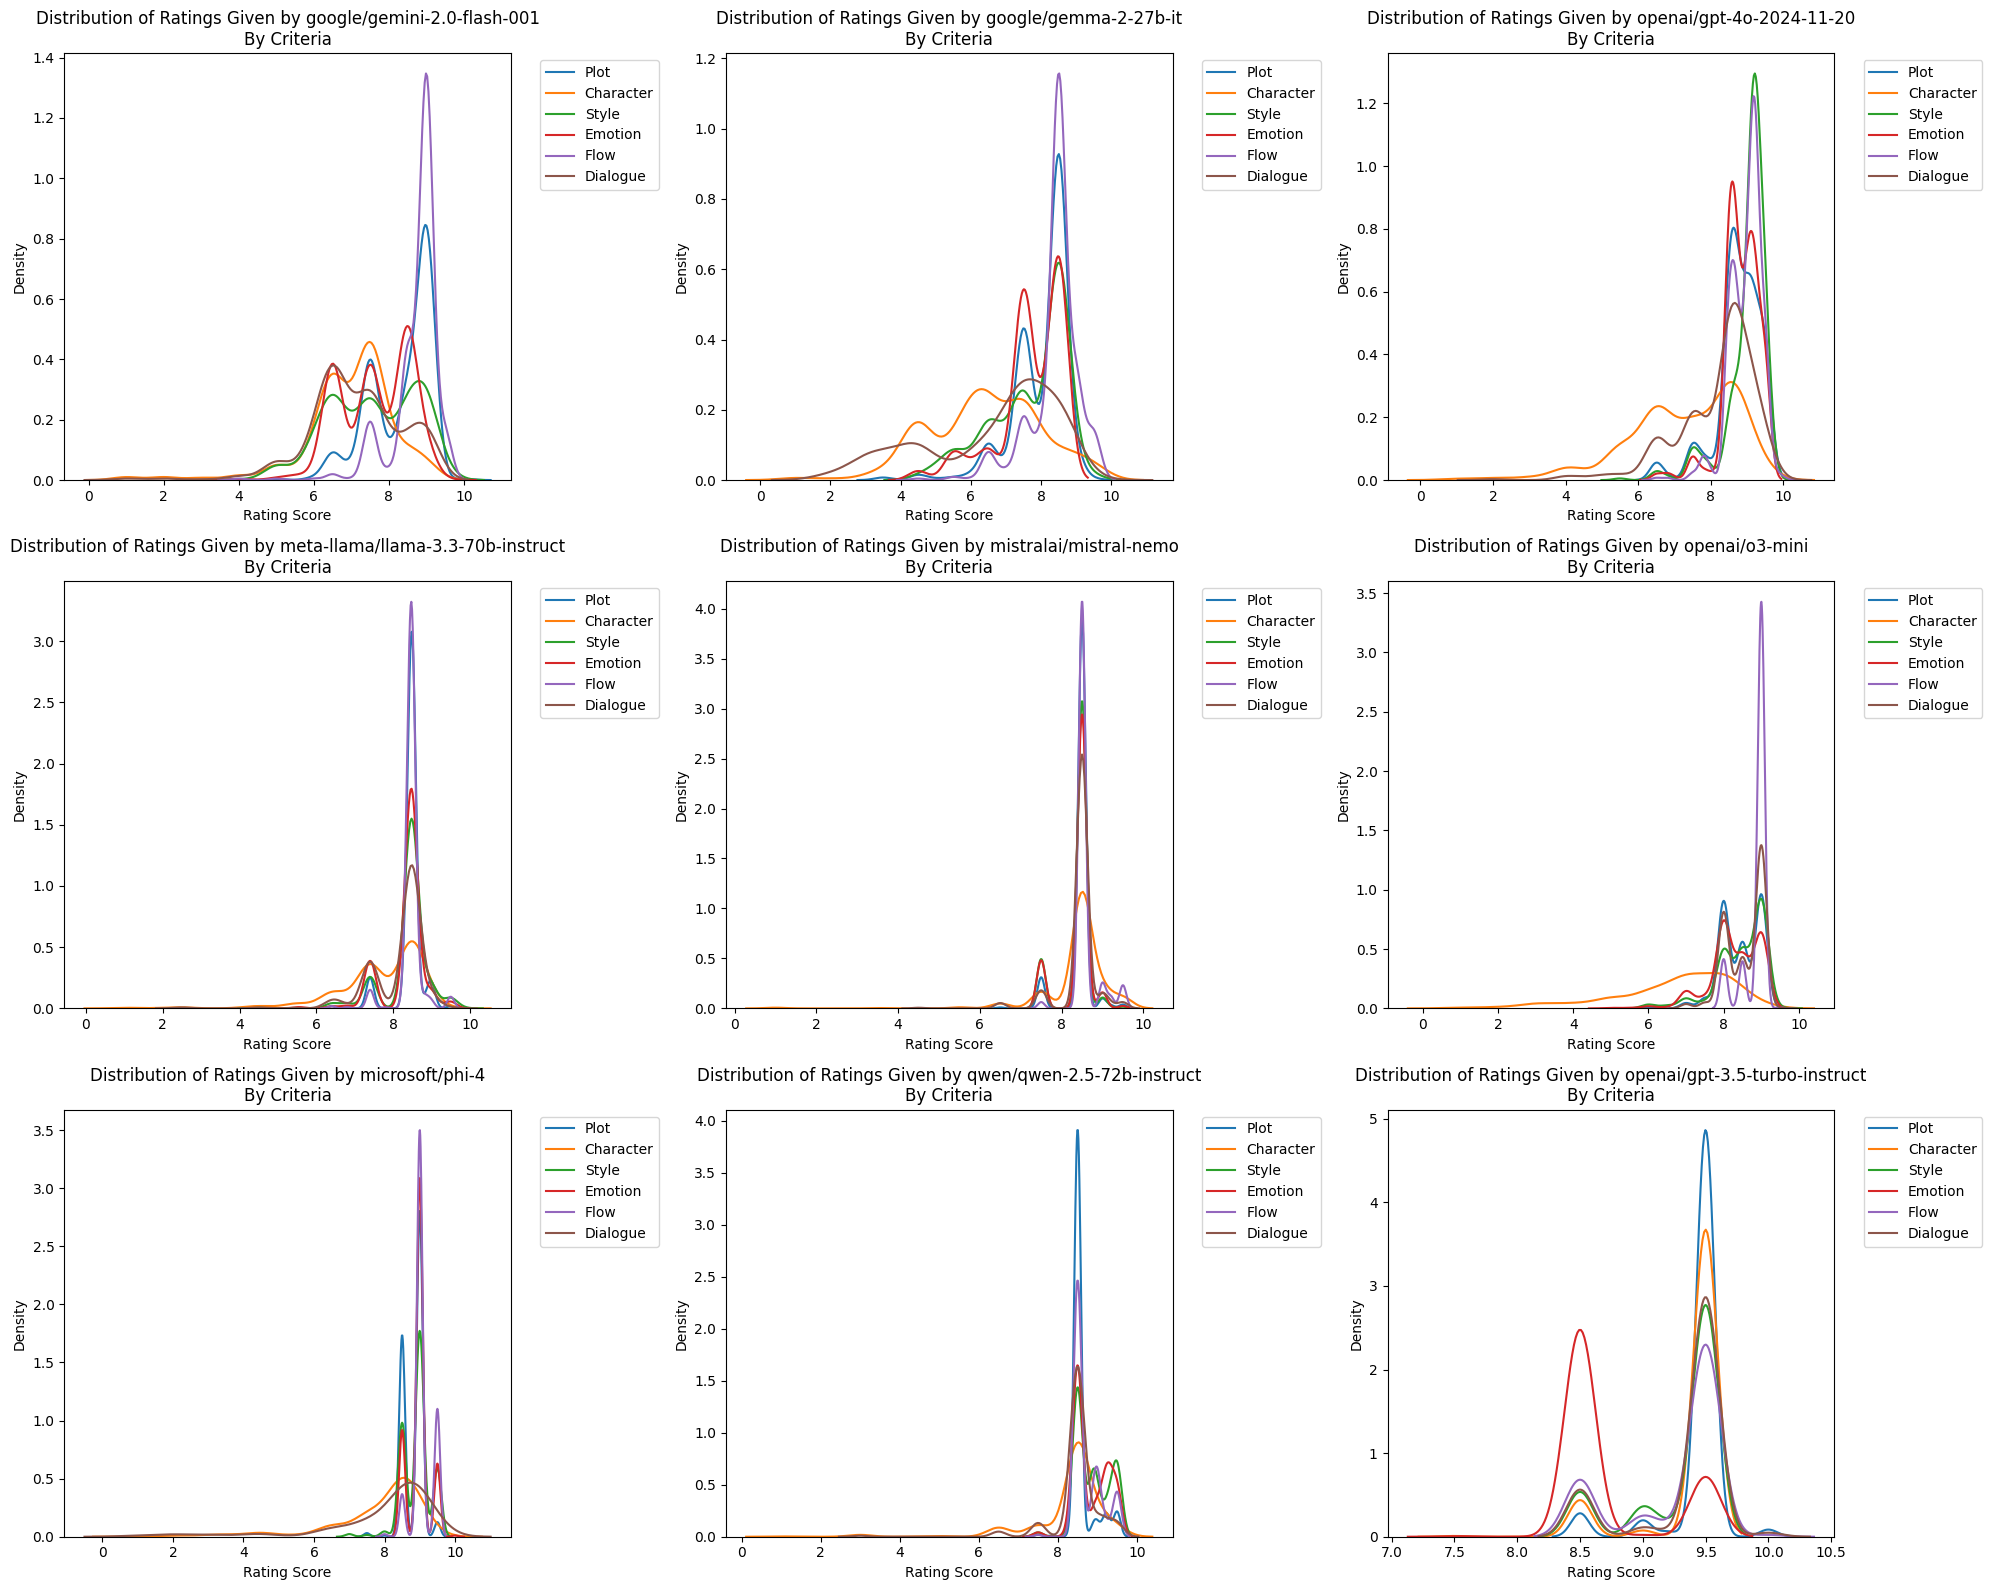


Summary statistics of ratings given by each model per criteria:
                                             count  mean   std  min  25%  50%  \
judge_model                       criteria                                      
google/gemini-2.0-flash-001       Character  450.0  6.96  1.24  1.0  6.5  7.5   
                                  Dialogue   450.0  7.11  1.26  1.0  6.5  7.0   
                                  Emotion    450.0  7.63  0.93  4.0  6.5  7.5   
                                  Flow       450.0  8.74  0.62  4.0  8.5  9.0   
                                  Plot       450.0  8.34  0.81  5.0  7.5  8.5   
                                  Style      450.0  7.56  1.17  4.0  6.5  7.5   
google/gemma-2-27b-it             Character  450.0  6.41  1.58  1.0  5.5  6.5   
                                  Dialogue   450.0  6.60  1.88  2.0  4.5  7.5   
                                  Emotion    450.0  7.70  0.94  4.5  7.5  7.5   
                                  Flow      

In [39]:
# Create figure with subplots for each model's given ratings per criteria
plt.figure(figsize=(20,16))

# Get unique models and criteria
models = cr_lm_df['judge_model'].unique()
criteria_list = cr_lm_df['criteria'].unique()

# Create subplot for each model-criteria combination
for i, model in enumerate(models):
    model_ratings = cr_lm_df[cr_lm_df['judge_model'] == model]
    
    plt.subplot(3, 3, i+1)
    
    # Create KDE plot for each criteria
    for criteria in criteria_list:
        criteria_ratings = model_ratings[model_ratings['criteria'] == criteria]['judge_rating']
        sns.kdeplot(data=criteria_ratings, label=criteria)
    
    plt.title(f'Distribution of Ratings Given by {model}\nBy Criteria')
    plt.ylabel('Density')
    plt.xlabel('Rating Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print summary statistics grouped by model and criteria
print("\nSummary statistics of ratings given by each model per criteria:")
print(cr_lm_df.groupby(['judge_model', 'criteria'])['judge_rating'].describe().round(2))


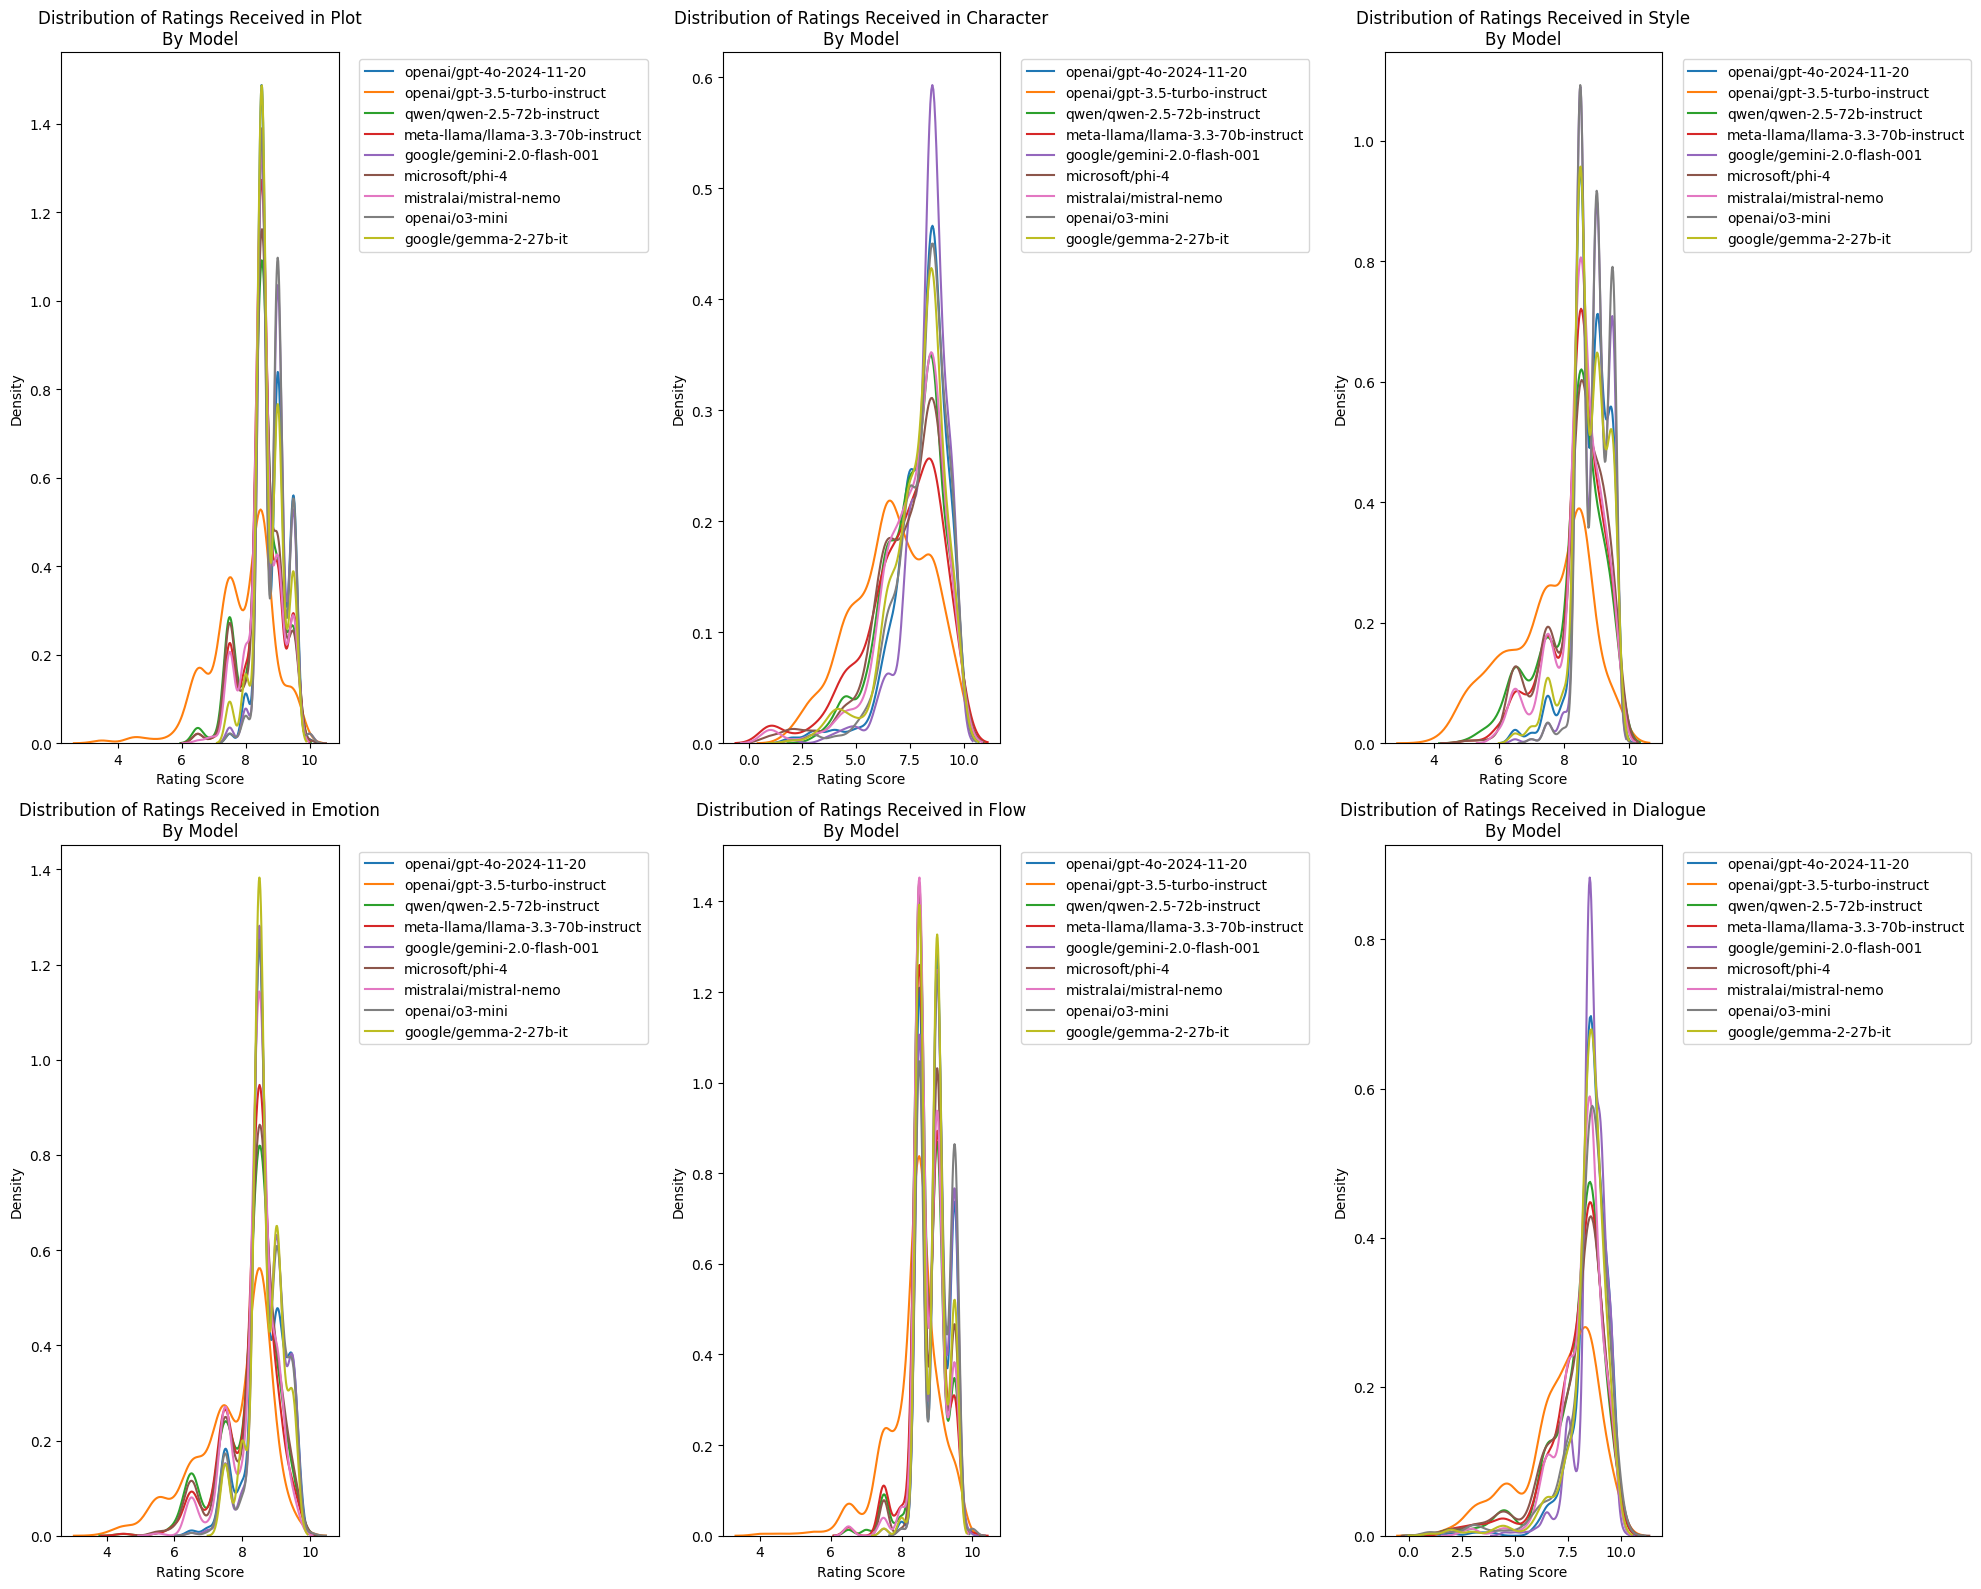


Summary statistics of ratings received by each model per criteria:
                                             count  mean   std  min   25%  \
criteria  response_model                                                    
Character google/gemini-2.0-flash-001        450.0  8.28  1.04  2.0  8.00   
          google/gemma-2-27b-it              450.0  7.84  1.33  2.0  7.40   
          meta-llama/llama-3.3-70b-instruct  450.0  7.20  1.83  1.0  6.50   
          microsoft/phi-4                    450.0  7.50  1.62  1.0  6.50   
          mistralai/mistral-nemo             450.0  7.63  1.53  1.0  6.50   
          openai/gpt-3.5-turbo-instruct      450.0  6.63  1.79  2.0  5.50   
          openai/gpt-4o-2024-11-20           450.0  8.06  1.24  2.0  7.50   
          openai/o3-mini                     450.0  8.07  1.19  2.0  7.50   
          qwen/qwen-2.5-72b-instruct         450.0  7.65  1.36  3.0  6.50   
Dialogue  google/gemini-2.0-flash-001        450.0  8.61  0.70  4.5  8.50   
        

In [40]:
# Create figure with subplots for each criteria showing distribution of received ratings by model
plt.figure(figsize=(20,16))

# Get unique models and criteria
models = cr_lm_df['response_model'].unique()
criteria_list = cr_lm_df['criteria'].unique()

# Create subplot for each criteria
for i, criteria in enumerate(criteria_list):
    criteria_ratings = cr_lm_df[cr_lm_df['criteria'] == criteria]
    
    plt.subplot(2, 3, i+1)
    
    # Create KDE plot for each model's received ratings
    for model in models:
        model_ratings = criteria_ratings[criteria_ratings['response_model'] == model]['judge_rating']
        sns.kdeplot(data=model_ratings, label=model)
    
    plt.title(f'Distribution of Ratings Received in {criteria}\nBy Model')
    plt.ylabel('Density')
    plt.xlabel('Rating Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print summary statistics grouped by criteria and model
print("\nSummary statistics of ratings received by each model per criteria:")
print(cr_lm_df.groupby(['criteria', 'response_model'])['judge_rating'].describe().round(2))


Question 8: Which models are most consistent in their received ratings?

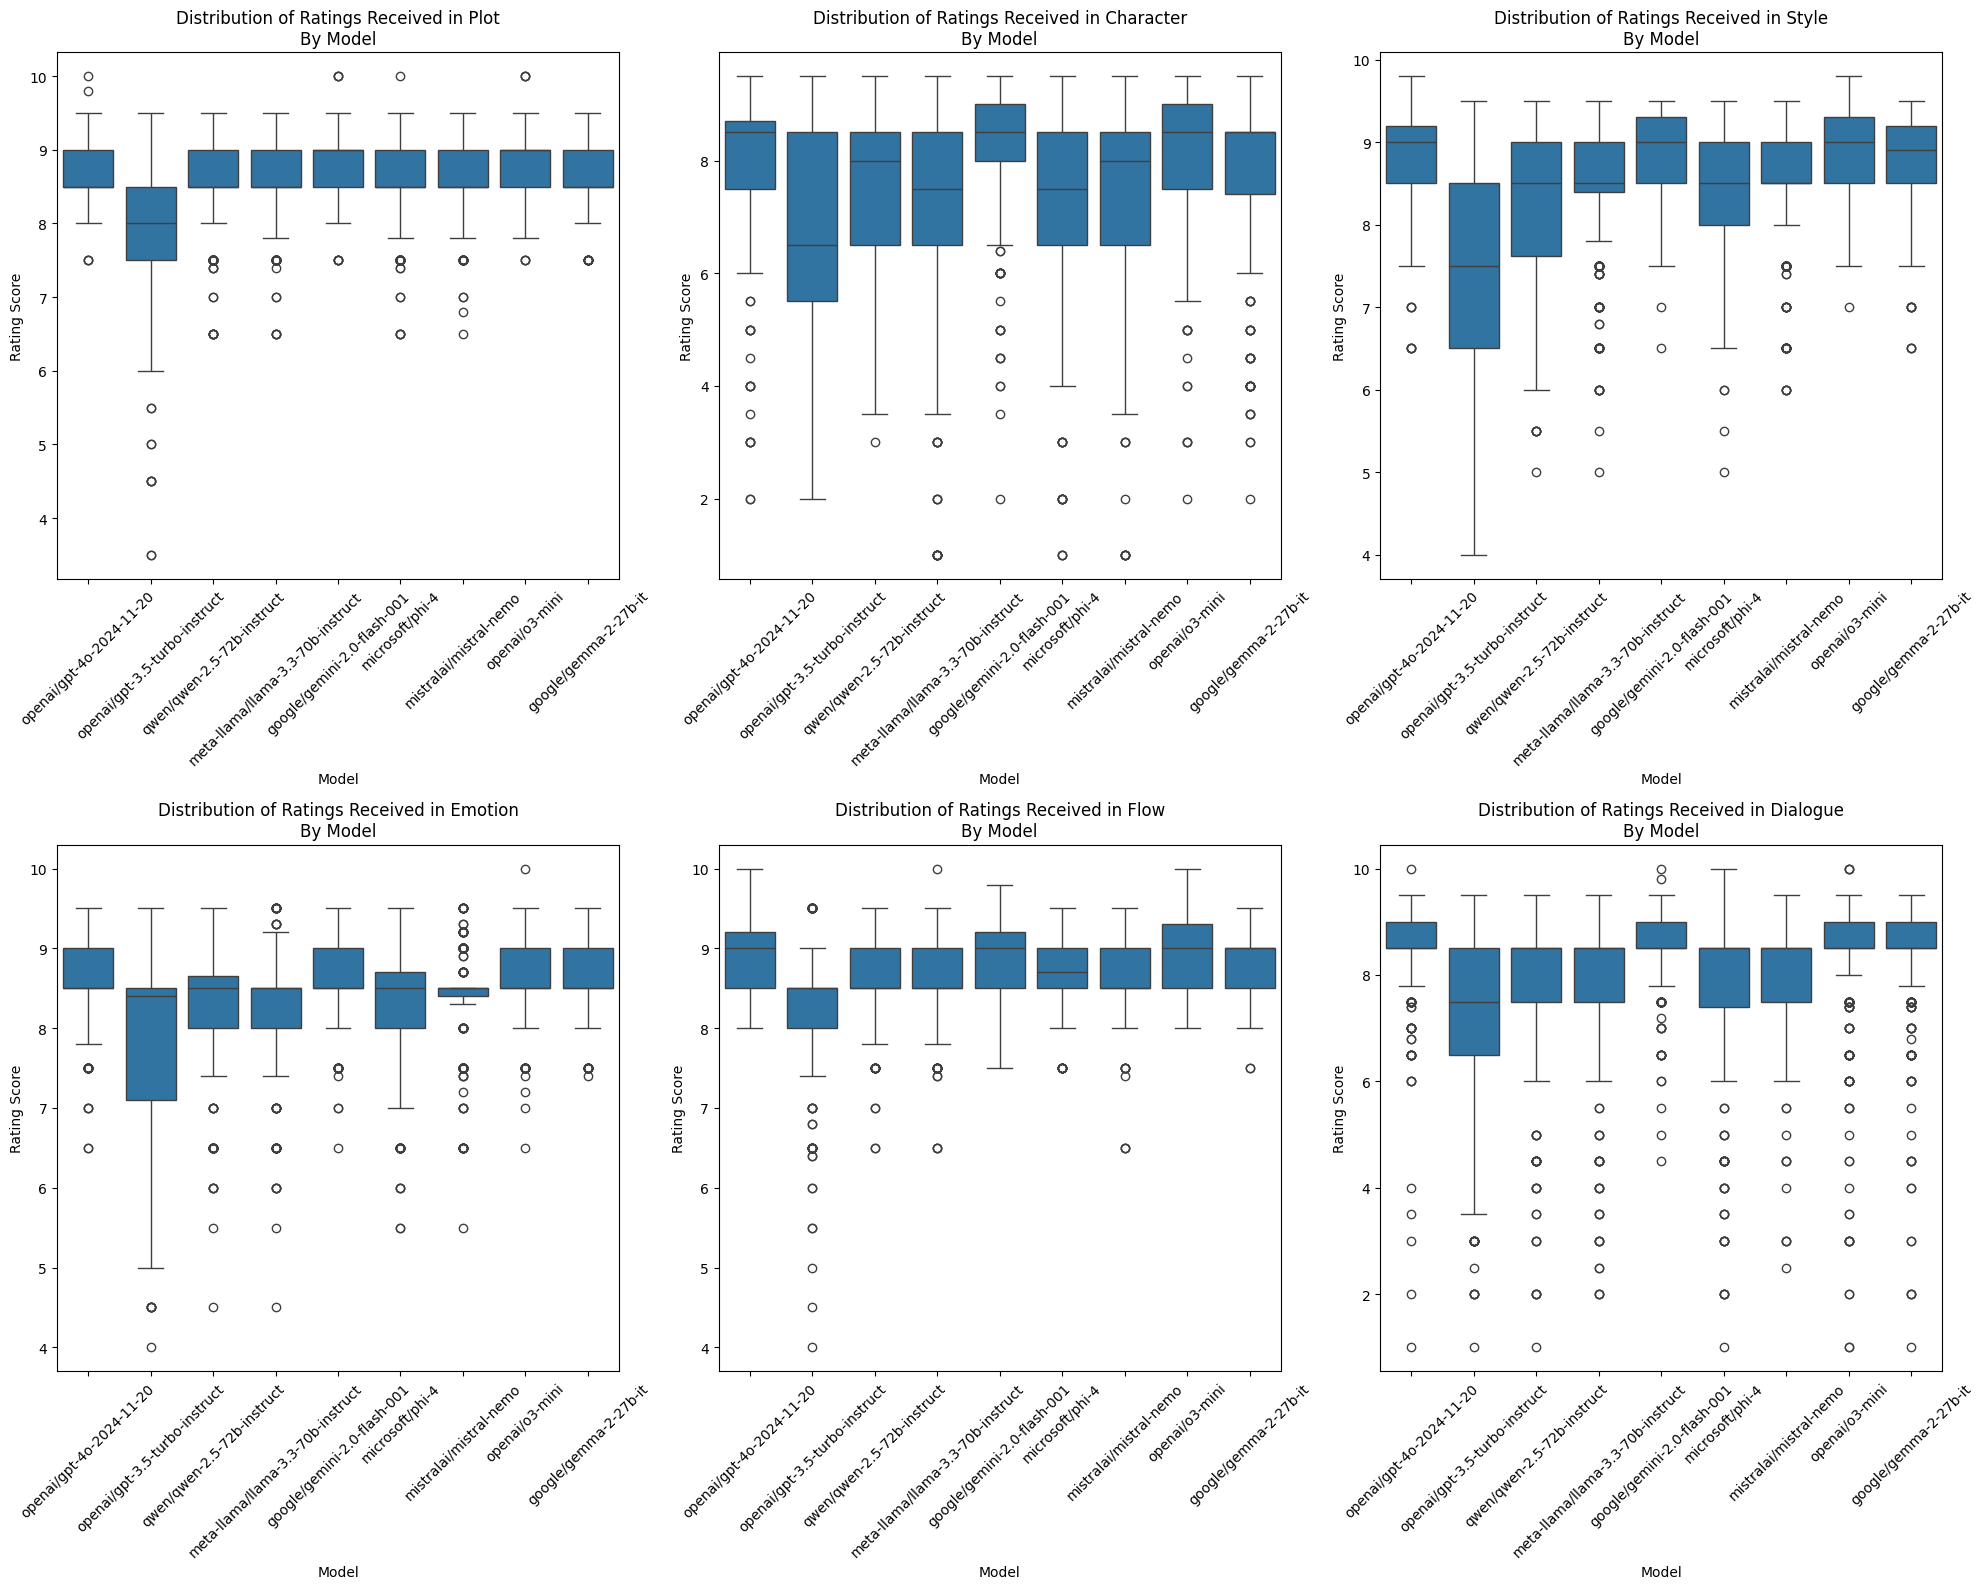


Standard deviation of ratings received by each model per criteria:
response_model  google/gemini-2.0-flash-001  google/gemma-2-27b-it  \
criteria                                                             
Character                              1.04                   1.33   
Dialogue                               0.70                   1.13   
Emotion                                0.51                   0.48   
Flow                                   0.40                   0.38   
Plot                                   0.42                   0.45   
Style                                  0.46                   0.57   

response_model  meta-llama/llama-3.3-70b-instruct  microsoft/phi-4  \
criteria                                                             
Character                                    1.83             1.62   
Dialogue                                     1.38             1.49   
Emotion                                      0.74             0.77   
Flow                 

In [41]:
# Create figure with subplots for each criteria showing boxplots of received ratings by model
plt.figure(figsize=(20,16))

# Get unique models and criteria 
models = cr_lm_df['response_model'].unique()
criteria_list = cr_lm_df['criteria'].unique()

# Create subplot for each criteria
for i, criteria in enumerate(criteria_list):
    criteria_ratings = cr_lm_df[cr_lm_df['criteria'] == criteria]
    
    plt.subplot(2, 3, i+1)
    
    # Create box plot for each model's received ratings
    sns.boxplot(data=criteria_ratings, x='response_model', y='judge_rating')
    
    plt.title(f'Distribution of Ratings Received in {criteria}\nBy Model')
    plt.ylabel('Rating Score')
    plt.xlabel('Model')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print standard deviation of ratings received by each model per criteria
print("\nStandard deviation of ratings received by each model per criteria:")
print(cr_lm_df.groupby(['criteria', 'response_model'])['judge_rating'].std().round(2).unstack())


Question 9. Which models are most similar in their given ratings?

Question 10: Which models are most dissimilar in their given ratings?

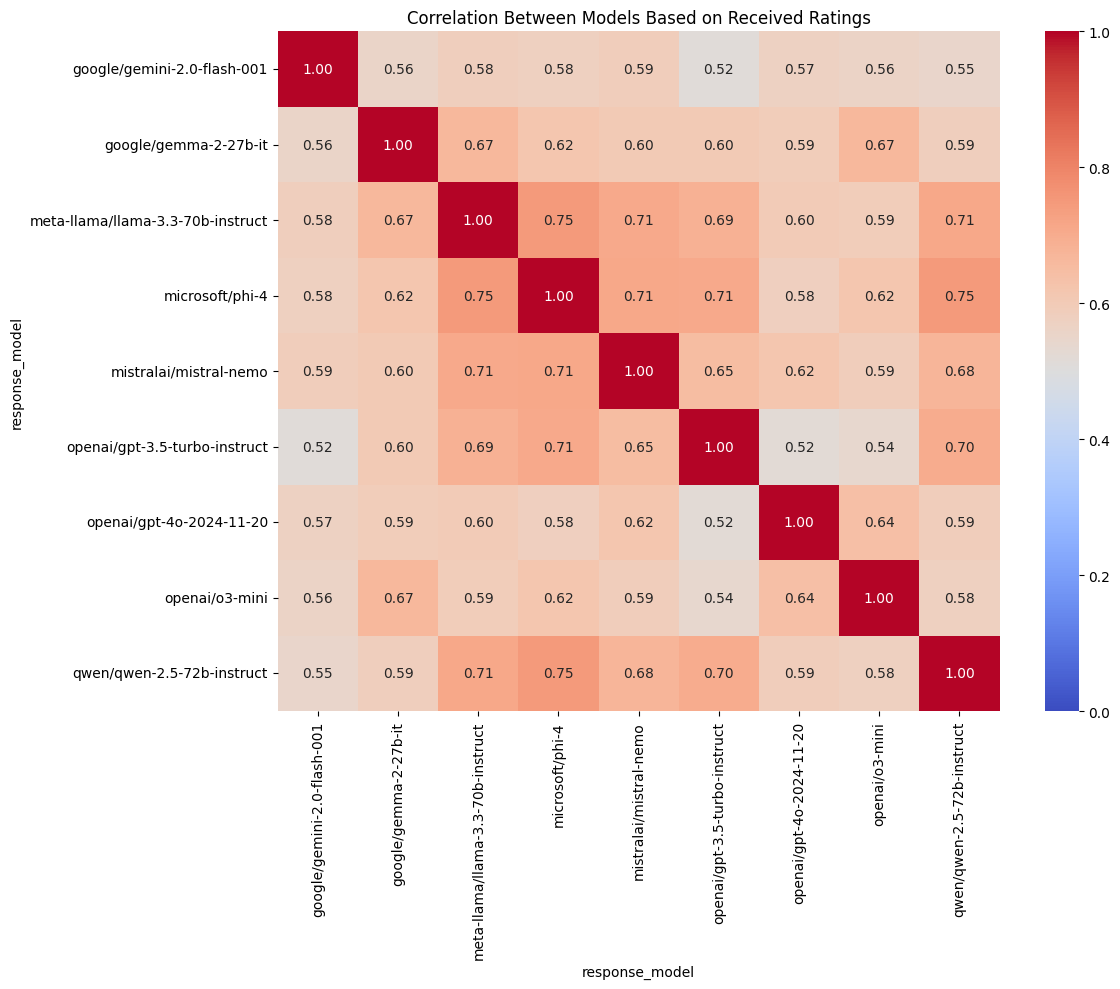

In [49]:
model_ratings = cr_lm_df.pivot_table(
    index=['question_id', 'criteria', 'judge_model'], 
    columns='response_model', 
    values='judge_rating'
)

# Calculate correlation between models based on received ratings
model_corr = model_ratings.corr()

# Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(model_corr, 
            annot=True, 
            cmap='coolwarm',
            vmin=0.0,    # Adjusted minimum value
            vmax=1.0,
            fmt='.2f')   # Show 2 decimal places
plt.title('Correlation Between Models Based on Received Ratings')
plt.tight_layout()
plt.show()

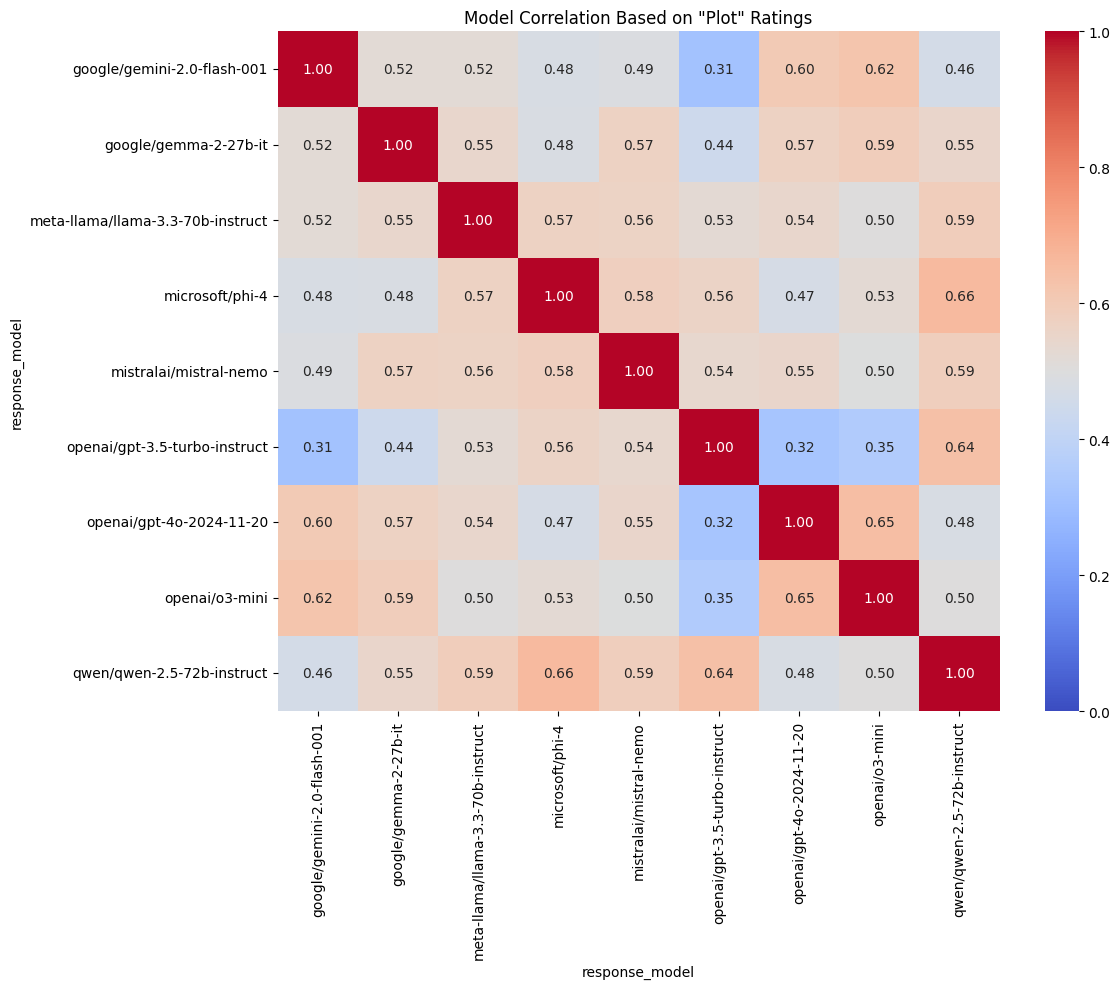

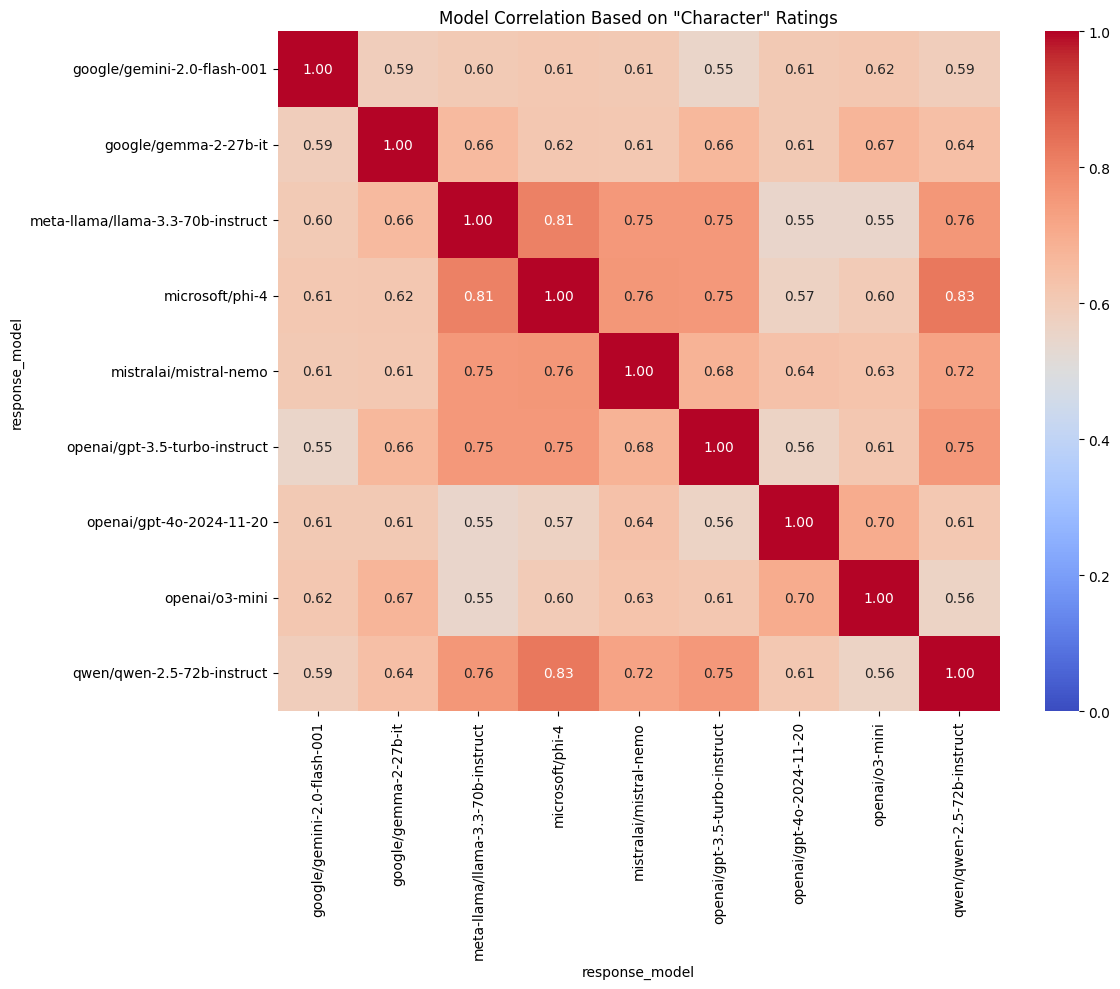

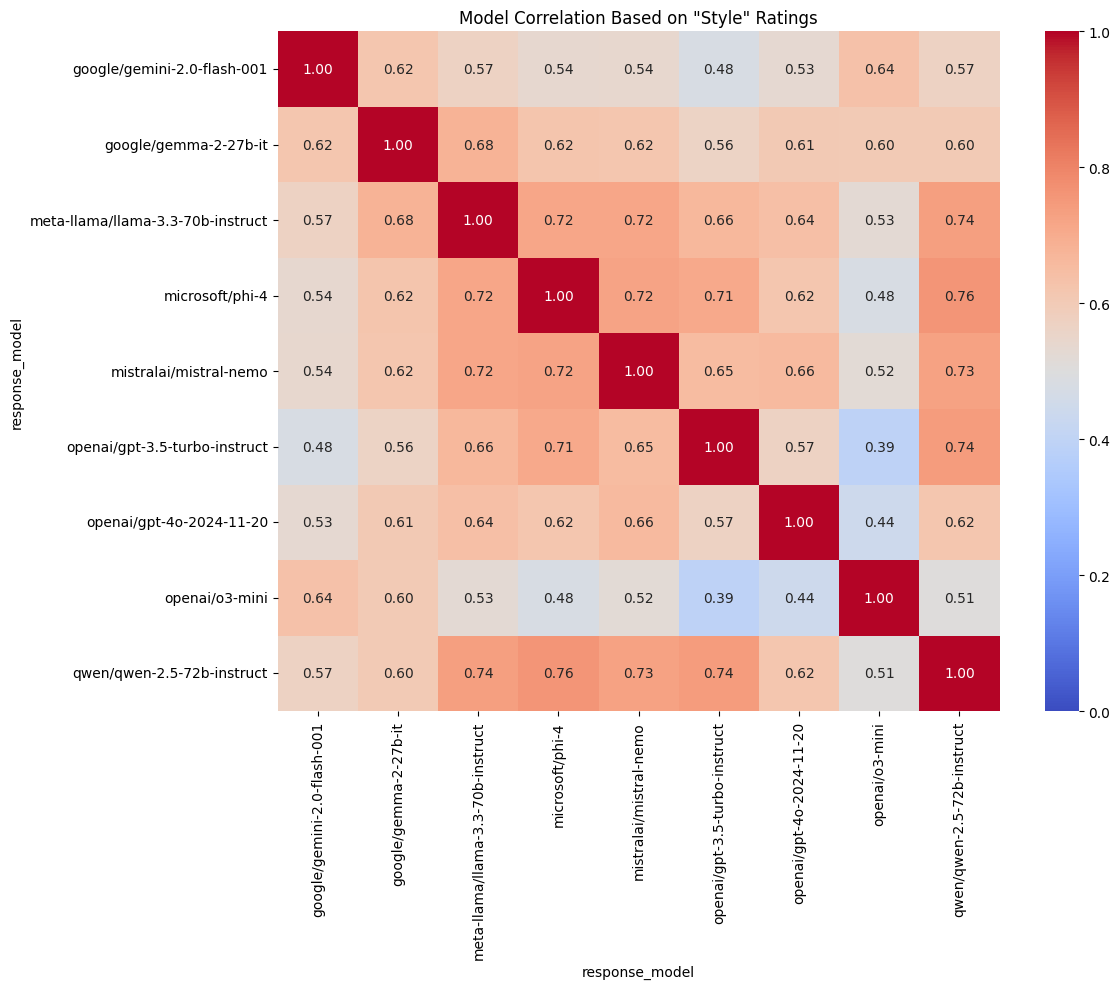

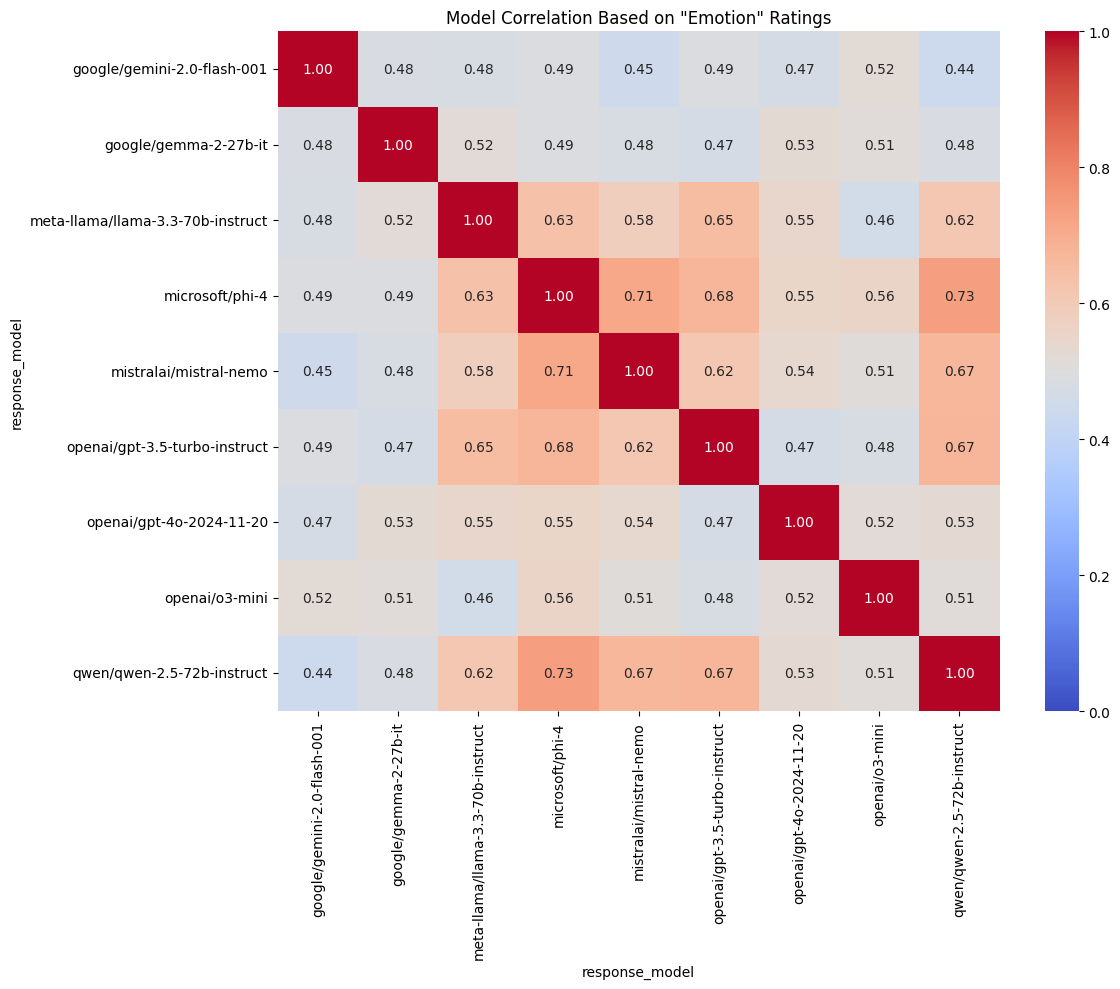

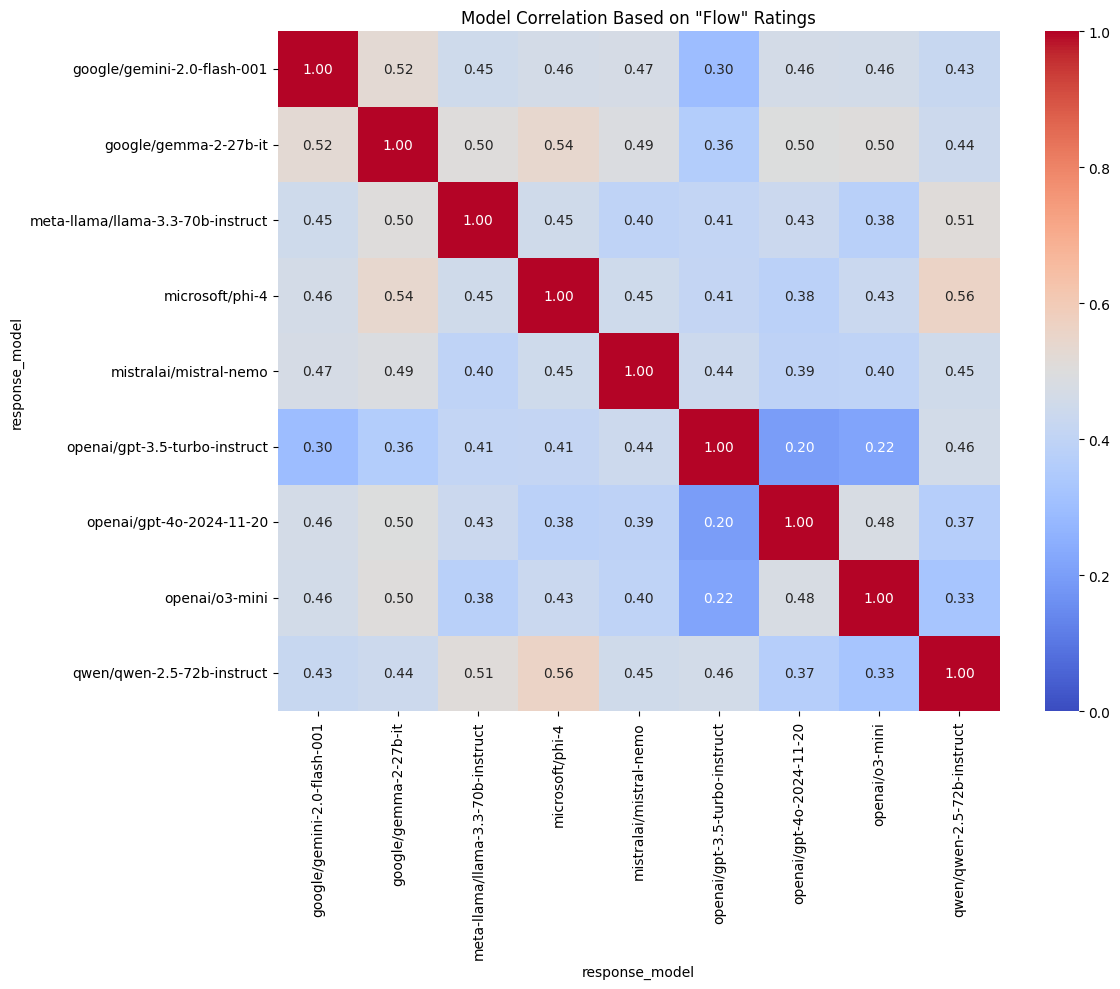

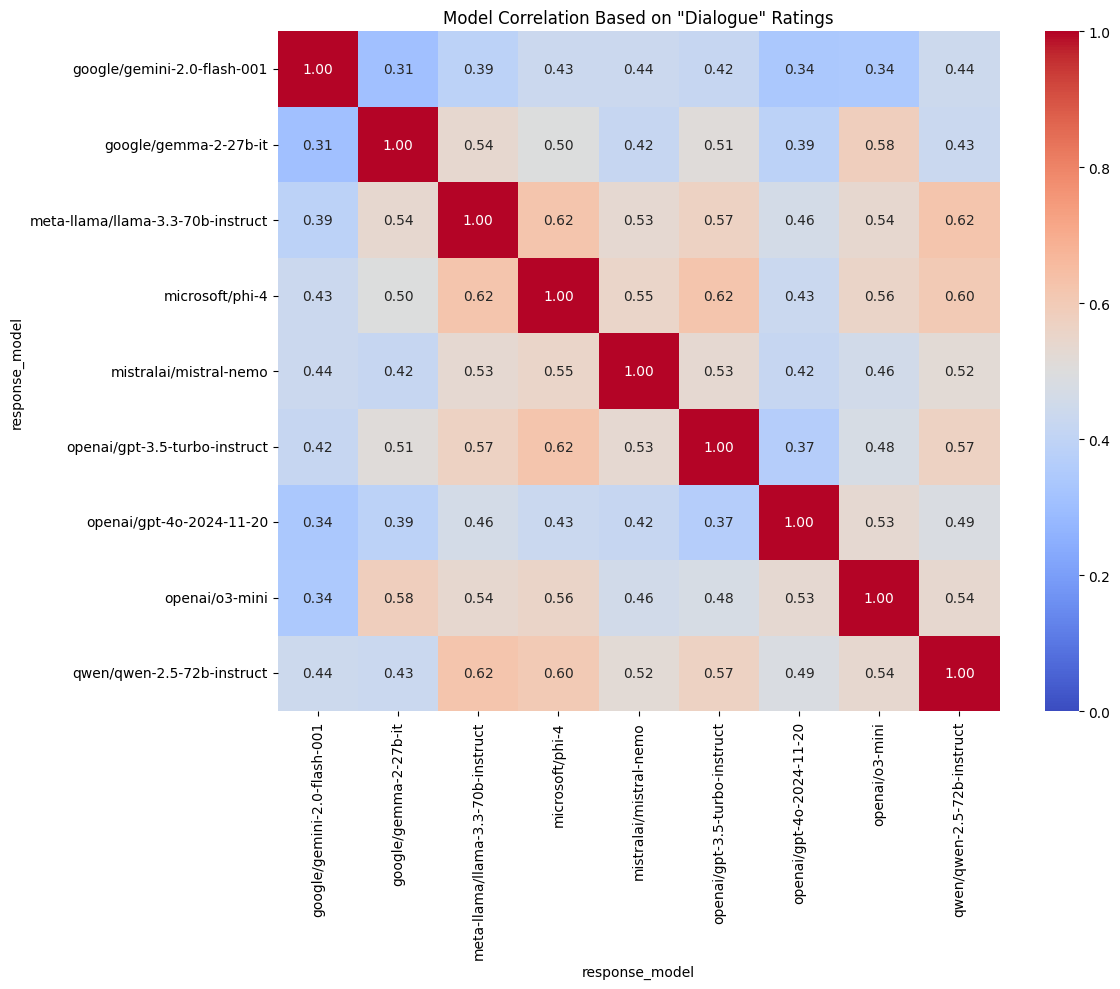

In [77]:
for criterion in cr_lm_df['criteria'].unique():
    # Filter data for this criterion
    criterion_data = cr_lm_df[cr_lm_df['criteria'] == criterion]
    
    # Create pivot table
    model_ratings = criterion_data.pivot_table(
        index=['question_id', 'judge_model'], 
        columns='response_model', 
        values='judge_rating'
    )
    
    # Calculate correlation
    model_corr = model_ratings.corr()
    
    # Visualization
    plt.figure(figsize=(12, 10))
    sns.heatmap(model_corr, 
                annot=True, 
                cmap='coolwarm',
                vmin=0.0,    # Adjusted minimum value
                vmax=1.0,
                fmt='.2f')   # Show 2 decimal places
    plt.title(f'Model Correlation Based on "{criterion}" Ratings')
    plt.tight_layout()
    plt.show()

Question 11: Which models are most similar in their received ratings?

Question 12: Which models are most dissimilar in their received ratings?

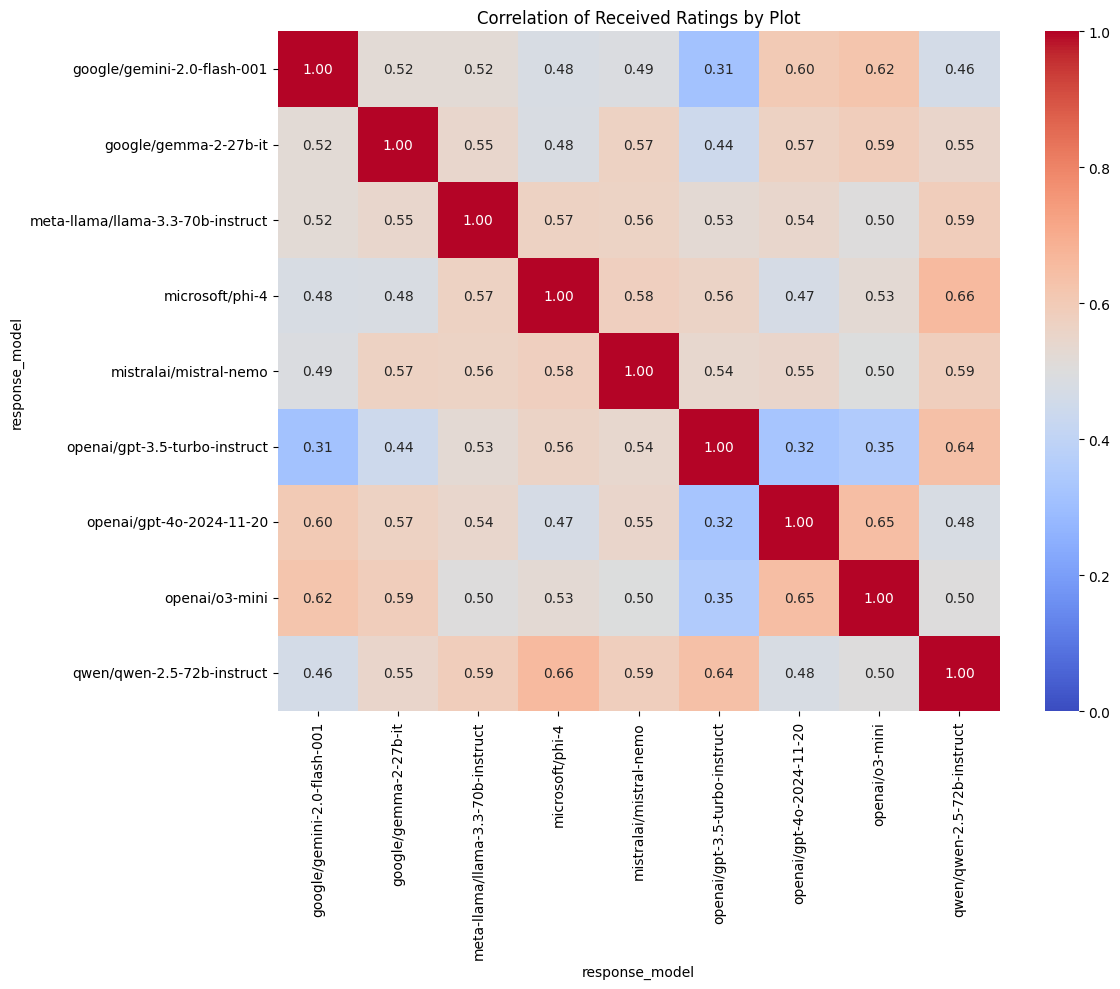

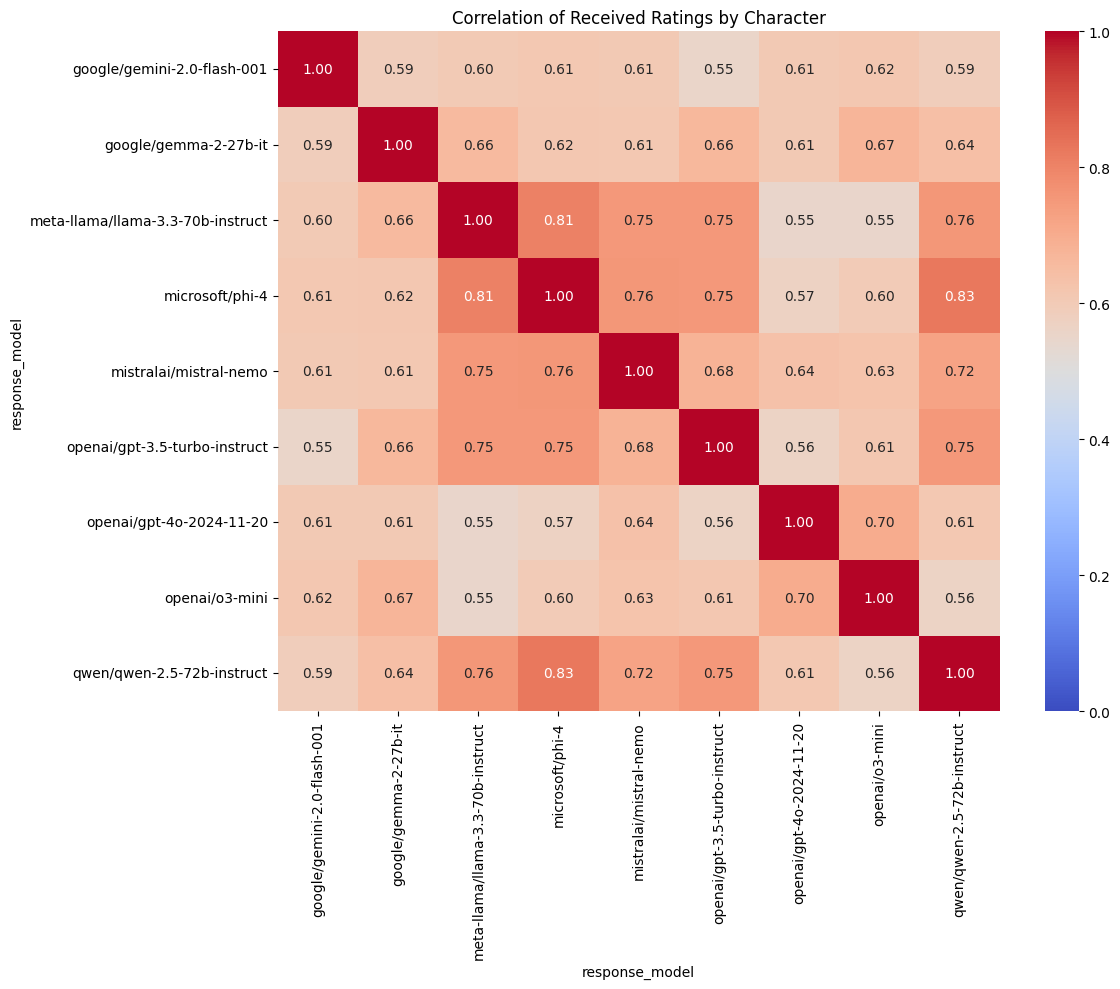

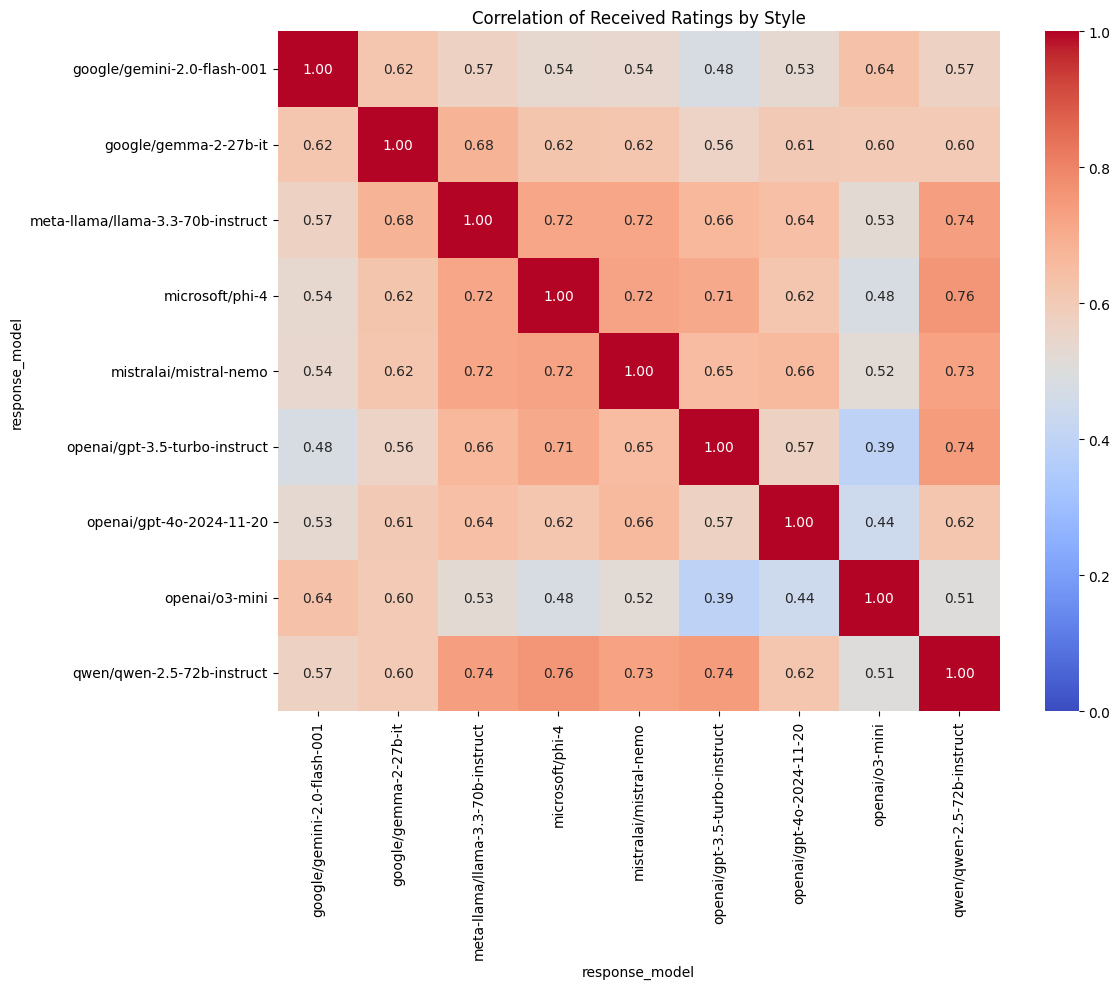

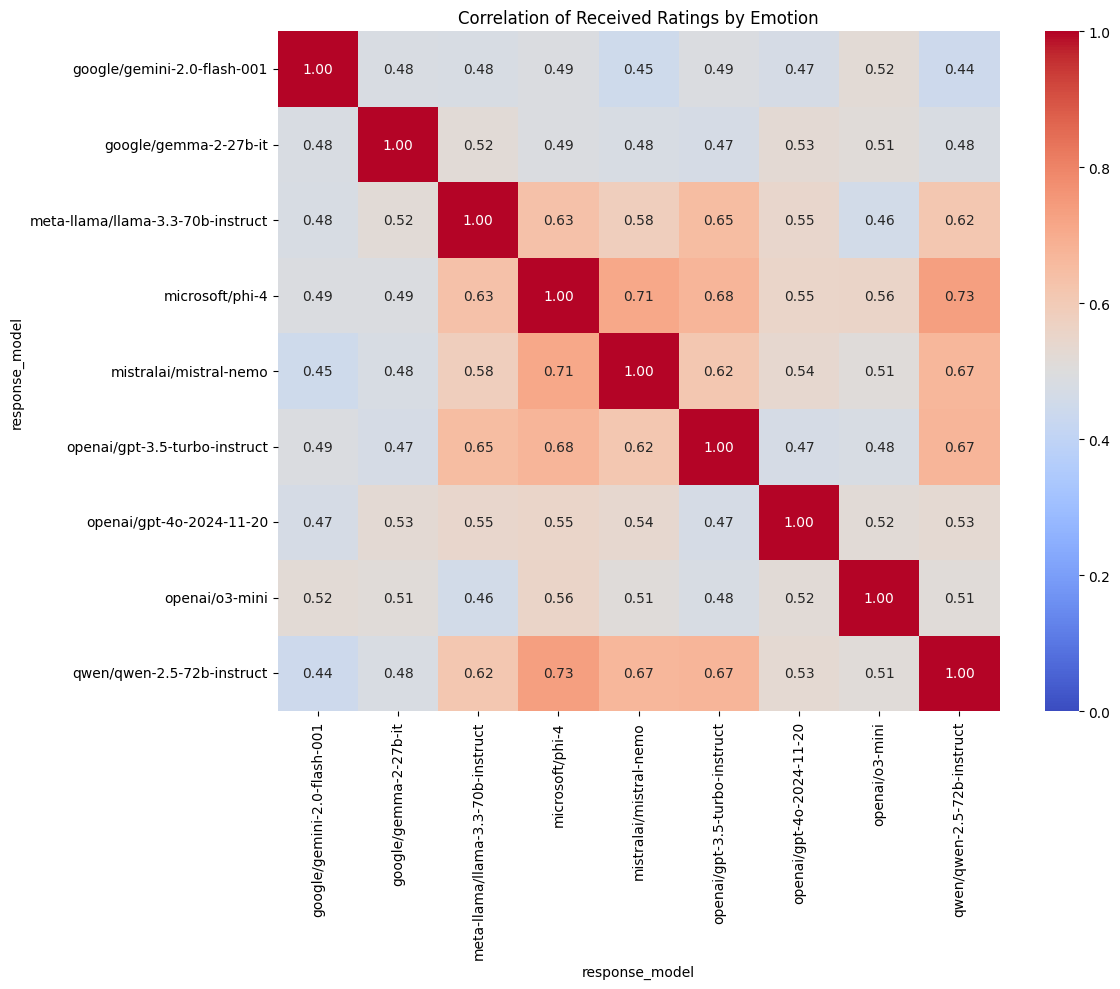

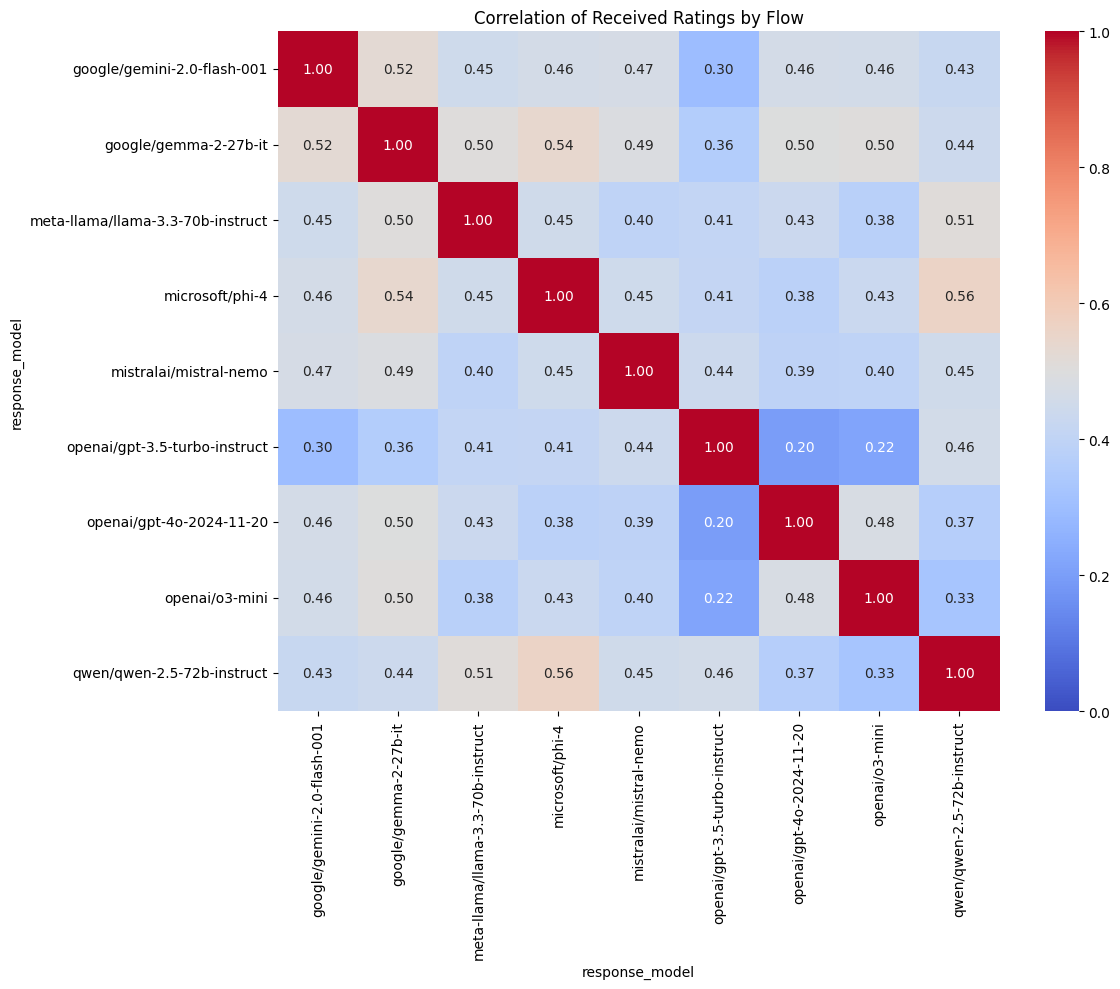

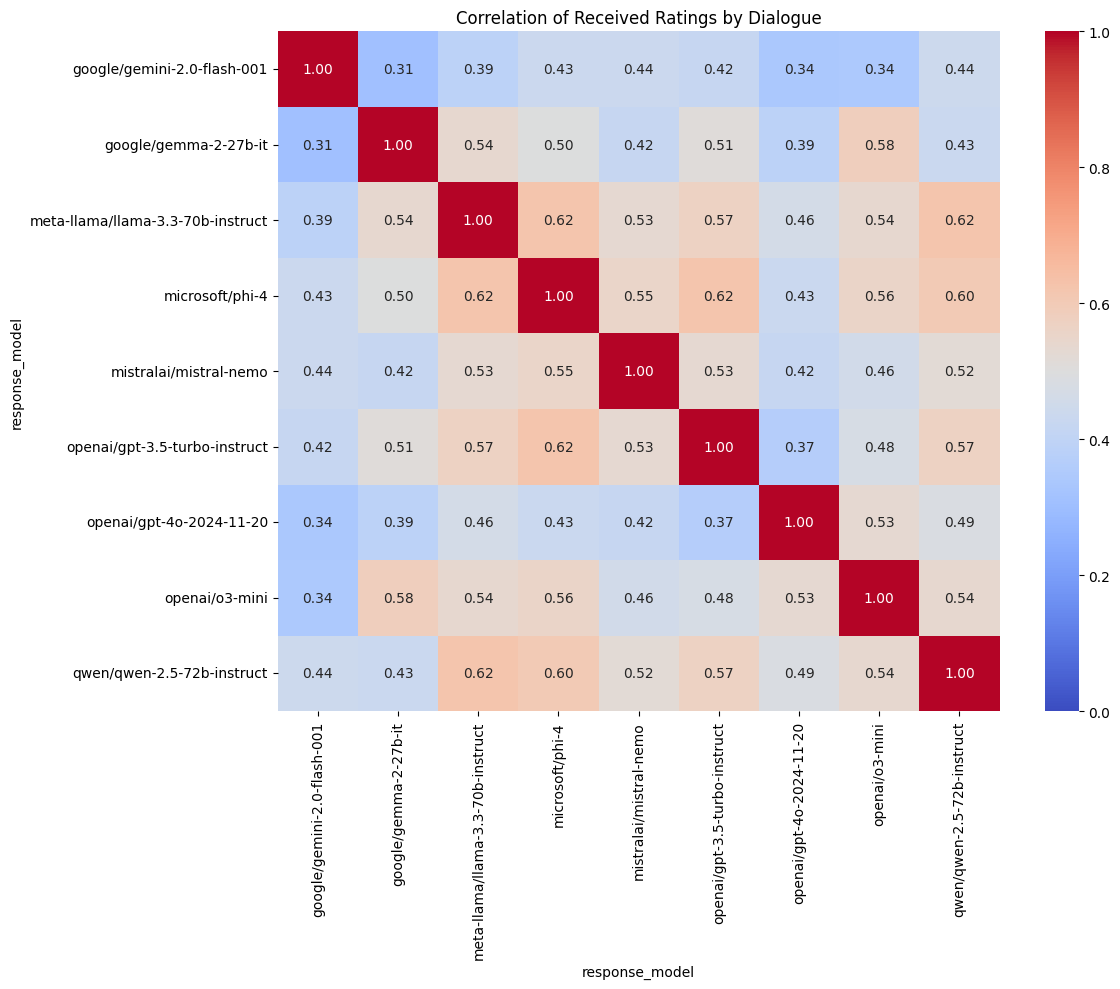

In [ ]:
# This correlation analysis shows how similar the ratings patterns are between different models
# For each criterion:
# - Each row represents ratings given to responses from different models for a specific (question, judge) pair
# - The correlation measures if models tend to get similar/different ratings from the same judges
# - High correlation (e.g. 0.8) means when one model gets high/low ratings, the other tends to also get high/low ratings
# - Low correlation (e.g. 0.2) means the ratings patterns are quite different between the models

for criterion in cr_lm_df['criteria'].unique():
    # Filter data for this criterion
    criterion_data = cr_lm_df[cr_lm_df['criteria'] == criterion]
    
    # Create pivot table for received ratings
    model_ratings = criterion_data.pivot_table(
        index=['question_id', 'judge_model'],
        columns='response_model',
        values='judge_rating'
    )
    
    # Calculate correlation
    model_corr = model_ratings.corr()
    
    # Visualization
    plt.figure(figsize=(12, 10))
    sns.heatmap(model_corr,
                annot=True,
                cmap='coolwarm', 
                vmin=0.0,    # Adjusted minimum value
                vmax=1.0,
                fmt='.2f')   # Show 2 decimal places
    plt.title(f'Correlation of Received Ratings by {criterion}')
    plt.tight_layout()
    plt.show()

Question 13: Which models are most similar to human judgements?

Question 14: Which models are most dissimilar to human judgements?

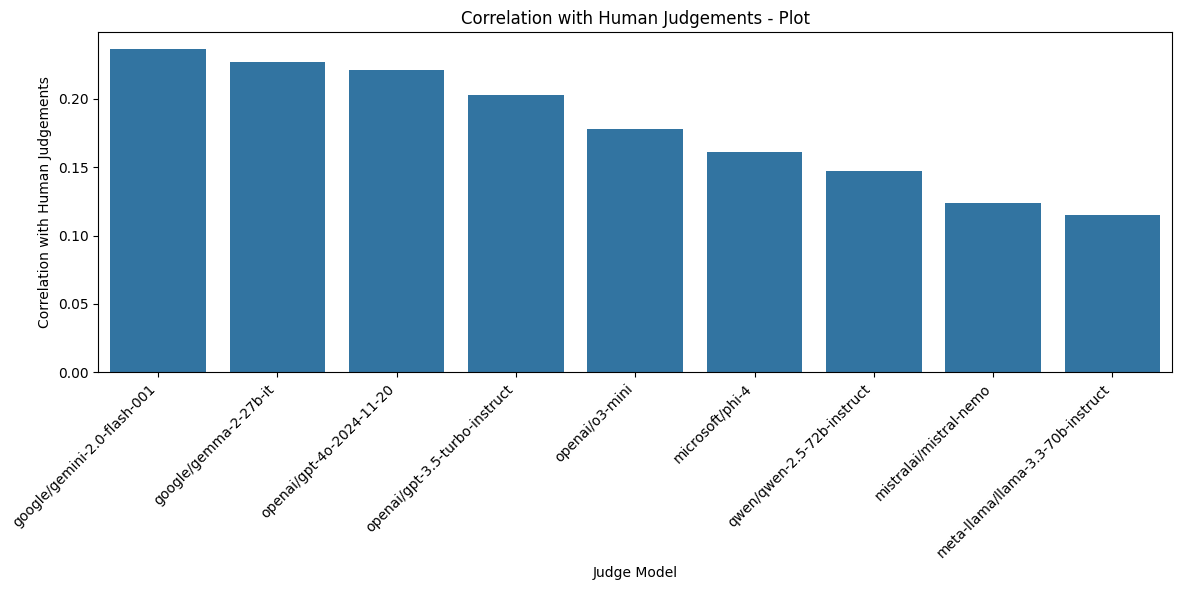


Correlations with Human Judgements for Plot:
judge_model
google/gemini-2.0-flash-001          0.237
google/gemma-2-27b-it                0.227
openai/gpt-4o-2024-11-20             0.221
openai/gpt-3.5-turbo-instruct        0.203
openai/o3-mini                       0.178
microsoft/phi-4                      0.161
qwen/qwen-2.5-72b-instruct           0.147
mistralai/mistral-nemo               0.124
meta-llama/llama-3.3-70b-instruct    0.115
Name: human, dtype: float64


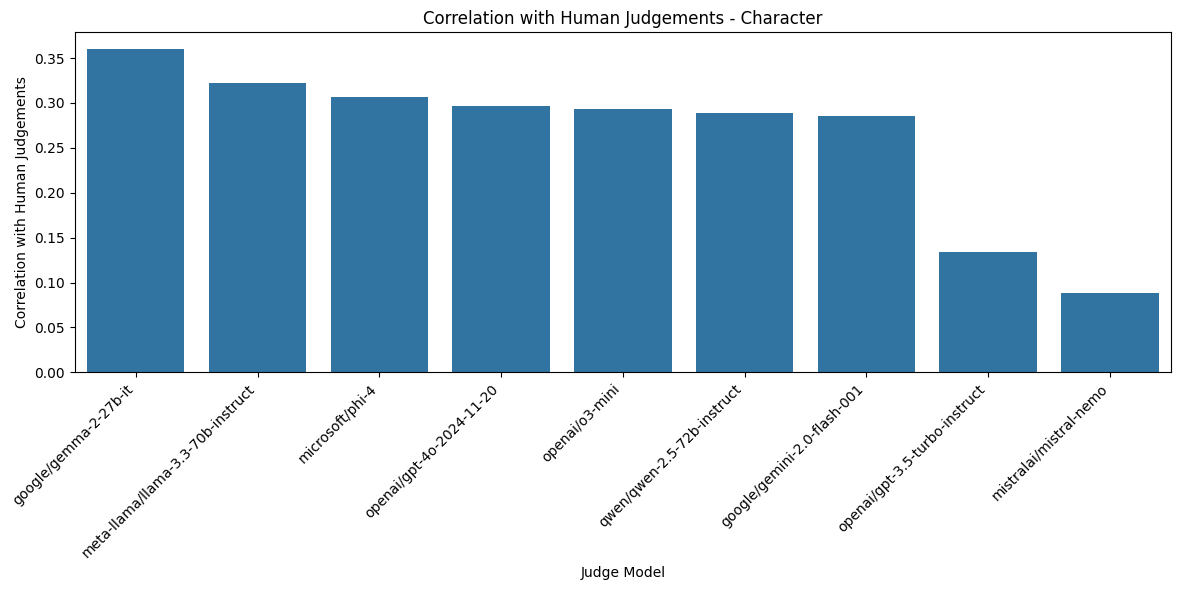


Correlations with Human Judgements for Character:
judge_model
google/gemma-2-27b-it                0.361
meta-llama/llama-3.3-70b-instruct    0.322
microsoft/phi-4                      0.306
openai/gpt-4o-2024-11-20             0.297
openai/o3-mini                       0.293
qwen/qwen-2.5-72b-instruct           0.289
google/gemini-2.0-flash-001          0.285
openai/gpt-3.5-turbo-instruct        0.135
mistralai/mistral-nemo               0.088
Name: human, dtype: float64


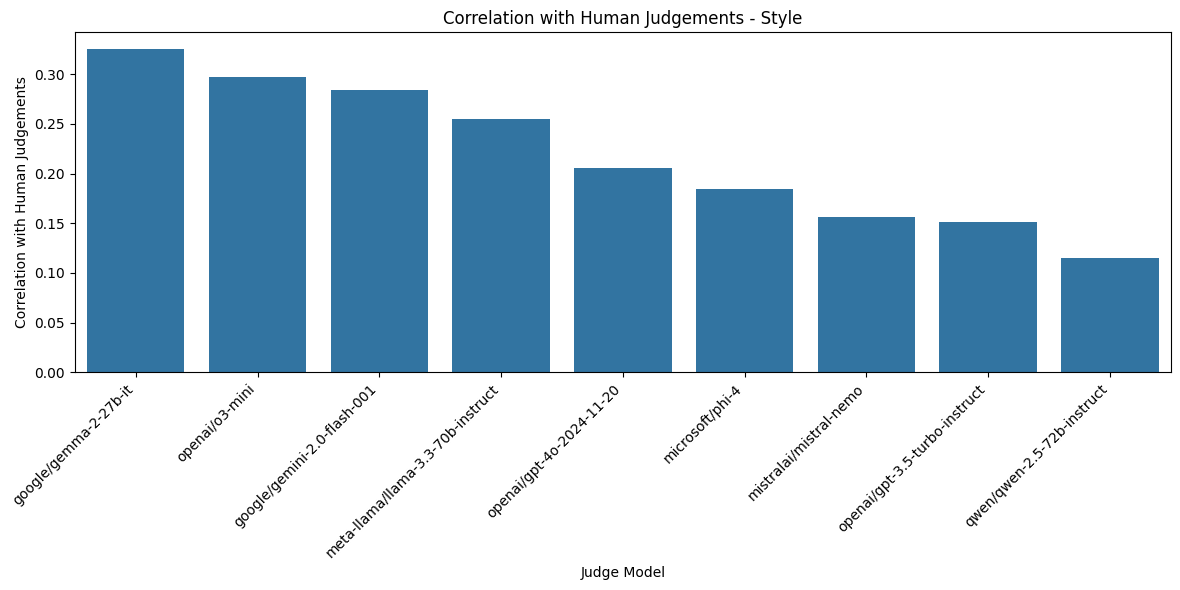


Correlations with Human Judgements for Style:
judge_model
google/gemma-2-27b-it                0.326
openai/o3-mini                       0.298
google/gemini-2.0-flash-001          0.284
meta-llama/llama-3.3-70b-instruct    0.255
openai/gpt-4o-2024-11-20             0.206
microsoft/phi-4                      0.184
mistralai/mistral-nemo               0.156
openai/gpt-3.5-turbo-instruct        0.151
qwen/qwen-2.5-72b-instruct           0.115
Name: human, dtype: float64


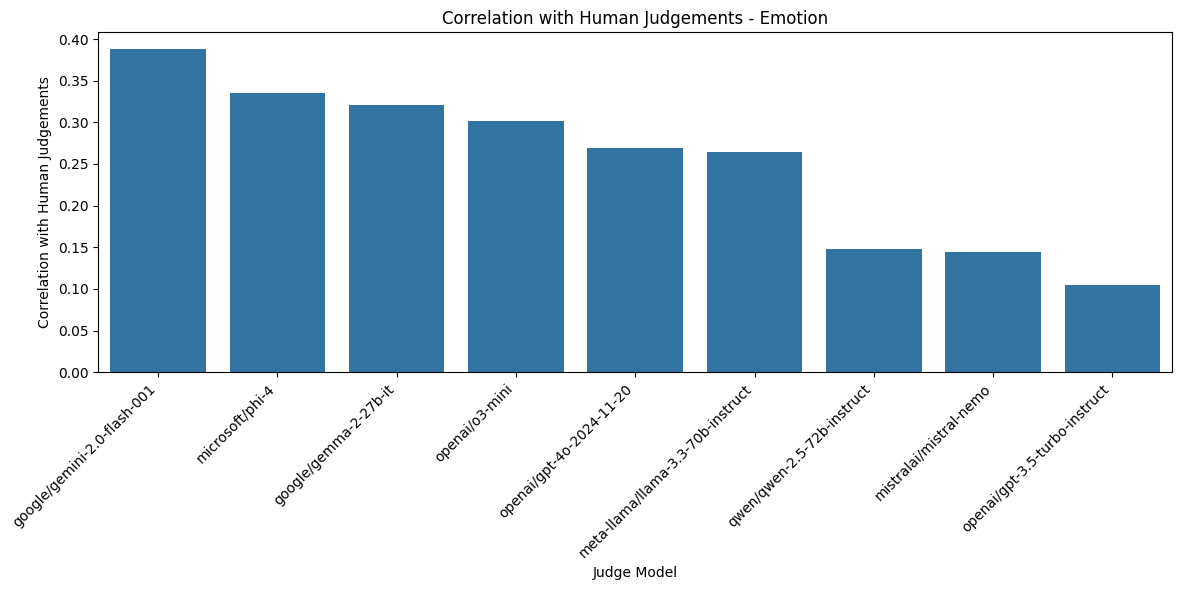


Correlations with Human Judgements for Emotion:
judge_model
google/gemini-2.0-flash-001          0.389
microsoft/phi-4                      0.335
google/gemma-2-27b-it                0.321
openai/o3-mini                       0.302
openai/gpt-4o-2024-11-20             0.269
meta-llama/llama-3.3-70b-instruct    0.265
qwen/qwen-2.5-72b-instruct           0.148
mistralai/mistral-nemo               0.145
openai/gpt-3.5-turbo-instruct        0.104
Name: human, dtype: float64


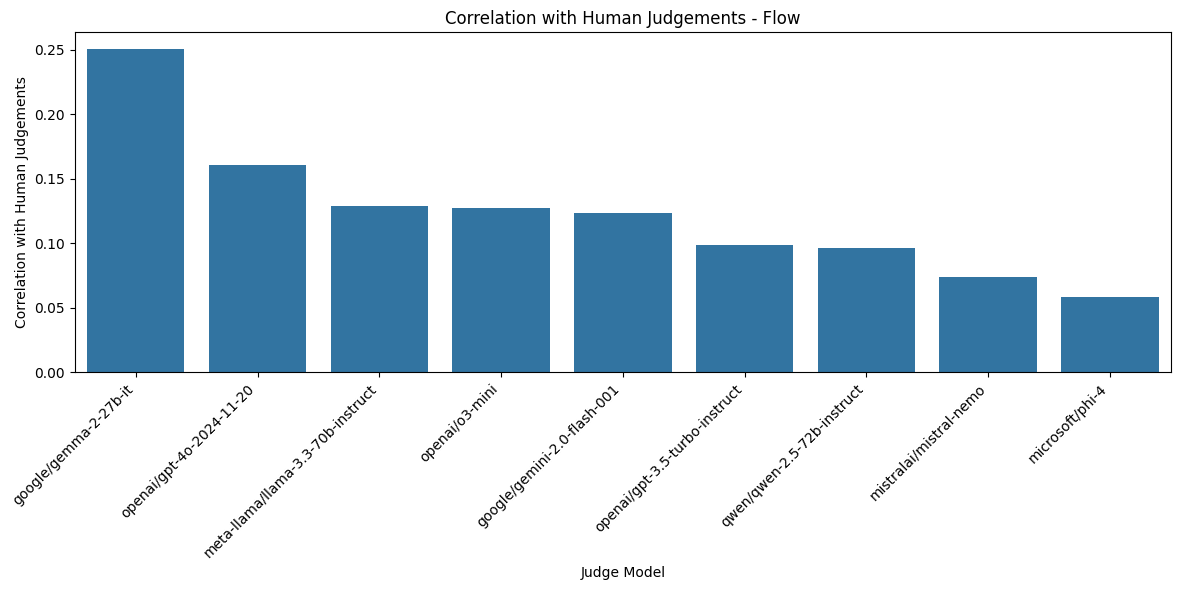


Correlations with Human Judgements for Flow:
judge_model
google/gemma-2-27b-it                0.251
openai/gpt-4o-2024-11-20             0.160
meta-llama/llama-3.3-70b-instruct    0.129
openai/o3-mini                       0.127
google/gemini-2.0-flash-001          0.124
openai/gpt-3.5-turbo-instruct        0.099
qwen/qwen-2.5-72b-instruct           0.096
mistralai/mistral-nemo               0.074
microsoft/phi-4                      0.058
Name: human, dtype: float64


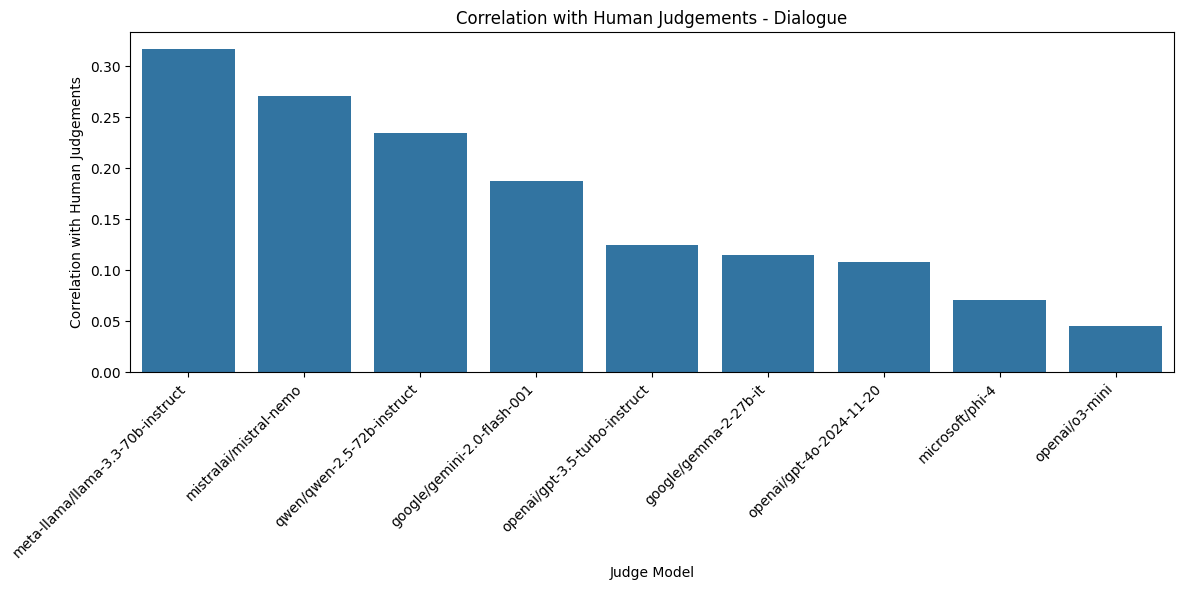


Correlations with Human Judgements for Dialogue:
judge_model
meta-llama/llama-3.3-70b-instruct    0.317
mistralai/mistral-nemo               0.271
qwen/qwen-2.5-72b-instruct           0.235
google/gemini-2.0-flash-001          0.187
openai/gpt-3.5-turbo-instruct        0.125
google/gemma-2-27b-it                0.115
openai/gpt-4o-2024-11-20             0.108
microsoft/phi-4                      0.071
openai/o3-mini                       0.045
Name: human, dtype: float64


In [74]:
# Get correlations between human and model judgements for each criterion
for criterion in cr_combo_filtered_df['criteria'].unique():
    # Filter data for this criterion
    criterion_data = cr_combo_filtered_df[cr_combo_filtered_df['criteria'] == criterion]
    
    # Create pivot table with human and model judgements
    judge_ratings = criterion_data.pivot_table(
        index=['question_id', 'response_id'], 
        columns='judge_model',
        values='judge_rating'
    )
    
    # Calculate correlations with human judgements
    human_correlations = judge_ratings.corr()['human'].sort_values(ascending=False)
    
    # Remove self-correlation
    human_correlations = human_correlations[human_correlations.index != 'human']
    
    # Visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x=human_correlations.index, y=human_correlations.values)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Correlation with Human Judgements - {criterion}')
    plt.xlabel('Judge Model')
    plt.ylabel('Correlation with Human Judgements')
    plt.tight_layout()
    plt.show()
    
    print(f"\nCorrelations with Human Judgements for {criterion}:")
    print(human_correlations.round(3))


Question 15: Which models did humans like the most?

Question 16: Which models did humans like the least?

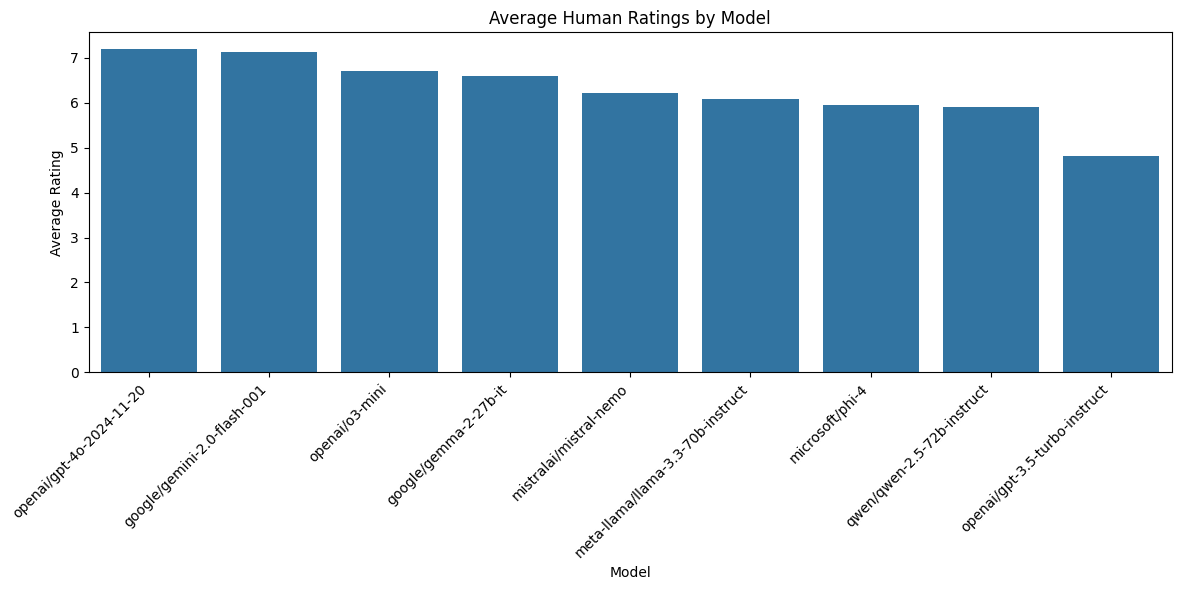


Average Human Ratings by Model:
response_model
openai/gpt-4o-2024-11-20             7.208333
google/gemini-2.0-flash-001          7.133333
openai/o3-mini                       6.713333
google/gemma-2-27b-it                6.586667
mistralai/mistral-nemo               6.220833
meta-llama/llama-3.3-70b-instruct    6.095000
microsoft/phi-4                      5.960833
qwen/qwen-2.5-72b-instruct           5.910000
openai/gpt-3.5-turbo-instruct        4.825833
Name: judge_rating, dtype: float64


In [59]:
# Get average human judgements per model
human_avg_ratings = cr_human_df.groupby('response_model')['judge_rating'].mean().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=human_avg_ratings.index, y=human_avg_ratings.values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Human Ratings by Model')
plt.xlabel('Model')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

# Display the actual values
print("\nAverage Human Ratings by Model:")
print(human_avg_ratings)


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_91456/2539935610.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(data.index, rotation=45, ha='right')
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_91456/2539935610.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(data.index, rotation=45, ha='right')
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_91456/2539935610.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(data.index, rotation=45, ha='right')
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_91456/2539935610.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_

<Figure size 2000x1600 with 0 Axes>

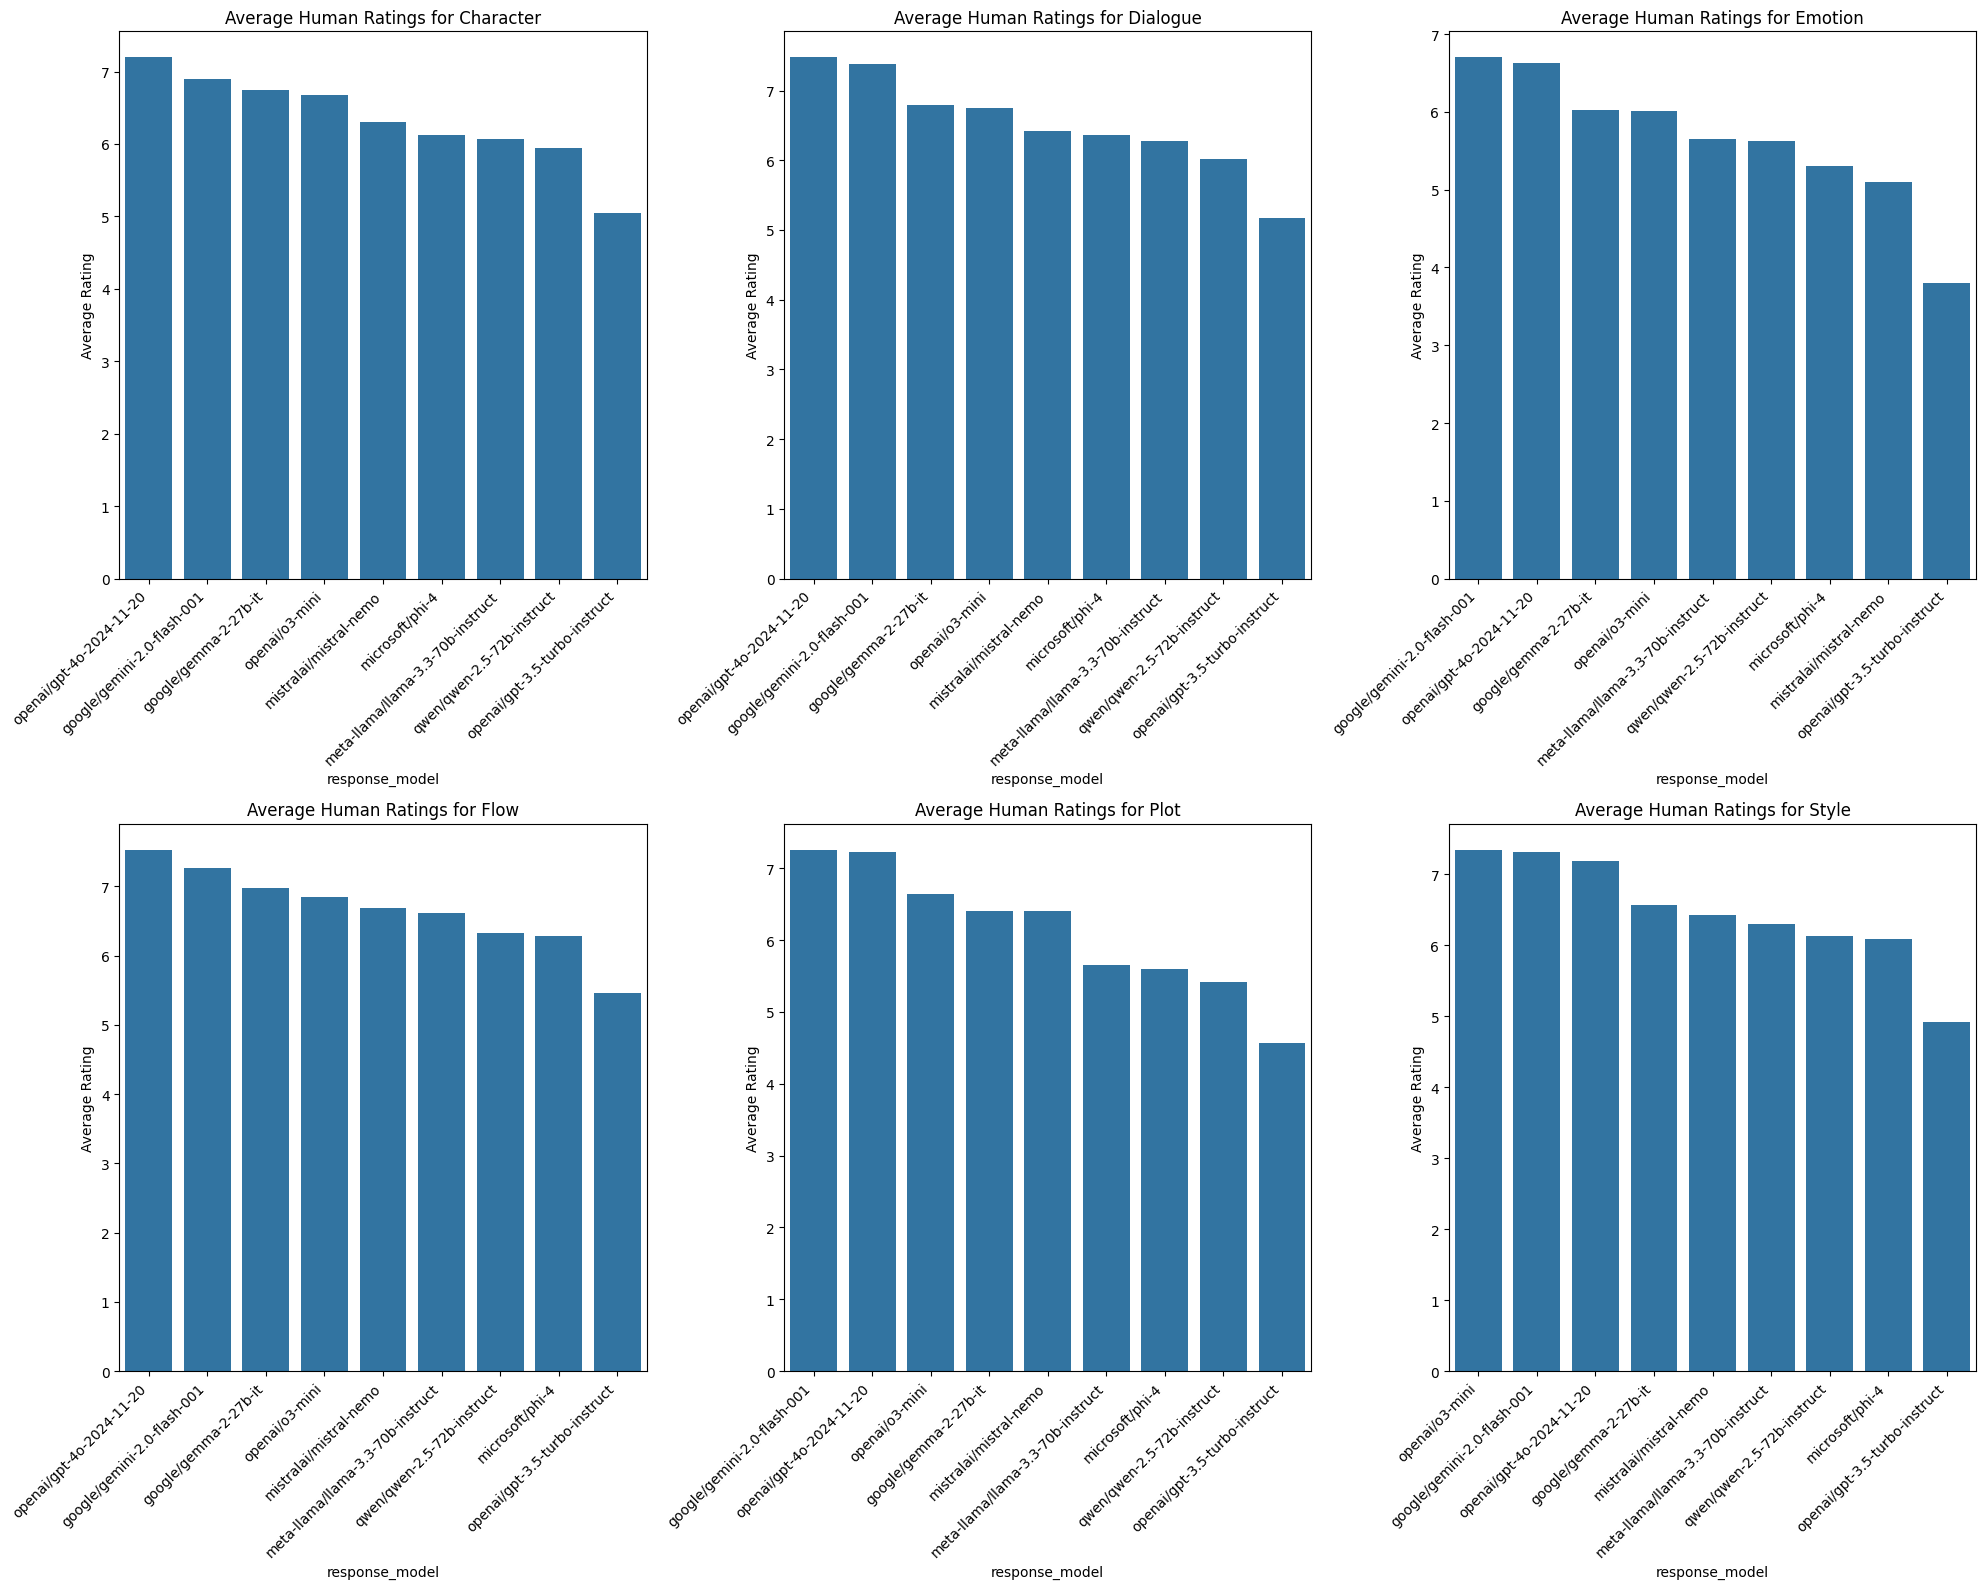


Average Human Ratings by Model and Criteria:
criteria                           Character  Dialogue  Emotion   Flow   Plot  \
response_model                                                                  
google/gemini-2.0-flash-001            6.900     7.375    6.700  7.260  7.255   
google/gemma-2-27b-it                  6.745     6.795    6.025  6.975  6.405   
meta-llama/llama-3.3-70b-instruct      6.065     6.280    5.650  6.620  5.655   
microsoft/phi-4                        6.130     6.365    5.300  6.275  5.600   
mistralai/mistral-nemo                 6.300     6.420    5.100  6.680  6.400   
openai/gpt-3.5-turbo-instruct          5.050     5.170    3.800  5.455  4.565   
openai/gpt-4o-2024-11-20               7.195     7.475    6.630  7.525  7.230   
openai/o3-mini                         6.675     6.755    6.010  6.850  6.645   
qwen/qwen-2.5-72b-instruct             5.950     6.015    5.620  6.330  5.420   

criteria                           Style  
response_model     

In [61]:
# Get average human judgements per model and criteria
human_avg_by_criteria = cr_human_df.groupby(['response_model', 'criteria'])['judge_rating'].mean().unstack()

# Create bar plot with criteria side by side
plt.figure(figsize=(20, 16))

# Create subplots for each criteria
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 16))
axes = axes.flatten()

# Plot each criteria in its own subplot
for i, criteria in enumerate(human_avg_by_criteria.columns):
    data = human_avg_by_criteria[criteria].sort_values(ascending=False)
    sns.barplot(x=data.index, y=data.values, ax=axes[i])
    axes[i].set_title(f'Average Human Ratings for {criteria}')
    axes[i].set_xticklabels(data.index, rotation=45, ha='right')
    axes[i].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()

# Display the actual values
print("\nAverage Human Ratings by Model and Criteria:")
print(human_avg_by_criteria.round(3))


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_91456/3980230835.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annotator_ratings = cr_human_df.groupby(['response_model', 'annotator_group'])['judge_rating'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

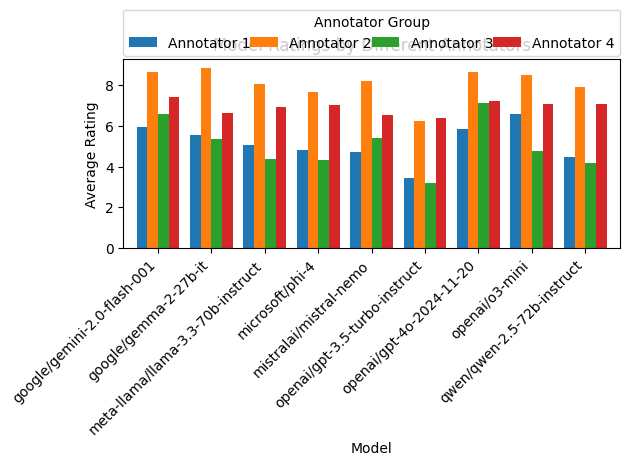


Variability in Ratings Between Annotators (Standard Deviation):
response_model
qwen/qwen-2.5-72b-instruct           1.855
openai/gpt-3.5-turbo-instruct        1.738
meta-llama/llama-3.3-70b-instruct    1.671
microsoft/phi-4                      1.614
google/gemma-2-27b-it                1.587
openai/o3-mini                       1.541
mistralai/mistral-nemo               1.514
google/gemini-2.0-flash-001          1.157
openai/gpt-4o-2024-11-20             1.124
dtype: float64


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_91456/3980230835.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  criteria_ratings = criteria_data.groupby(['response_model', 'annotator_group'])['judge_rating'].mean().unstack()
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_91456/3980230835.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  criteria_ratings = criteria_data.groupby(['response_model', 'annotator_group'])['judge_rating'].mean().unstack()
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_91456/3980230835.py:39: FutureWarning: The default of observed=False is d

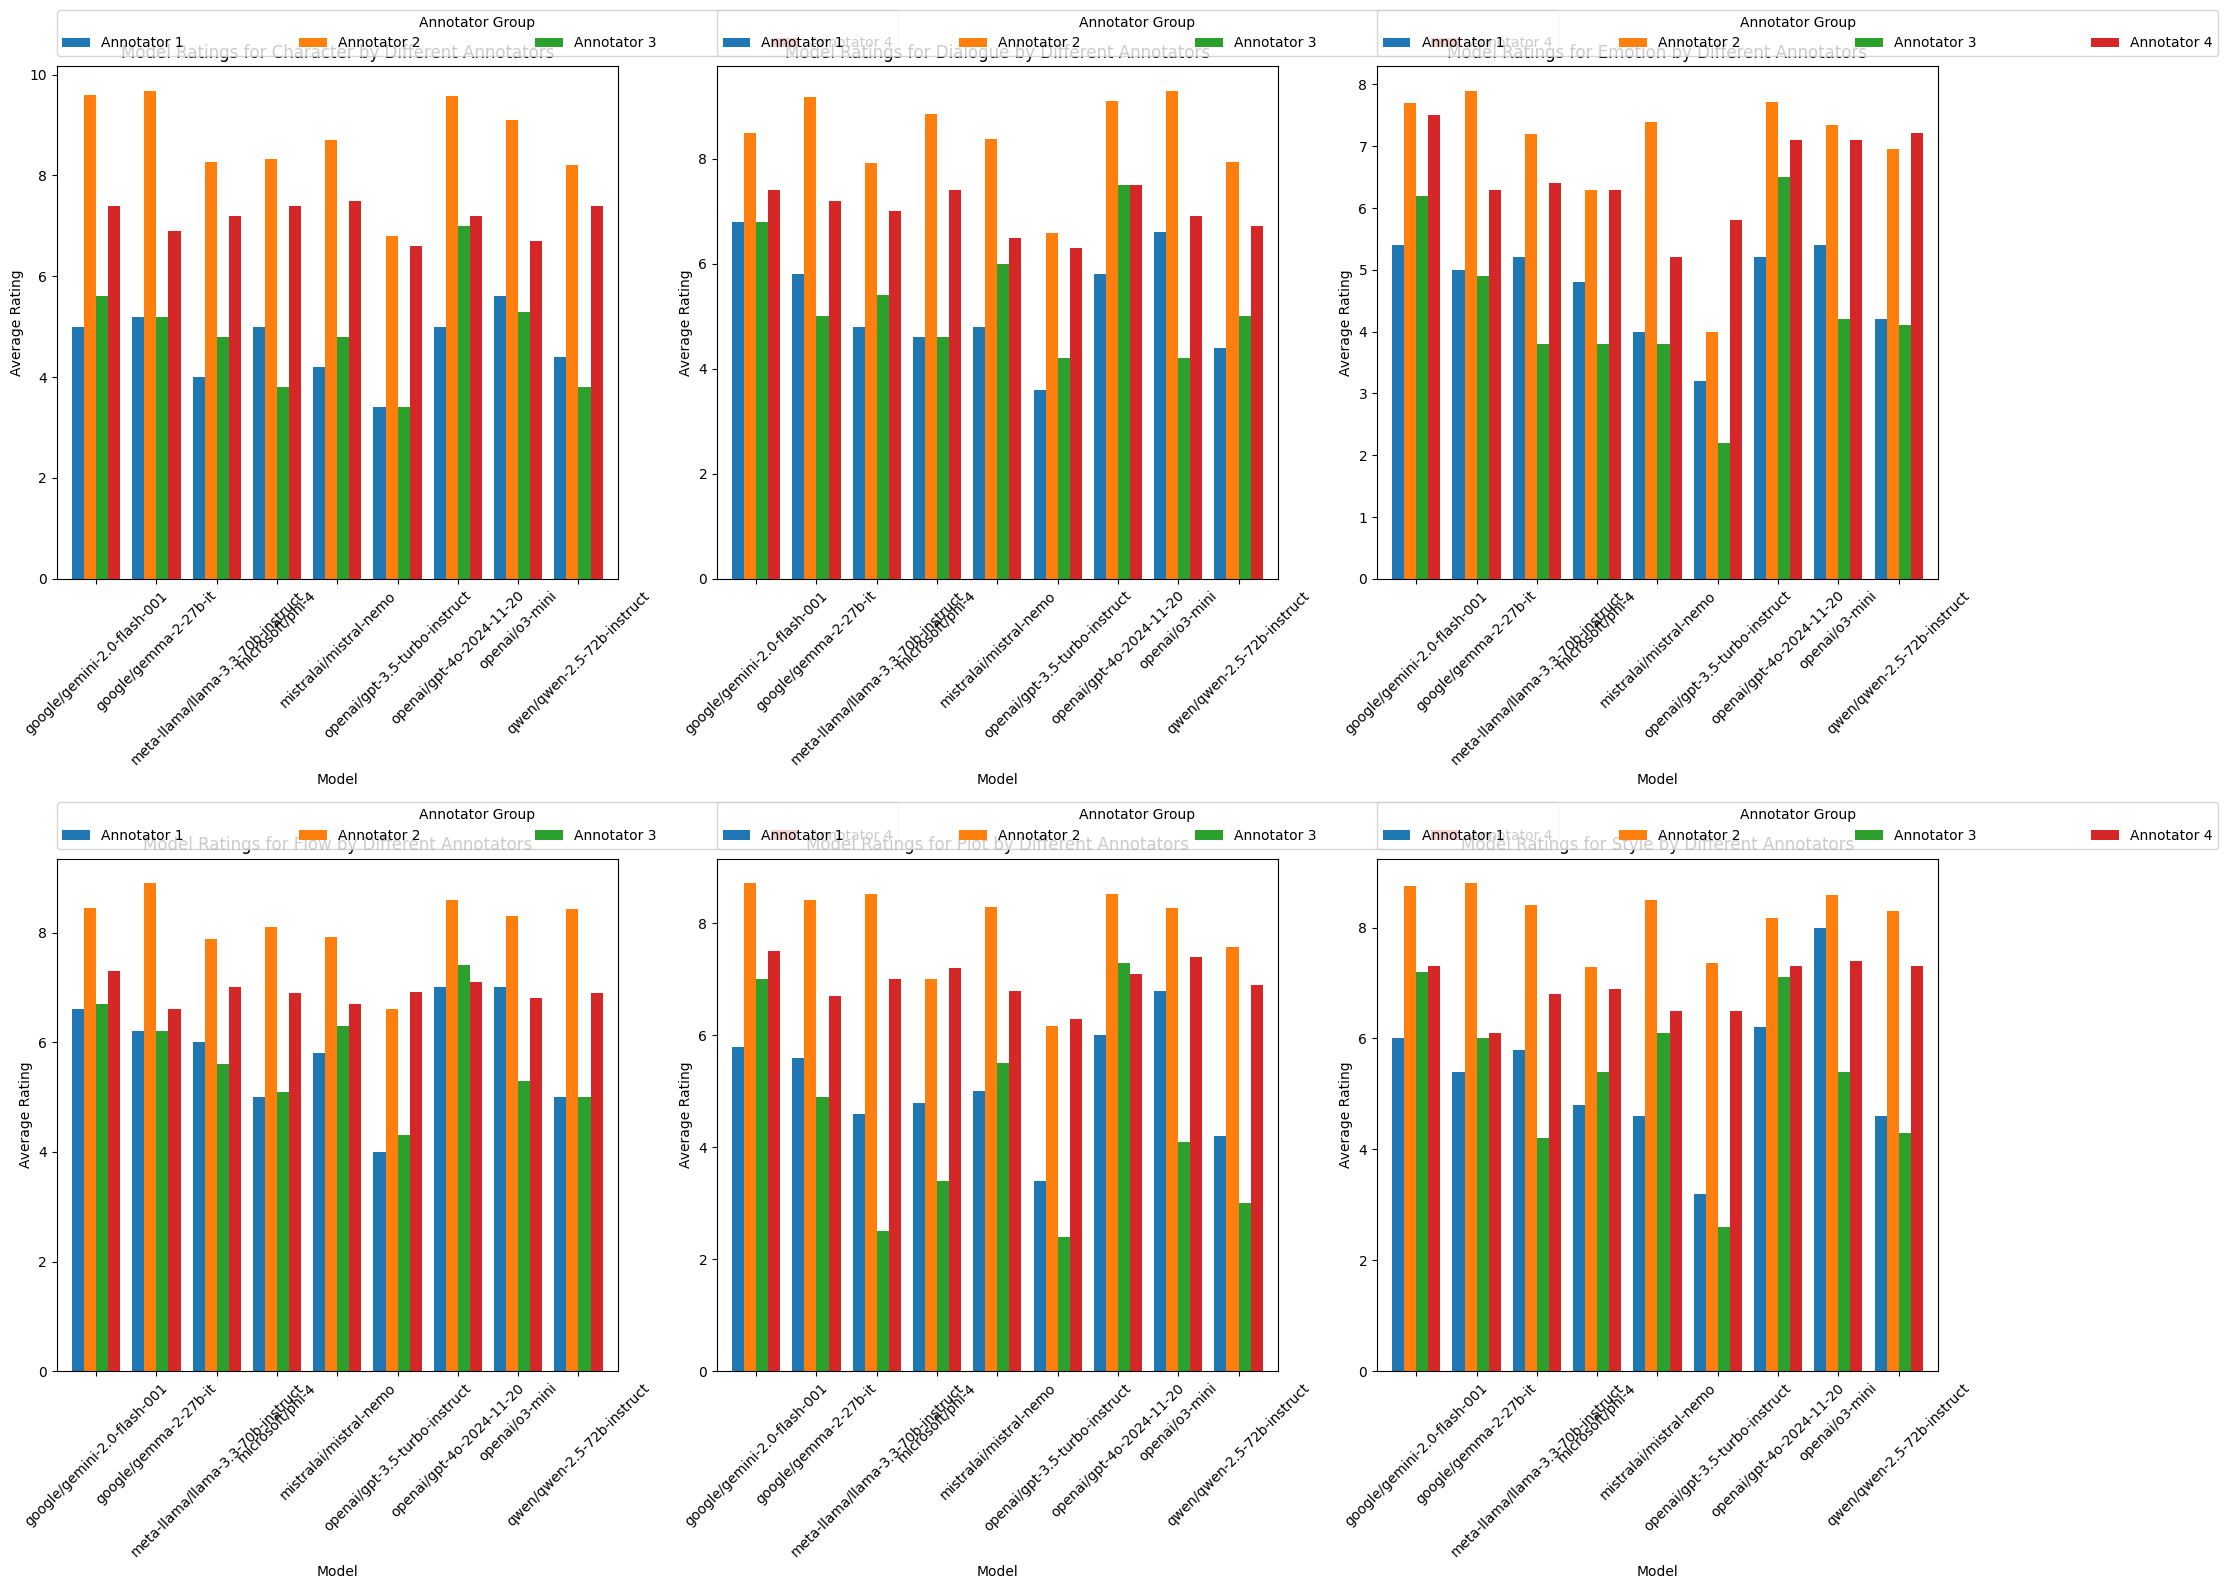


Overall Average Rating by Annotator:
annotator_group
Annotator 1    5.163
Annotator 2    8.061
Annotator 3    5.041
Annotator 4    6.914
Name: judge_rating, dtype: float64


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_91456/3980230835.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(cr_human_df.groupby('annotator_group')['judge_rating'].mean().round(3))


In [ ]:
# Group questions by annotator blocks (0-4, 5-9, 10-14, 15-19)
cr_human_df['annotator_group'] = pd.cut(cr_human_df['question_id'], 
                                       bins=[-1, 4, 9, 14, 19], 
                                       labels=['Annotator 1', 'Annotator 2', 'Annotator 3', 'Annotator 4'])

# Calculate average ratings per model per annotator
annotator_ratings = cr_human_df.groupby(['response_model', 'annotator_group'])['judge_rating'].mean().unstack()

# Create bar plot with annotators side by side
plt.figure(figsize=(12, 6))
annotator_ratings.plot(kind='bar', width=0.8)
plt.title('Model Ratings by Different Annotators')
plt.xlabel('Model')
plt.ylabel('Average Rating')
plt.legend(title='Annotator Group', bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
          ncol=4, mode="expand", borderaxespad=0.)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate the standard deviation of ratings between annotators for each model
# This helps identify which models had the most disagreement between annotators
annotator_std = annotator_ratings.std(axis=1).sort_values(ascending=False)

print("\nVariability in Ratings Between Annotators (Standard Deviation):")
print(annotator_std.round(3))

# Create a grid of bar plots showing how different annotators rated each model on each criteria
# This visualization helps identify:
# 1. If certain annotators were consistently more harsh/lenient
# 2. If there was more agreement on certain criteria
# 3. Which models had the most consistent/inconsistent ratings across annotators
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 16))
axes = axes.flatten()

for i, criteria in enumerate(cr_human_df['criteria'].unique()):
    # For each criteria, calculate the average rating given by each annotator for each model
    criteria_data = cr_human_df[cr_human_df['criteria'] == criteria]
    criteria_ratings = criteria_data.groupby(['response_model', 'annotator_group'])['judge_rating'].mean().unstack()
    
    # Create grouped bar plot where each group is a model and bars represent different annotators
    criteria_ratings.plot(kind='bar', ax=axes[i], width=0.8)
    axes[i].set_title(f'Model Ratings for {criteria} by Different Annotators')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel('Average Rating')
    axes[i].legend(title='Annotator Group', bbox_to_anchor=(0.3, 1.02, 1., .102), loc='lower left',
                  ncol=4, mode="expand", borderaxespad=0.)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate the overall average rating given by each annotator
# This helps identify if any annotators were consistently more harsh or lenient in their ratings
print("\nOverall Average Rating by Annotator:")
print(cr_human_df.groupby('annotator_group')['judge_rating'].mean().round(3))



Average Rating by Annotator for Each Criteria:

Character:
annotator_group
Annotator 1    4.644
Annotator 2    8.693
Annotator 3    4.856
Annotator 4    7.144
Name: judge_rating, dtype: float64

Dialogue:
annotator_group
Annotator 1    5.244
Annotator 2    8.418
Annotator 3    5.411
Annotator 4    6.993
Name: judge_rating, dtype: float64

Emotion:
annotator_group
Annotator 1    4.711
Annotator 2    6.947
Annotator 3    4.389
Annotator 4    6.547
Name: judge_rating, dtype: float64

Flow:
annotator_group
Annotator 1    5.844
Annotator 2    8.129
Annotator 3    5.767
Annotator 4    6.913
Name: judge_rating, dtype: float64

Plot:
annotator_group
Annotator 1    5.133
Annotator 2    7.944
Annotator 3    4.456
Annotator 4    6.989
Name: judge_rating, dtype: float64

Style:
annotator_group
Annotator 1    5.400
Annotator 2    8.238
Annotator 3    5.367
Annotator 4    6.900
Name: judge_rating, dtype: float64


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_91456/303603390.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(criteria_data.groupby('annotator_group')['judge_rating'].mean().round(3))


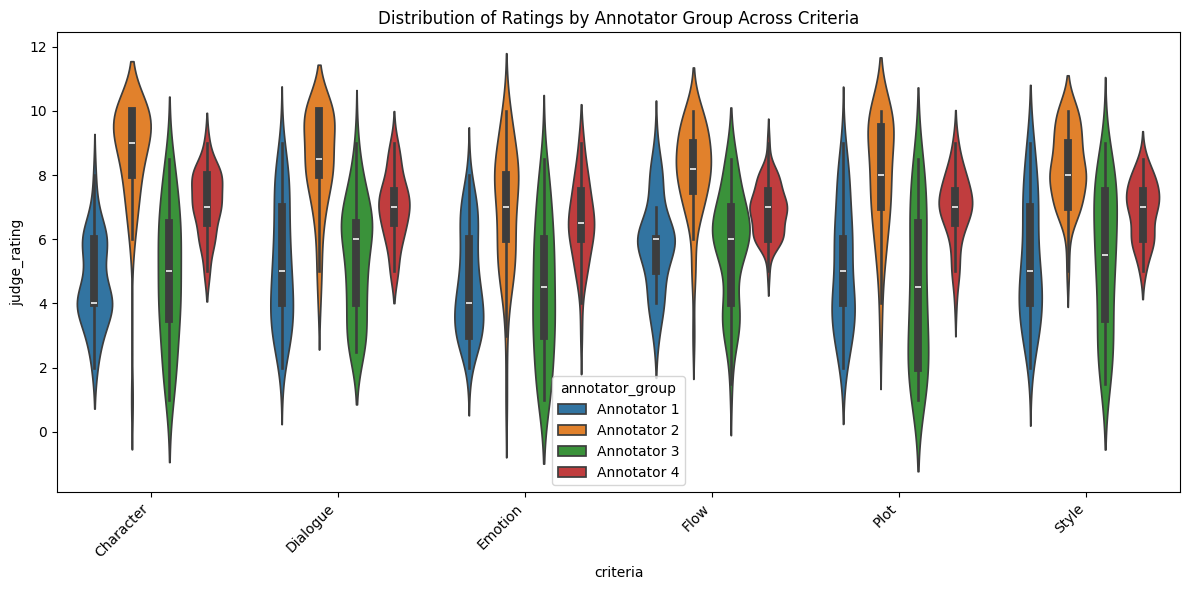

/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_91456/303603390.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  avg_ratings = cr_human_df.pivot_table(


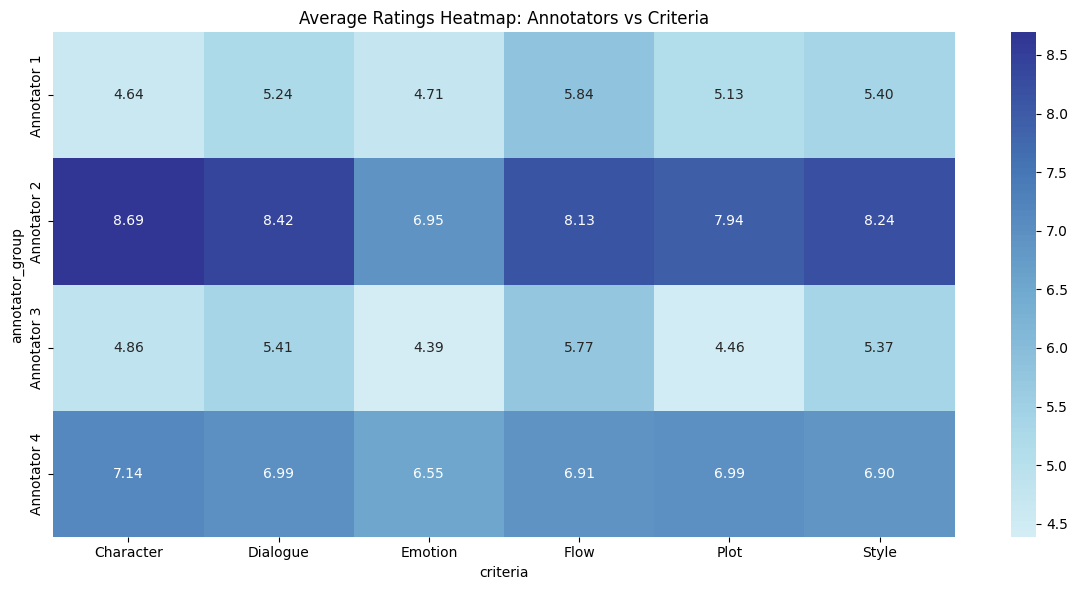

In [73]:
# Calculate average rating by annotator for each criteria
print("\nAverage Rating by Annotator for Each Criteria:")
for criteria in cr_human_df['criteria'].unique():
    print(f"\n{criteria}:")
    criteria_data = cr_human_df[cr_human_df['criteria'] == criteria]
    print(criteria_data.groupby('annotator_group')['judge_rating'].mean().round(3))

# Create a violin plot showing the distribution of ratings by annotator for each criteria
plt.figure(figsize=(12, 6))
sns.violinplot(data=cr_human_df, x='criteria', y='judge_rating', hue='annotator_group')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Ratings by Annotator Group Across Criteria')
plt.tight_layout()
plt.show()

# Create a heatmap showing average ratings by annotator and criteria
avg_ratings = cr_human_df.pivot_table(
    values='judge_rating', 
    index='annotator_group',
    columns='criteria',
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(avg_ratings, annot=True, fmt='.2f', cmap='RdYlBu', center=3)
plt.title('Average Ratings Heatmap: Annotators vs Criteria')
plt.tight_layout()
plt.show()


In [66]:
# Calculate the overall average rating given by each annotator for LM judges
print("\nOverall Average Rating by LM Judge:")
print(cr_lm_df.groupby('judge_model')['judge_rating'].mean().round(3))



Overall Average Rating by LM Judge:
judge_model
google/gemini-2.0-flash-001          7.725
google/gemma-2-27b-it                7.464
meta-llama/llama-3.3-70b-instruct    8.228
microsoft/phi-4                      8.586
mistralai/mistral-nemo               8.442
openai/gpt-3.5-turbo-instruct        9.239
openai/gpt-4o-2024-11-20             8.496
openai/o3-mini                       8.216
qwen/qwen-2.5-72b-instruct           8.633
Name: judge_rating, dtype: float64


Question ???: Comparing how models rated themselves versus how other models rated them


Comparison of Self Ratings vs Ratings by Others:
                                   Self Rating  Rating by Others  Difference
response_model                                                              
google/gemini-2.0-flash-001              8.523             8.735      -0.212
google/gemma-2-27b-it                    7.907             8.610      -0.703
meta-llama/llama-3.3-70b-instruct        8.128             8.187      -0.059
microsoft/phi-4                          8.570             8.197       0.373
mistralai/mistral-nemo                   8.437             8.311       0.126
openai/gpt-3.5-turbo-instruct            9.112             7.348       1.764
openai/gpt-4o-2024-11-20                 9.000             8.587       0.413
openai/o3-mini                           8.593             8.647      -0.054
qwen/qwen-2.5-72b-instruct               8.617             8.175       0.442


<Figure size 1200x600 with 0 Axes>

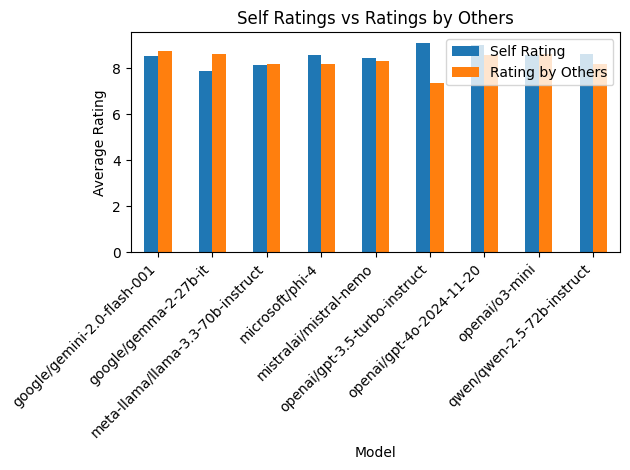

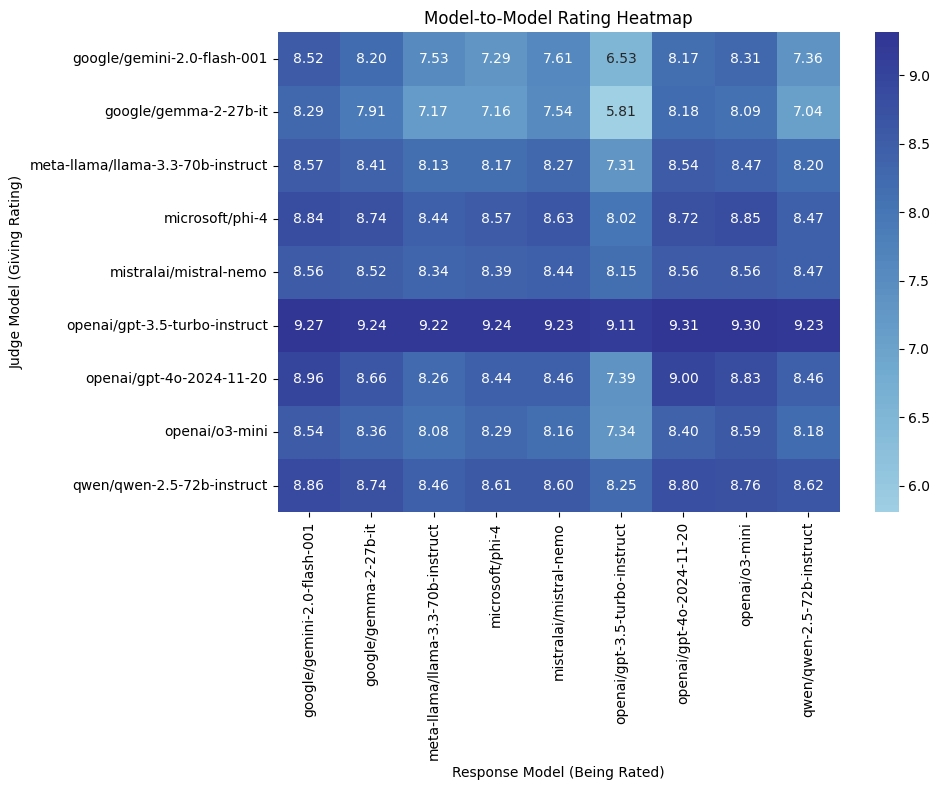

In [75]:
# Create a dataframe for self-ratings (where judge_model == response_model)
self_ratings = cr_lm_df[cr_lm_df['judge_model'] == cr_lm_df['response_model']]
self_avg = self_ratings.groupby('response_model')['judge_rating'].mean()

# Create a dataframe for ratings from other models
other_ratings = cr_lm_df[cr_lm_df['judge_model'] != cr_lm_df['response_model']] 
other_avg = other_ratings.groupby('response_model')['judge_rating'].mean()

# Combine into a comparison dataframe
comparison_df = pd.DataFrame({
    'Self Rating': self_avg,
    'Rating by Others': other_avg
})
comparison_df['Difference'] = comparison_df['Self Rating'] - comparison_df['Rating by Others']

print("\nComparison of Self Ratings vs Ratings by Others:")
print(comparison_df.round(3))

# Visualize the comparison
plt.figure(figsize=(12, 6))
comparison_df[['Self Rating', 'Rating by Others']].plot(kind='bar')
plt.title('Self Ratings vs Ratings by Others')
plt.xlabel('Model')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Create a heatmap showing all model-to-model ratings
model_ratings = cr_lm_df.pivot_table(
    values='judge_rating',
    index='judge_model',
    columns='response_model',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(model_ratings, annot=True, fmt='.2f', cmap='RdYlBu', center=3)
plt.title('Model-to-Model Rating Heatmap')
plt.xlabel('Response Model (Being Rated)')
plt.ylabel('Judge Model (Giving Rating)')
plt.tight_layout()
plt.show()


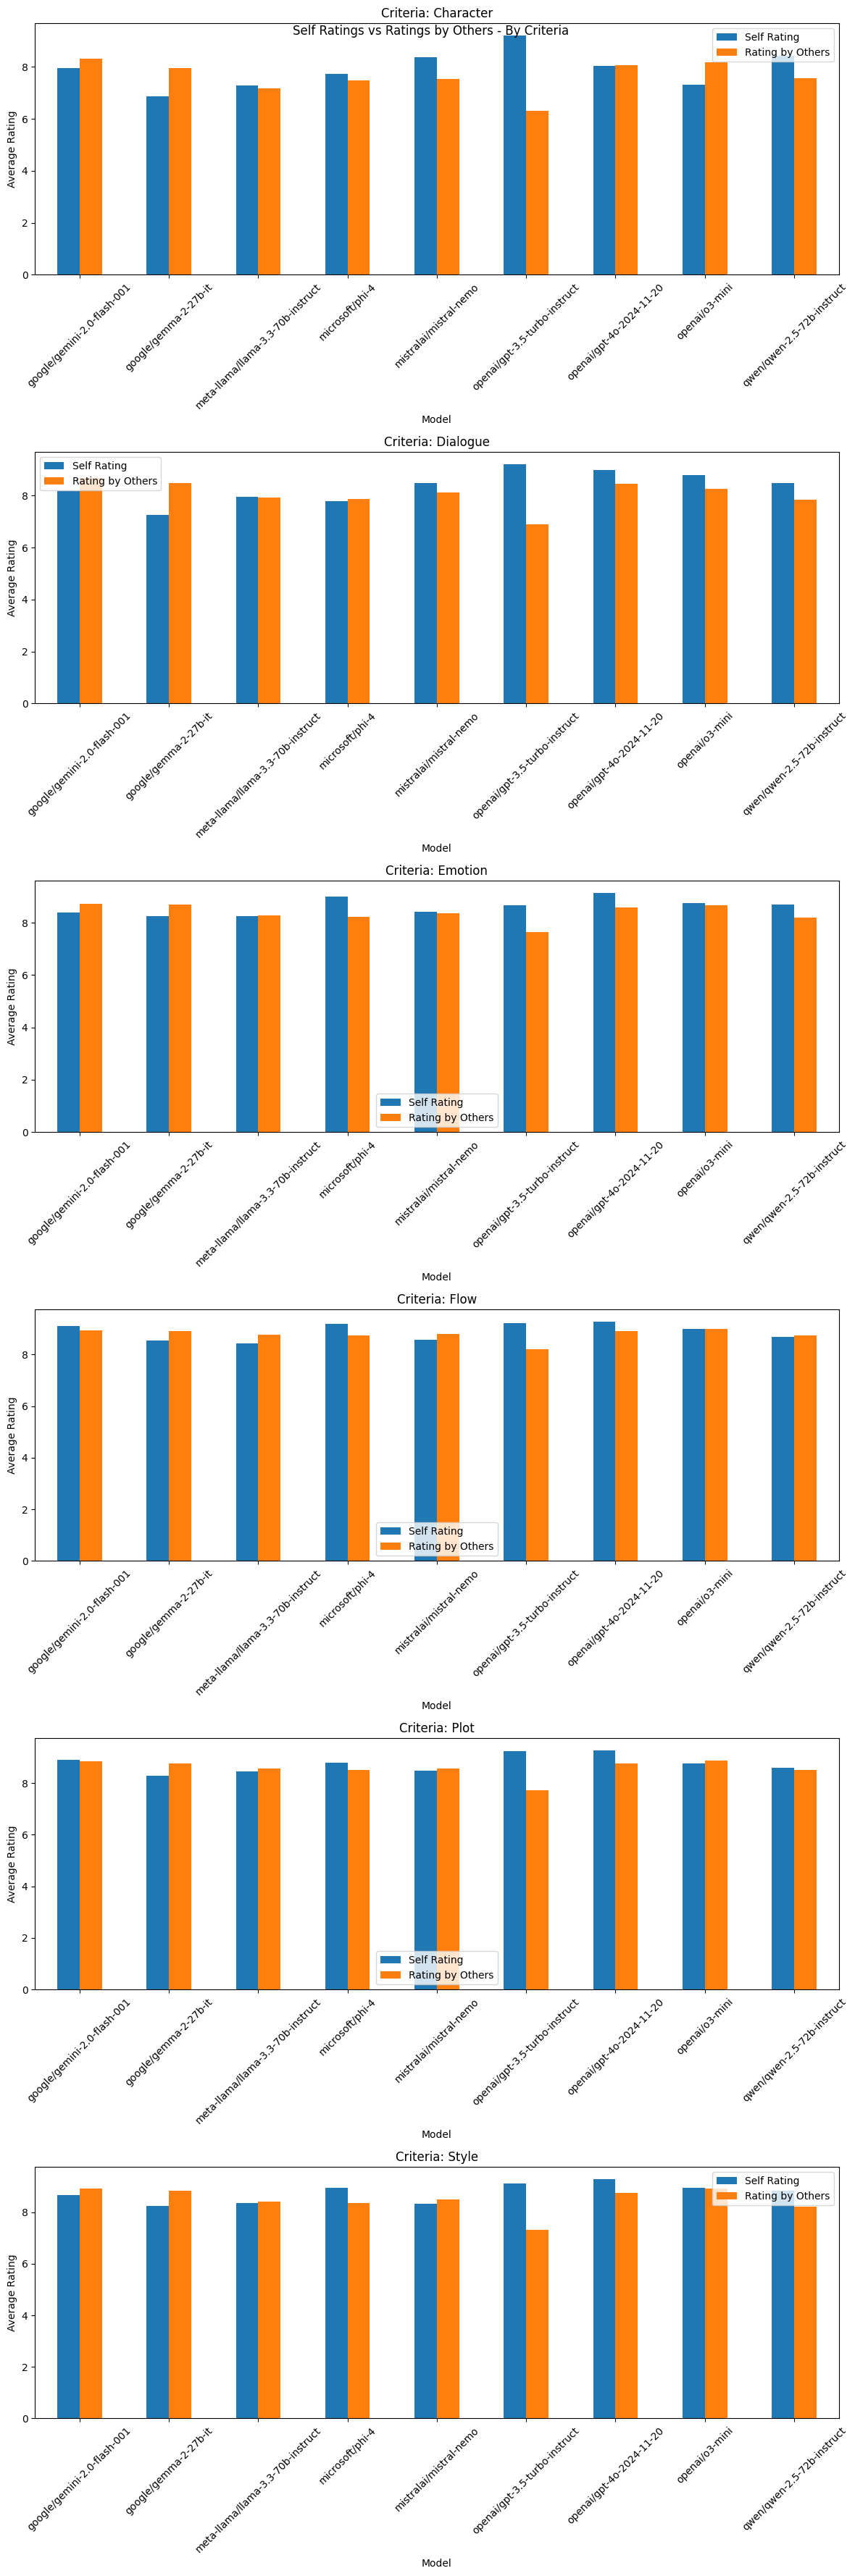


Detailed Comparison by Criteria:

Criteria: Character
                                   Self Rating  Rating by Others   Criteria  \
response_model                                                                
google/gemini-2.0-flash-001              7.940             8.324  Character   
google/gemma-2-27b-it                    6.860             7.961  Character   
meta-llama/llama-3.3-70b-instruct        7.290             7.183  Character   
microsoft/phi-4                          7.730             7.469  Character   
mistralai/mistral-nemo                   8.380             7.532  Character   
openai/gpt-3.5-turbo-instruct            9.210             6.312  Character   
openai/gpt-4o-2024-11-20                 8.044             8.062  Character   
openai/o3-mini                           7.300             8.170  Character   
qwen/qwen-2.5-72b-instruct               8.420             7.550  Character   

                                   Difference  
response_model             

In [76]:
# Create comparison by criteria
criteria_comparisons = []

for criteria_name in cr_lm_df['criteria'].unique():
    # Filter for this criteria
    criteria_data = cr_lm_df[cr_lm_df['criteria'] == criteria_name]
    
    # Get self ratings
    self_ratings = criteria_data[criteria_data['judge_model'] == criteria_data['response_model']]
    self_avg = self_ratings.groupby('response_model')['judge_rating'].mean()
    
    # Get ratings from others
    other_ratings = criteria_data[criteria_data['judge_model'] != criteria_data['response_model']]
    other_avg = other_ratings.groupby('response_model')['judge_rating'].mean()
    
    # Combine into comparison df
    comparison = pd.DataFrame({
        'Self Rating': self_avg,
        'Rating by Others': other_avg,
        'Criteria': criteria_name
    })
    comparison['Difference'] = comparison['Self Rating'] - comparison['Rating by Others']
    
    criteria_comparisons.append(comparison)

# Combine all criteria comparisons
all_criteria_comparisons = pd.concat(criteria_comparisons)

# Create subplot for each criteria
criteria_count = len(cr_lm_df['criteria'].unique())
fig, axes = plt.subplots(criteria_count, 1, figsize=(12, 6*criteria_count))
fig.suptitle('Self Ratings vs Ratings by Others - By Criteria')

for i, (criteria_name, data) in enumerate(all_criteria_comparisons.groupby('Criteria')):
    data[['Self Rating', 'Rating by Others']].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Criteria: {criteria_name}')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel('Average Rating')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print detailed comparison for each criteria
print("\nDetailed Comparison by Criteria:")
for criteria_name, data in all_criteria_comparisons.groupby('Criteria'):
    print(f"\nCriteria: {criteria_name}")
    print(data.round(3))


Let's look at the judgement reasoning that different models are doing

In [78]:
cr_lm_df.columns

Index(['question_id', 'question', 'response_id', 'response_model', 'response',
       'judgement_id', 'judge_model', 'judgement_criteria_id', 'criteria',
       'judge_reasoning', 'judge_rating'],
      dtype='object')


Overall correlation between reasoning length and rating: 0.09

Correlation by judge model:
judge_model
google/gemini-2.0-flash-001          0.036
google/gemma-2-27b-it                0.339
meta-llama/llama-3.3-70b-instruct    0.101
microsoft/phi-4                      0.046
mistralai/mistral-nemo               0.119
openai/gpt-3.5-turbo-instruct       -0.369
openai/gpt-4o-2024-11-20             0.105
openai/o3-mini                      -0.187
qwen/qwen-2.5-72b-instruct           0.078
dtype: float64


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_91456/2423456745.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  judge_corrs = cr_lm_df.groupby('judge_model').apply(


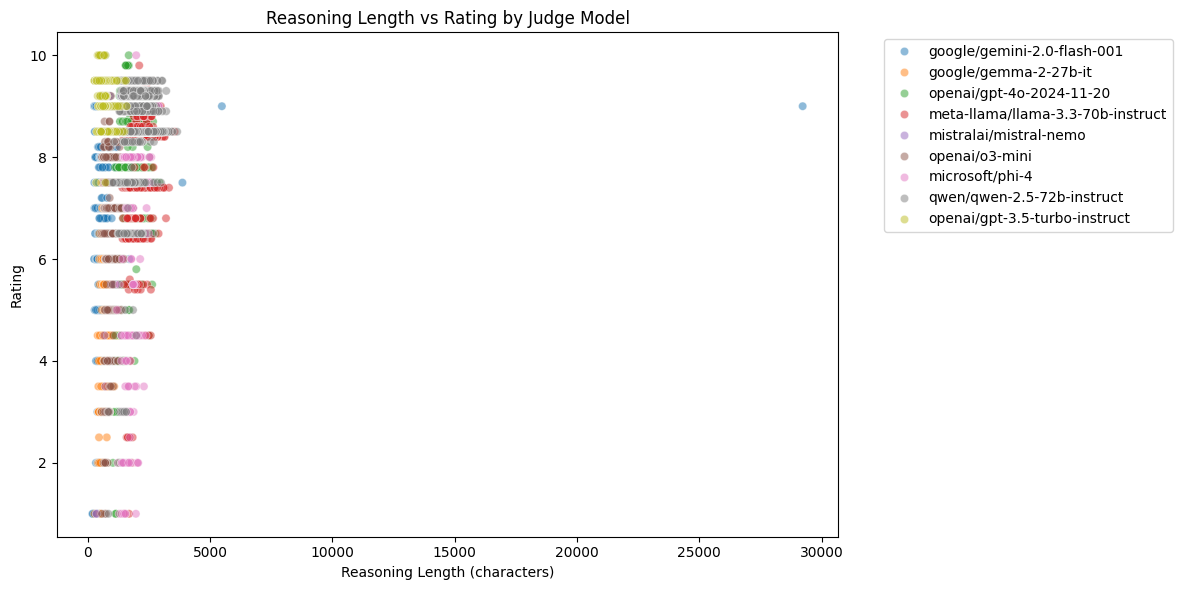

In [79]:
# Calculate correlation between reasoning length and rating
cr_lm_df['reasoning_length'] = cr_lm_df['judge_reasoning'].str.len()

# Overall correlation
overall_corr = cr_lm_df['reasoning_length'].corr(cr_lm_df['judge_rating'])
print("\nOverall correlation between reasoning length and rating:", round(overall_corr, 3))

# Per-judge correlation
judge_corrs = cr_lm_df.groupby('judge_model').apply(
    lambda x: x['reasoning_length'].corr(x['judge_rating'])
).round(3)

print("\nCorrelation by judge model:")
print(judge_corrs)

# Visualize with scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cr_lm_df, x='reasoning_length', y='judge_rating', hue='judge_model', alpha=0.5)
plt.title('Reasoning Length vs Rating by Judge Model')
plt.xlabel('Reasoning Length (characters)')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# TODO: How does length of reasoning correlate with rating?
# TODO: How does length of generation correlation with ranking?


Overall correlation between response length and rating: 0.105

Correlation by judge model:
judge_model
google/gemini-2.0-flash-001          0.043
google/gemma-2-27b-it                0.181
meta-llama/llama-3.3-70b-instruct    0.173
microsoft/phi-4                      0.059
mistralai/mistral-nemo               0.147
openai/gpt-3.5-turbo-instruct        0.097
openai/gpt-4o-2024-11-20             0.185
openai/o3-mini                       0.134
qwen/qwen-2.5-72b-instruct           0.094
dtype: float64


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99570/3141436839.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  judge_corrs = cr_lm_df.groupby('judge_model').apply(


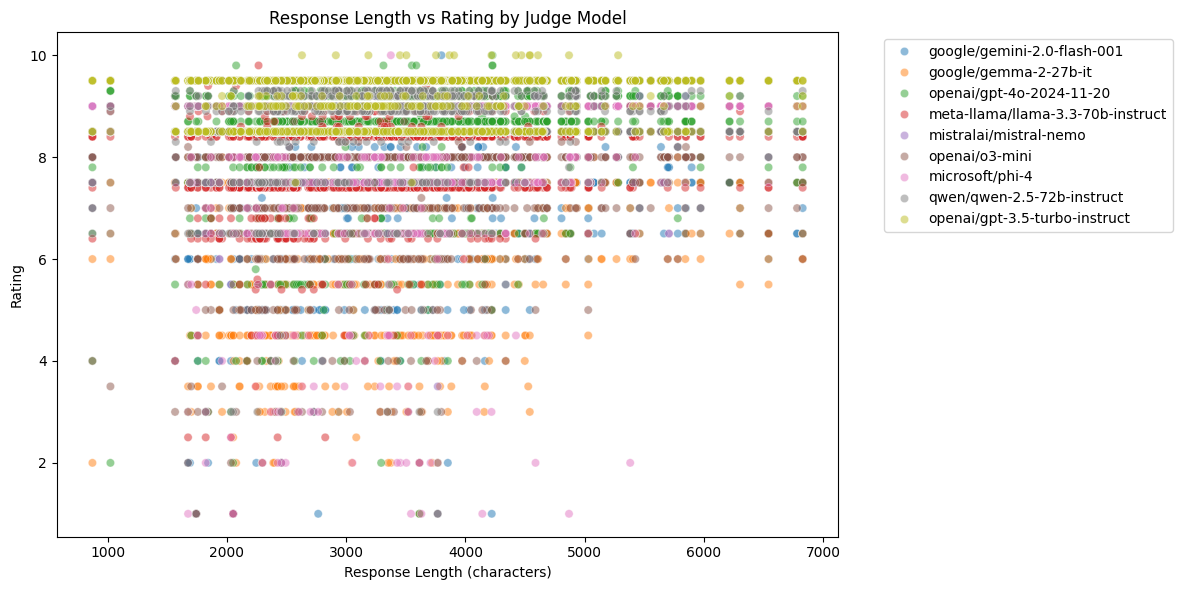

In [8]:
# Calculate response lengths
cr_lm_df['response_length'] = cr_lm_df['response'].str.len()

# Overall correlation between response length and rating
overall_corr = cr_lm_df['response_length'].corr(cr_lm_df['judge_rating'])
print("\nOverall correlation between response length and rating:", round(overall_corr, 3))

# Calculate correlation by judge model
judge_corrs = cr_lm_df.groupby('judge_model').apply(
    lambda x: x['response_length'].corr(x['judge_rating'])
).round(3)

print("\nCorrelation by judge model:")
print(judge_corrs)

# Visualize with scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cr_lm_df, x='response_length', y='judge_rating', hue='judge_model', alpha=0.5)
plt.title('Response Length vs Rating by Judge Model')
plt.xlabel('Response Length (characters)')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99570/410641950.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  judge_corrs = criteria_data.groupby('judge_model').apply(
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99570/410641950.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  judge_corrs = criteria_data.groupby('judge_model').apply(
/var/folders/4d/c4bjvqc12m5gv209fjx295


=== Plot ===
Overall correlation: 0.139

By judge model:
judge_model
google/gemini-2.0-flash-001          0.100
google/gemma-2-27b-it                0.249
meta-llama/llama-3.3-70b-instruct    0.199
microsoft/phi-4                      0.029
mistralai/mistral-nemo               0.143
openai/gpt-3.5-turbo-instruct        0.248
openai/gpt-4o-2024-11-20             0.332
openai/o3-mini                       0.284
qwen/qwen-2.5-72b-instruct          -0.072
dtype: float64

=== Character ===
Overall correlation: 0.184

By judge model:
judge_model
google/gemini-2.0-flash-001          0.184
google/gemma-2-27b-it                0.198
meta-llama/llama-3.3-70b-instruct    0.275
microsoft/phi-4                      0.213
mistralai/mistral-nemo               0.225
openai/gpt-3.5-turbo-instruct        0.181
openai/gpt-4o-2024-11-20             0.316
openai/o3-mini                       0.263
qwen/qwen-2.5-72b-instruct           0.228
dtype: float64

=== Style ===
Overall correlation: 0.092

By judge

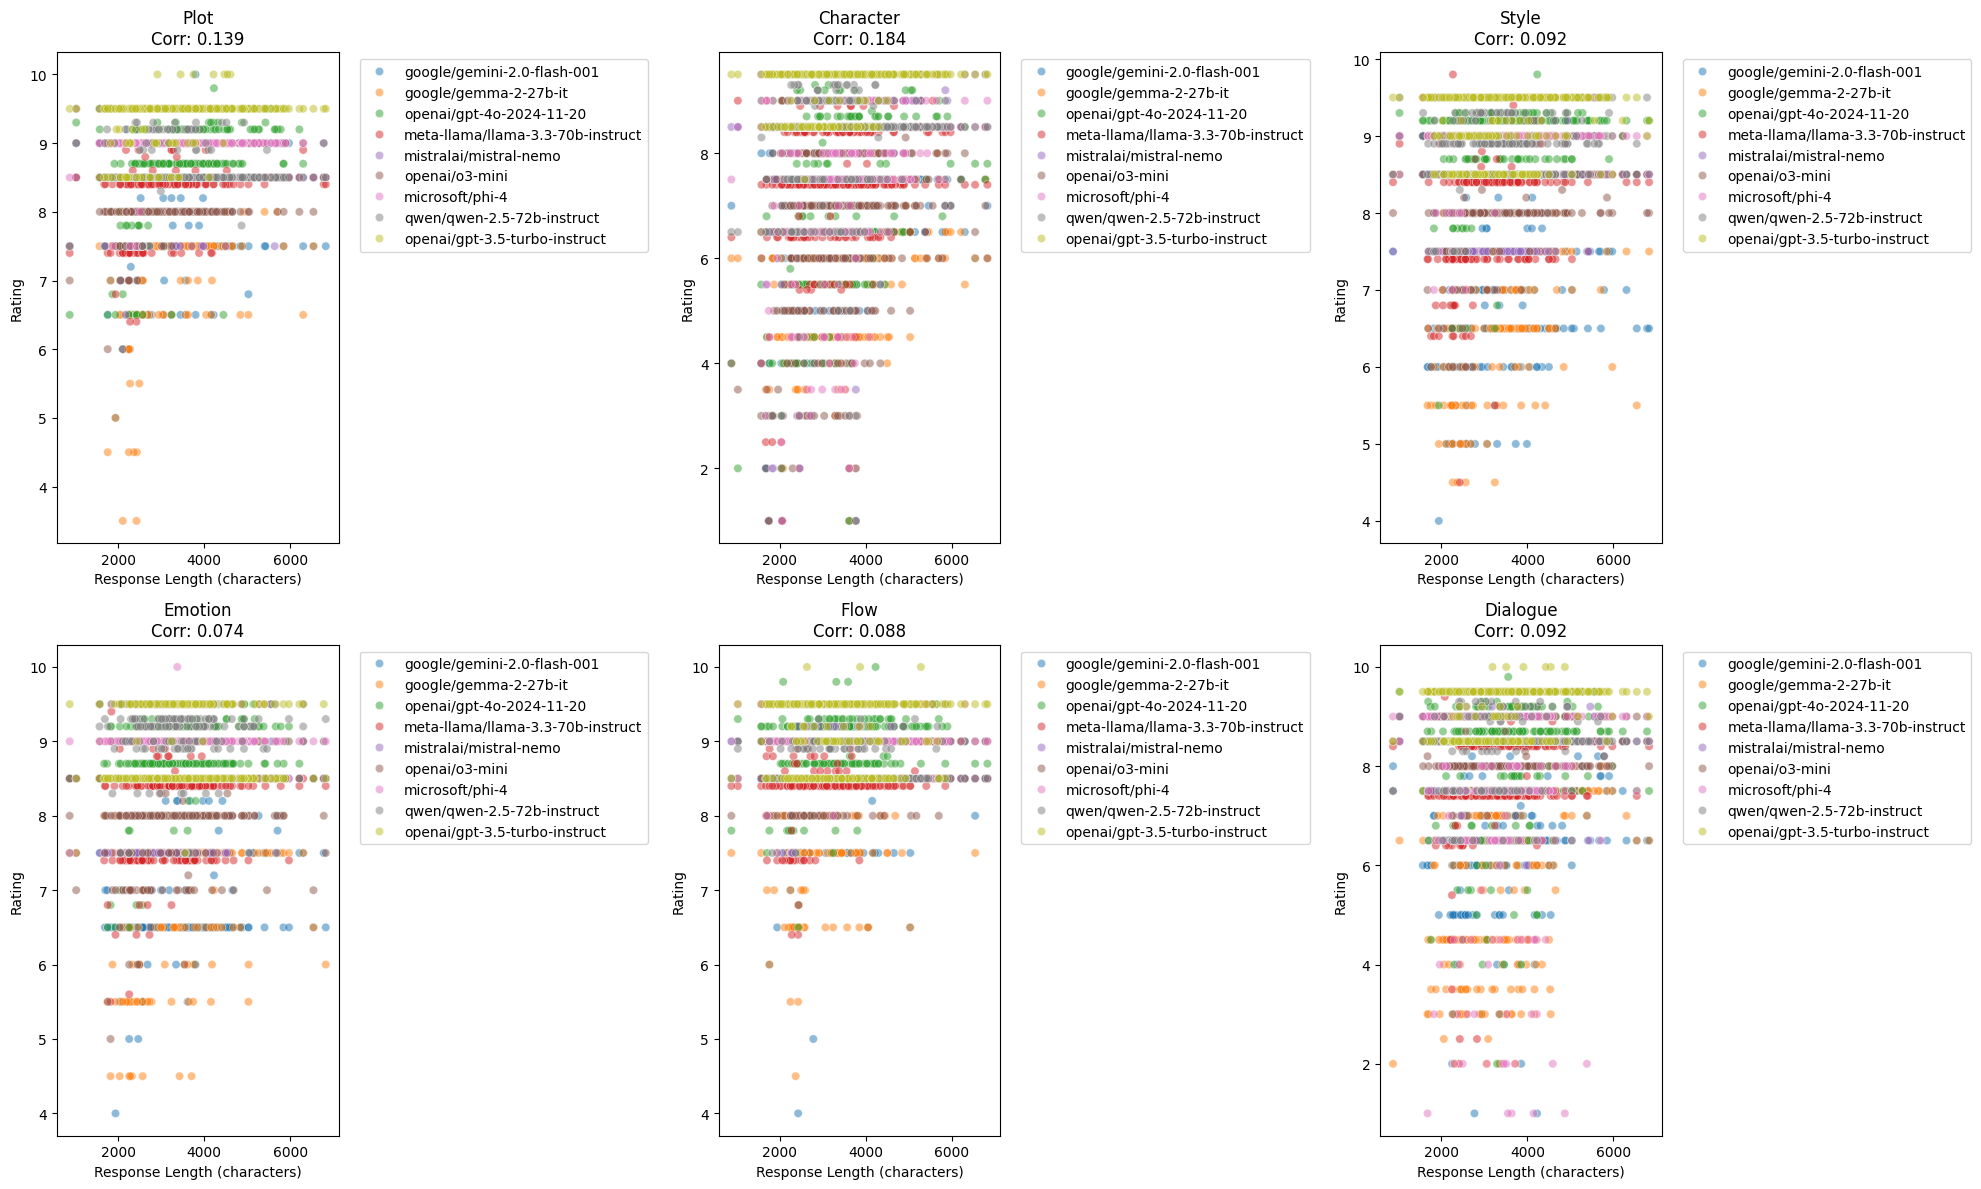

In [10]:
# Calculate correlations between response length and ratings per criteria
criteria_correlations = {}
for criteria in cr_lm_df['criteria'].unique():
    criteria_data = cr_lm_df[cr_lm_df['criteria'] == criteria]
    
    # Overall correlation for this criteria
    overall_corr = criteria_data['response_length'].corr(criteria_data['judge_rating'])
    
    # Per-judge correlations for this criteria
    judge_corrs = criteria_data.groupby('judge_model').apply(
        lambda x: x['response_length'].corr(x['judge_rating'])
    ).round(3)
    
    criteria_correlations[criteria] = {
        'overall': round(overall_corr, 3),
        'by_judge': judge_corrs
    }

# Print results
for criteria, corrs in criteria_correlations.items():
    print(f"\n=== {criteria} ===")
    print(f"Overall correlation: {corrs['overall']}")
    print("\nBy judge model:")
    print(corrs['by_judge'])

# Visualize with faceted scatter plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, criteria in enumerate(cr_lm_df['criteria'].unique()):
    criteria_data = cr_lm_df[cr_lm_df['criteria'] == criteria]
    
    sns.scatterplot(
        data=criteria_data,
        x='response_length',
        y='judge_rating',
        hue='judge_model',
        alpha=0.5,
        ax=axes[i]
    )
    
    axes[i].set_title(f'{criteria}\nCorr: {criteria_correlations[criteria]["overall"]}')
    axes[i].set_xlabel('Response Length (characters)')
    axes[i].set_ylabel('Rating')
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# TODO: Find cases where the humans and (averaged) models maximally disagreed?
# Or maybe just treat every response-judgement as its own thing and find maximal disagreemtns.
# can be averaged or per criteria

In [4]:
# Get average scores given by each judge model for each criteria
judge_models = cr_lm_df['judge_model'].unique()

for judge_model in judge_models:
    model_scores = cr_lm_df[cr_lm_df['judge_model'] == judge_model].groupby('criteria')['judge_rating'].mean().round(2)
    
    print(f"\nAverage scores given by {judge_model} for each criteria:")
    print(model_scores)



Average scores given by google/gemini-2.0-flash-001 for each criteria:
criteria
Character    6.96
Dialogue     7.11
Emotion      7.63
Flow         8.74
Plot         8.34
Style        7.56
Name: judge_rating, dtype: float64

Average scores given by google/gemma-2-27b-it for each criteria:
criteria
Character    6.41
Dialogue     6.60
Emotion      7.70
Flow         8.39
Plot         7.99
Style        7.68
Name: judge_rating, dtype: float64

Average scores given by openai/gpt-4o-2024-11-20 for each criteria:
criteria
Character    7.24
Dialogue     8.16
Emotion      8.83
Flow         8.98
Plot         8.77
Style        9.00
Name: judge_rating, dtype: float64

Average scores given by meta-llama/llama-3.3-70b-instruct for each criteria:
criteria
Character    7.68
Dialogue     8.13
Emotion      8.32
Flow         8.45
Plot         8.43
Style        8.36
Name: judge_rating, dtype: float64

Average scores given by mistralai/mistral-nemo for each criteria:
criteria
Character    8.39
Dialogue     

In [6]:
# Average scores received by each response model for each criteria
response_models = cr_lm_df['response_model'].unique()

for response_model in response_models:
    model_scores = cr_lm_df[cr_lm_df['response_model'] == response_model].groupby('criteria')['judge_rating'].mean().round(2)
    
    print(f"\nAverage scores received by {response_model} for each criteria:")
    print(model_scores)



Average scores received by openai/gpt-4o-2024-11-20 for each criteria:
criteria
Character    8.06
Dialogue     8.52
Emotion      8.65
Flow         8.94
Plot         8.82
Style        8.81
Name: judge_rating, dtype: float64

Average scores received by openai/gpt-3.5-turbo-instruct for each criteria:
criteria
Character    6.63
Dialogue     7.16
Emotion      7.75
Flow         8.31
Plot         7.89
Style        7.52
Name: judge_rating, dtype: float64

Average scores received by qwen/qwen-2.5-72b-instruct for each criteria:
criteria
Character    7.65
Dialogue     7.90
Emotion      8.27
Flow         8.73
Plot         8.51
Style        8.29
Name: judge_rating, dtype: float64

Average scores received by meta-llama/llama-3.3-70b-instruct for each criteria:
criteria
Character    7.20
Dialogue     7.92
Emotion      8.28
Flow         8.72
Plot         8.55
Style        8.42
Name: judge_rating, dtype: float64

Average scores received by google/gemini-2.0-flash-001 for each criteria:
criteria
Char


Overall correlations between model and human ratings:
google/gemini-2.0-flash-001: 0.22
google/gemma-2-27b-it: 0.204
openai/gpt-4o-2024-11-20: 0.153
meta-llama/llama-3.3-70b-instruct: 0.222
mistralai/mistral-nemo: 0.129
openai/o3-mini: 0.179
microsoft/phi-4: 0.112
qwen/qwen-2.5-72b-instruct: 0.162
openai/gpt-3.5-turbo-instruct: 0.173


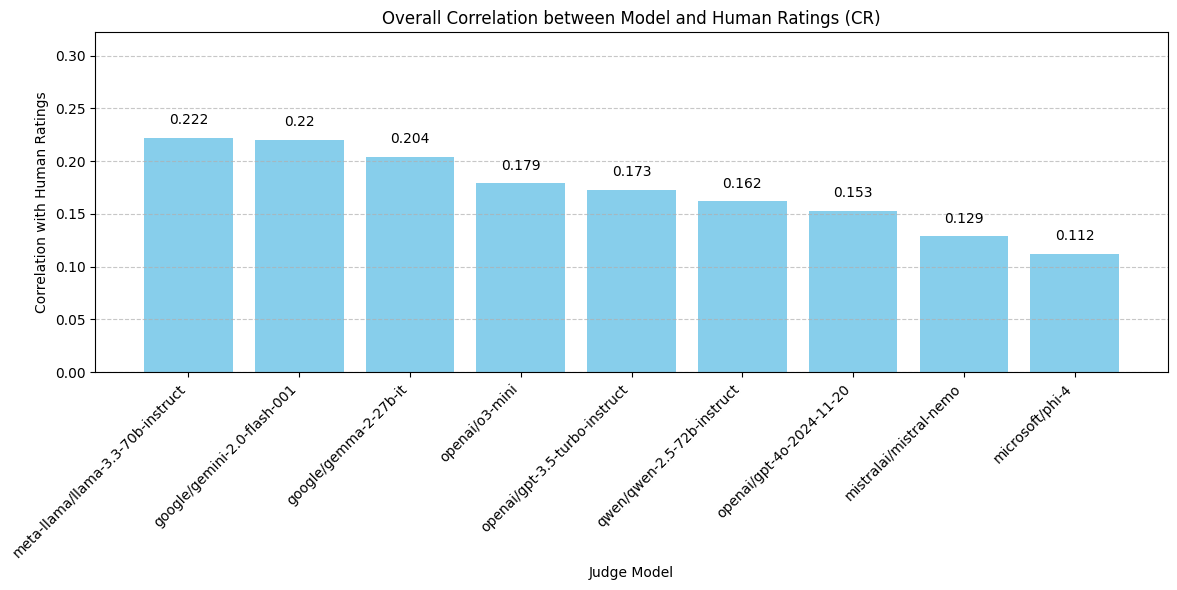

In [12]:
# Calculate overall correlation between each model and human annotators
model_human_corrs = {}

# Get unique judge models that aren't human annotators
judge_models = cr_combo_filtered_df[cr_combo_filtered_df['judge_model'] != 'human']['judge_model'].unique()

for judge_model in judge_models:
    model_data = cr_combo_filtered_df[cr_combo_filtered_df['judge_model'] == judge_model]
    human_data = cr_combo_filtered_df[cr_combo_filtered_df['judge_model'] == 'human']
    
    # Get average ratings for each question/response/criteria combination
    # This ensures we're comparing the same responses
    model_ratings = model_data.groupby(['question_id', 'response_id', 'criteria'])['judge_rating'].mean()
    human_ratings = human_data.groupby(['question_id', 'response_id', 'criteria'])['judge_rating'].mean()
    
    # Align the indices and drop any rows that don't appear in both datasets
    aligned_data = pd.DataFrame({'model': model_ratings, 'human': human_ratings}).dropna()
    
    # Calculate correlation only if we have matching data points
    if len(aligned_data) > 0:
        corr = aligned_data['model'].corr(aligned_data['human'])
        model_human_corrs[judge_model] = round(corr, 3)
    else:
        model_human_corrs[judge_model] = float('nan')

print("\nOverall correlations between model and human ratings:")
for model, corr in model_human_corrs.items():
    print(f"{model}: {corr}")

# Create a bar plot of the correlations between model and human ratings
plt.figure(figsize=(12, 6))
models = list(model_human_corrs.keys())
correlations = list(model_human_corrs.values())

# Sort by correlation value in descending order
sorted_indices = np.argsort(correlations)[::-1]  # Reverse to get descending order
sorted_models = [models[i] for i in sorted_indices]
sorted_correlations = [correlations[i] for i in sorted_indices]

# Create the bar plot
bars = plt.bar(sorted_models, sorted_correlations, color='skyblue')

# Add correlation values on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{sorted_correlations[i]}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Judge Model')
plt.ylabel('Correlation with Human Ratings')
plt.title('Overall Correlation between Model and Human Ratings (CR)')
plt.ylim(0, max(correlations) + 0.1)  # Add some space for the text
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
# Calculate correlations between each model and human annotators per criteria
model_human_corrs_by_criteria = {}

# Get unique judge models that aren't human annotators
judge_models = cr_combo_filtered_df[cr_combo_filtered_df['judge_model'] != 'human']['judge_model'].unique()
criteria_list = cr_combo_filtered_df['criteria'].unique()

for judge_model in judge_models:
    model_human_corrs_by_criteria[judge_model] = {}
    
    for criteria in criteria_list:
        # Filter data for current model and criteria
        model_data = cr_combo_filtered_df[
            (cr_combo_filtered_df['judge_model'] == judge_model) & 
            (cr_combo_filtered_df['criteria'] == criteria)
        ]
        human_data = cr_combo_filtered_df[
            (cr_combo_filtered_df['judge_model'] == 'human') & 
            (cr_combo_filtered_df['criteria'] == criteria)
        ]
        
        # Get average ratings for each question/response combination
        model_ratings = model_data.groupby(['question_id', 'response_id'])['judge_rating'].mean()
        human_ratings = human_data.groupby(['question_id', 'response_id'])['judge_rating'].mean()
        
        # Align the indices and drop any rows that don't appear in both datasets
        aligned_data = pd.DataFrame({'model': model_ratings, 'human': human_ratings}).dropna()
        
        # Calculate correlation only if we have matching data points
        if len(aligned_data) > 0:
            corr = aligned_data['model'].corr(aligned_data['human'])
            model_human_corrs_by_criteria[judge_model][criteria] = round(corr, 3)
        else:
            model_human_corrs_by_criteria[judge_model][criteria] = float('nan')

print("\nCorrelations between model and human ratings by criteria:")
for model in model_human_corrs_by_criteria:
    print(f"\n{model}:")
    for criteria, corr in model_human_corrs_by_criteria[model].items():
        print(f"  {criteria}: {corr}")



Correlations between model and human ratings by criteria:

google/gemini-2.0-flash-001:
  Plot: 0.237
  Character: 0.285
  Style: 0.284
  Emotion: 0.389
  Flow: 0.124
  Dialogue: 0.187

google/gemma-2-27b-it:
  Plot: 0.227
  Character: 0.361
  Style: 0.326
  Emotion: 0.321
  Flow: 0.251
  Dialogue: 0.115

openai/gpt-4o-2024-11-20:
  Plot: 0.221
  Character: 0.297
  Style: 0.206
  Emotion: 0.269
  Flow: 0.16
  Dialogue: 0.108

meta-llama/llama-3.3-70b-instruct:
  Plot: 0.115
  Character: 0.322
  Style: 0.255
  Emotion: 0.265
  Flow: 0.129
  Dialogue: 0.317

mistralai/mistral-nemo:
  Plot: 0.124
  Character: 0.088
  Style: 0.156
  Emotion: 0.145
  Flow: 0.074
  Dialogue: 0.271

openai/o3-mini:
  Plot: 0.178
  Character: 0.293
  Style: 0.298
  Emotion: 0.302
  Flow: 0.127
  Dialogue: 0.045

microsoft/phi-4:
  Plot: 0.161
  Character: 0.306
  Style: 0.184
  Emotion: 0.335
  Flow: 0.058
  Dialogue: 0.071

qwen/qwen-2.5-72b-instruct:
  Plot: 0.147
  Character: 0.289
  Style: 0.115
  Emotion